# Credit Card Fraud Detection Capstone Project

#### Contributed By :  Atul Sharma


#### Problem Statement: 
Although digital transactions in India registered a 51% growth in 2018–2019, their safety remains a concern. Fraudulent activities have increased severalfold, with approximately 52,304 cases of credit/debit card fraud reported in FY 2019 alone. Owing to this steep increase in banking frauds, it is the need of the hour to detect these fraudulent transactions in time to help consumers and banks that are losing their credit worth each day. Machine learning can play a vital role in detecting fraudulent transactions    
** Objective of this project is to learn how you can build a machine learning model that is capable of detecting fraudulent transactions. You will also learn how to handle class imbalances present in any data set, along with model selection and hyperparameter tuning.** 



### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The data set that you will be working on during this project was obtained from Kaggle. It contains thousands of individual transactions that took place over a course of two days and their respective labels.. 

In [94]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### EDA and data Preparation

In [95]:
#To read csv File from locally stored file
df_capstone = pd.read_csv(r'D:\UPGRAD\capstone project\git\changed\submission\creditcard.csv')
df_capstone.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [96]:
#To download data directly from Kaggle and store it on Google Drive to User it with Google Colab
"""
! pip install -q kaggle
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
! cp /content/drive/'My Drive'/'Credit Card Fraud Assignment'/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip
#Create DataFrame from the csv file
df_capstone = pd.read_csv('creditcard.csv')
df_capstone.head()
"""

"\n! pip install -q kaggle\nfrom google.colab import drive\ndrive.mount('/content/drive')\n! mkdir ~/.kaggle\n! cp /content/drive/'My Drive'/'Credit Card Fraud Assignment'/kaggle.json ~/.kaggle/\n! chmod 600 ~/.kaggle/kaggle.json\n!kaggle datasets download -d mlg-ulb/creditcardfraud\n!unzip creditcardfraud.zip\n#Create DataFrame from the csv file\ndf_capstone = pd.read_csv('creditcard.csv')\ndf_capstone.head()\n"

In [97]:
# Examine the imported dataset :
df_capstone.shape

(284807, 31)

In [98]:
# Looking at the numeric distribution of the data:
df_capstone.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [99]:
#Examining the data frame for the shape, datatypes, NUlls etc
df_capstone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [100]:
#Check the fraud/Non_Fraud related records
df_capstone['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [101]:
#find % values of class
(df_capstone.groupby('Class')['Class'].count()/df_capstone['Class'].count()) *100

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64

In [102]:
#check if any null values
df_capstone.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [103]:
#observe the different feature type present in the data
#lets check data types of the features
df_capstone.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [104]:
# correlation matrix
cor = df_capstone.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

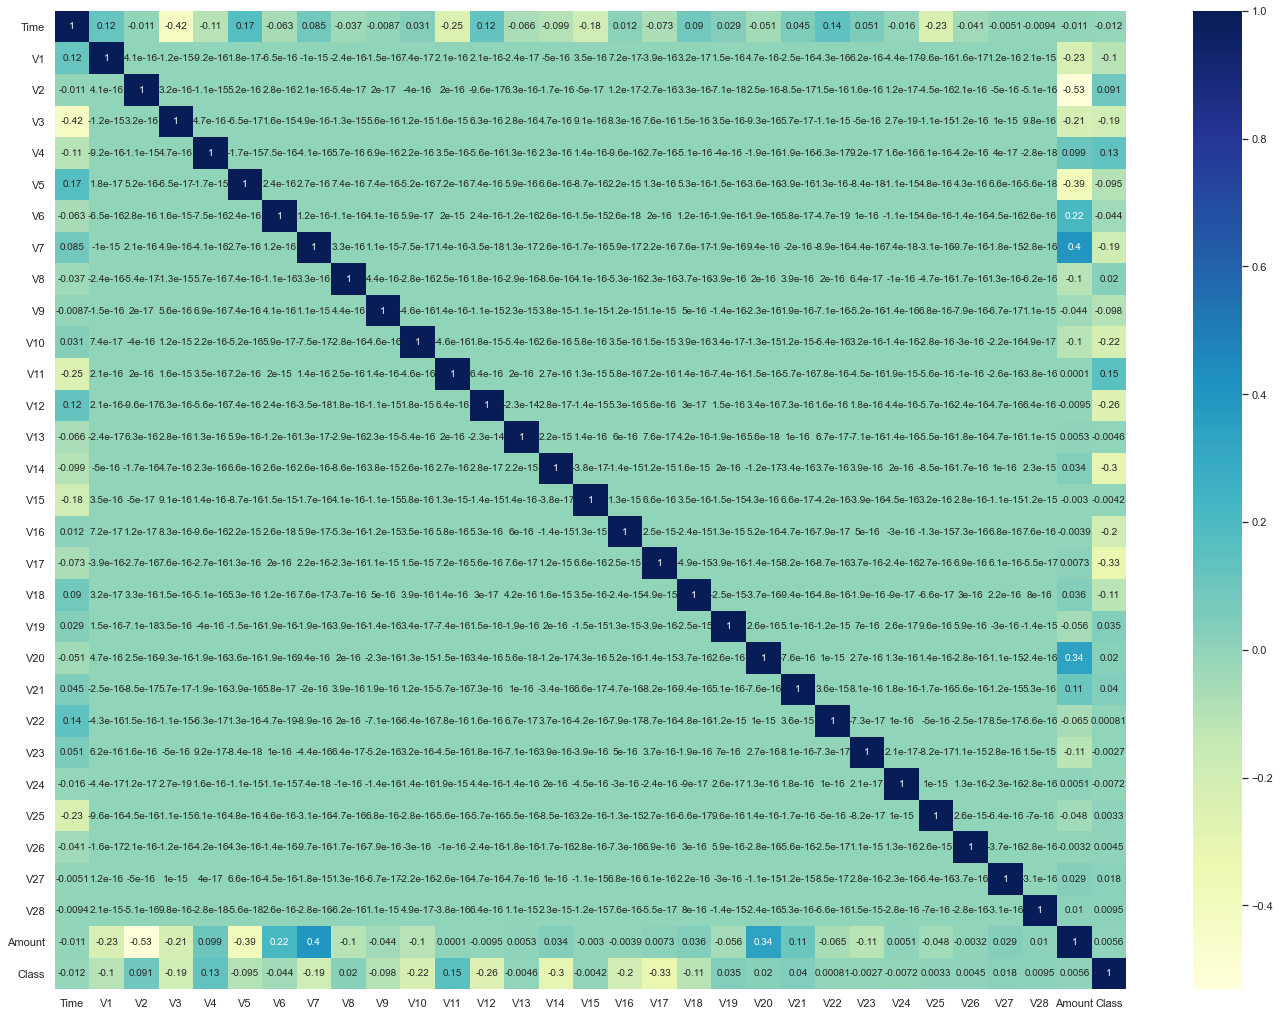

In [105]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


In [106]:
classes=df_capstone['Class'].value_counts()
normal_share_data=classes[0]/df_capstone['Class'].count()*100
fraud_share_data=classes[1]/df_capstone['Class'].count()*100

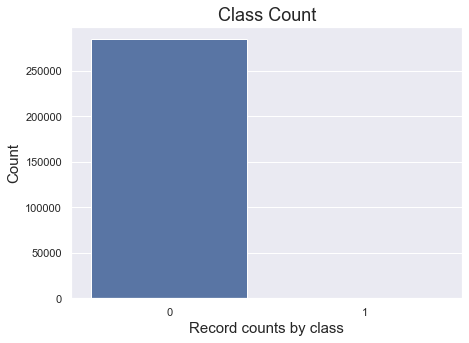

In [107]:
# To Create bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(7,5))
sns.countplot(df_capstone['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

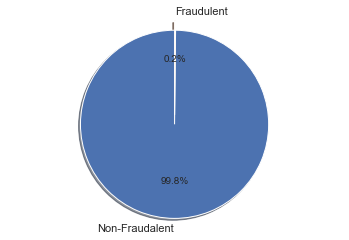

In [108]:
#plt.title('Distribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df_capstone['Class'].value_counts()
normal_share_data=classes[0]/df_capstone['Class'].count()*100
fraud_share_data=classes[1]/df_capstone['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudulent'
sizes = [normal_share_data, fraud_share_data]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [109]:
print('The percentage without churn prediction is ::::', round(df_capstone['Class'].value_counts()[0]/len(df_capstone) * 100,2), '% of the dataset')
print('The percentage with churn prediction is :::::', round(df_capstone['Class'].value_counts()[1]/len(df_capstone) * 100,2), '% of the dataset')
print('The ratio of imbalance is:::', round(df_capstone['Class'].value_counts()[1]/df_capstone['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is :::: 99.83 % of the dataset
The percentage with churn prediction is ::::: 0.17 % of the dataset
The ratio of imbalance is::: 0.17


In [110]:
# Create a scatter plot to observe the distribution of classes with time
Delta_Time1 = pd.to_timedelta(df_capstone['Time'], unit='s')
#Create derived columns Mins and hours
df_capstone['Time_Day'] = (Delta_Time1.dt.components.days).astype(int)
df_capstone['Time_Hour'] = (Delta_Time1.dt.components.hours).astype(int)
df_capstone['Time_Min'] = (Delta_Time1.dt.components.minutes).astype(int)



Text(0.5, 1.05, 'Time vs Class Distribution')

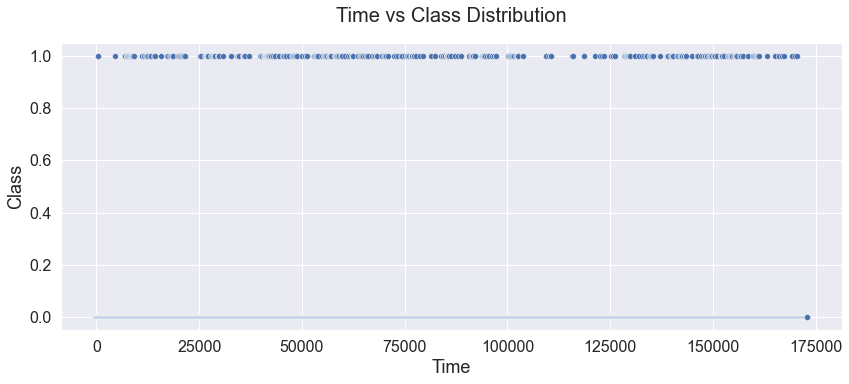

In [111]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')
# relation between the variables:
plt.subplot(3,1,1)
sns.scatterplot(x=df_capstone['Time'], y='Class', palette=cmap, data=df_capstone)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)


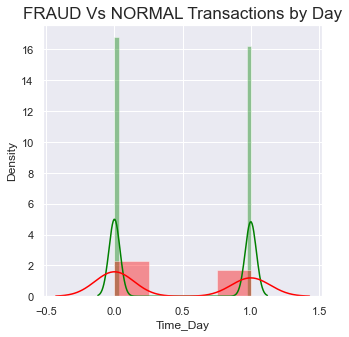

In [112]:
# Fraud Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df_capstone[df_capstone['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df_capstone[df_capstone['Class'] == 1]["Time_Day"], color='red')
plt.title('FRAUD Vs NORMAL Transactions by Day', fontsize=17)
plt.show()

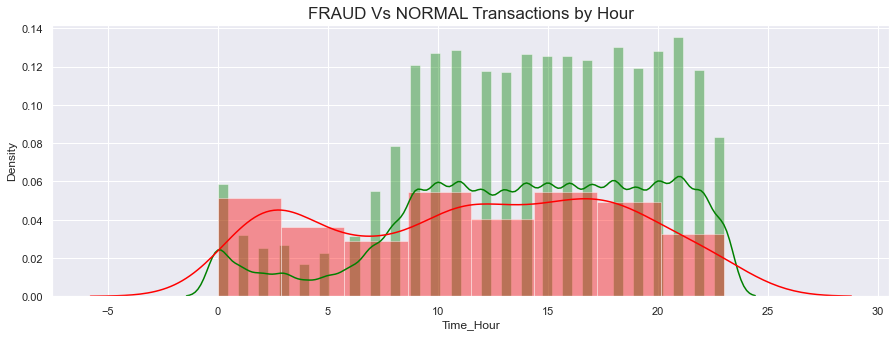

In [113]:
# Fraud Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df_capstone[df_capstone['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df_capstone[df_capstone['Class'] == 1]["Time_Hour"], color='red')
plt.title('FRAUD Vs NORMAL Transactions by Hour', fontsize=17)
plt.show()

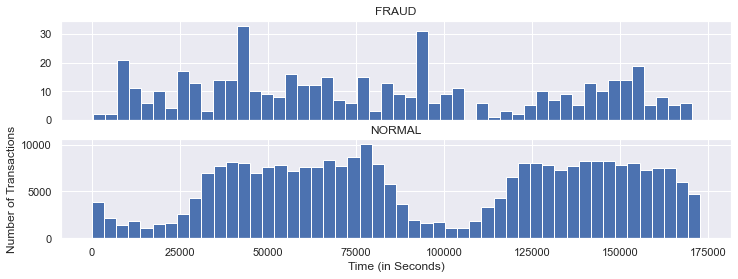

In [114]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50
ax1.hist(df_capstone.Time[df_capstone.Class == 1], bins = bins)
ax1.set_title('FRAUD')
ax2.hist(df_capstone.Time[df_capstone.Class == 0], bins = bins)
ax2.set_title('NORMAL')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [115]:
# Create a scatter plot to observe the distribution of classes with Amount
df_Fraud1 = df_capstone[df_capstone['Class'] == 1]
df_Regular1 = df_capstone[df_capstone['Class'] == 0]
# Fraud Transaction Amount Statistics
print(df_Fraud1["Amount"].describe())


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [116]:
#Regular Transaction Amount Statistics
print(df_Regular1["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

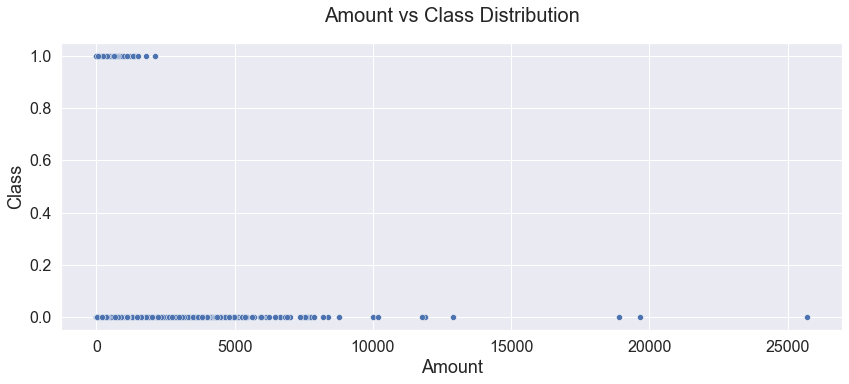

In [117]:
fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df_capstone['Amount'], y='Class', palette=cmap, data=df_capstone)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


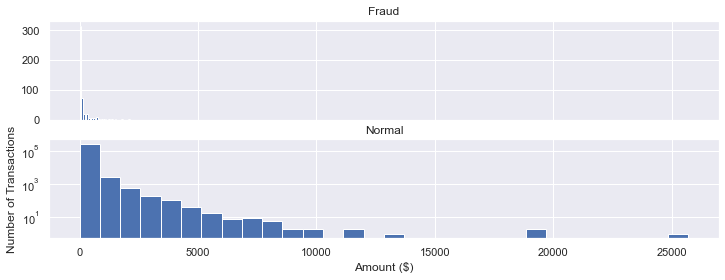

In [118]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df_capstone.Amount[df_capstone.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_capstone.Amount[df_capstone.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [119]:
print("Most important features relative to target variable Class are given below :::::::")
corr_initial = df_capstone.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class are given below :::::::


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

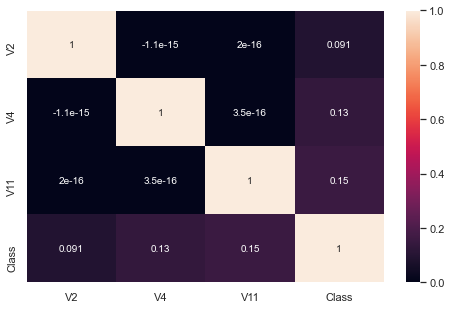

In [120]:
top_feature1 = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df_capstone[top_feature1].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

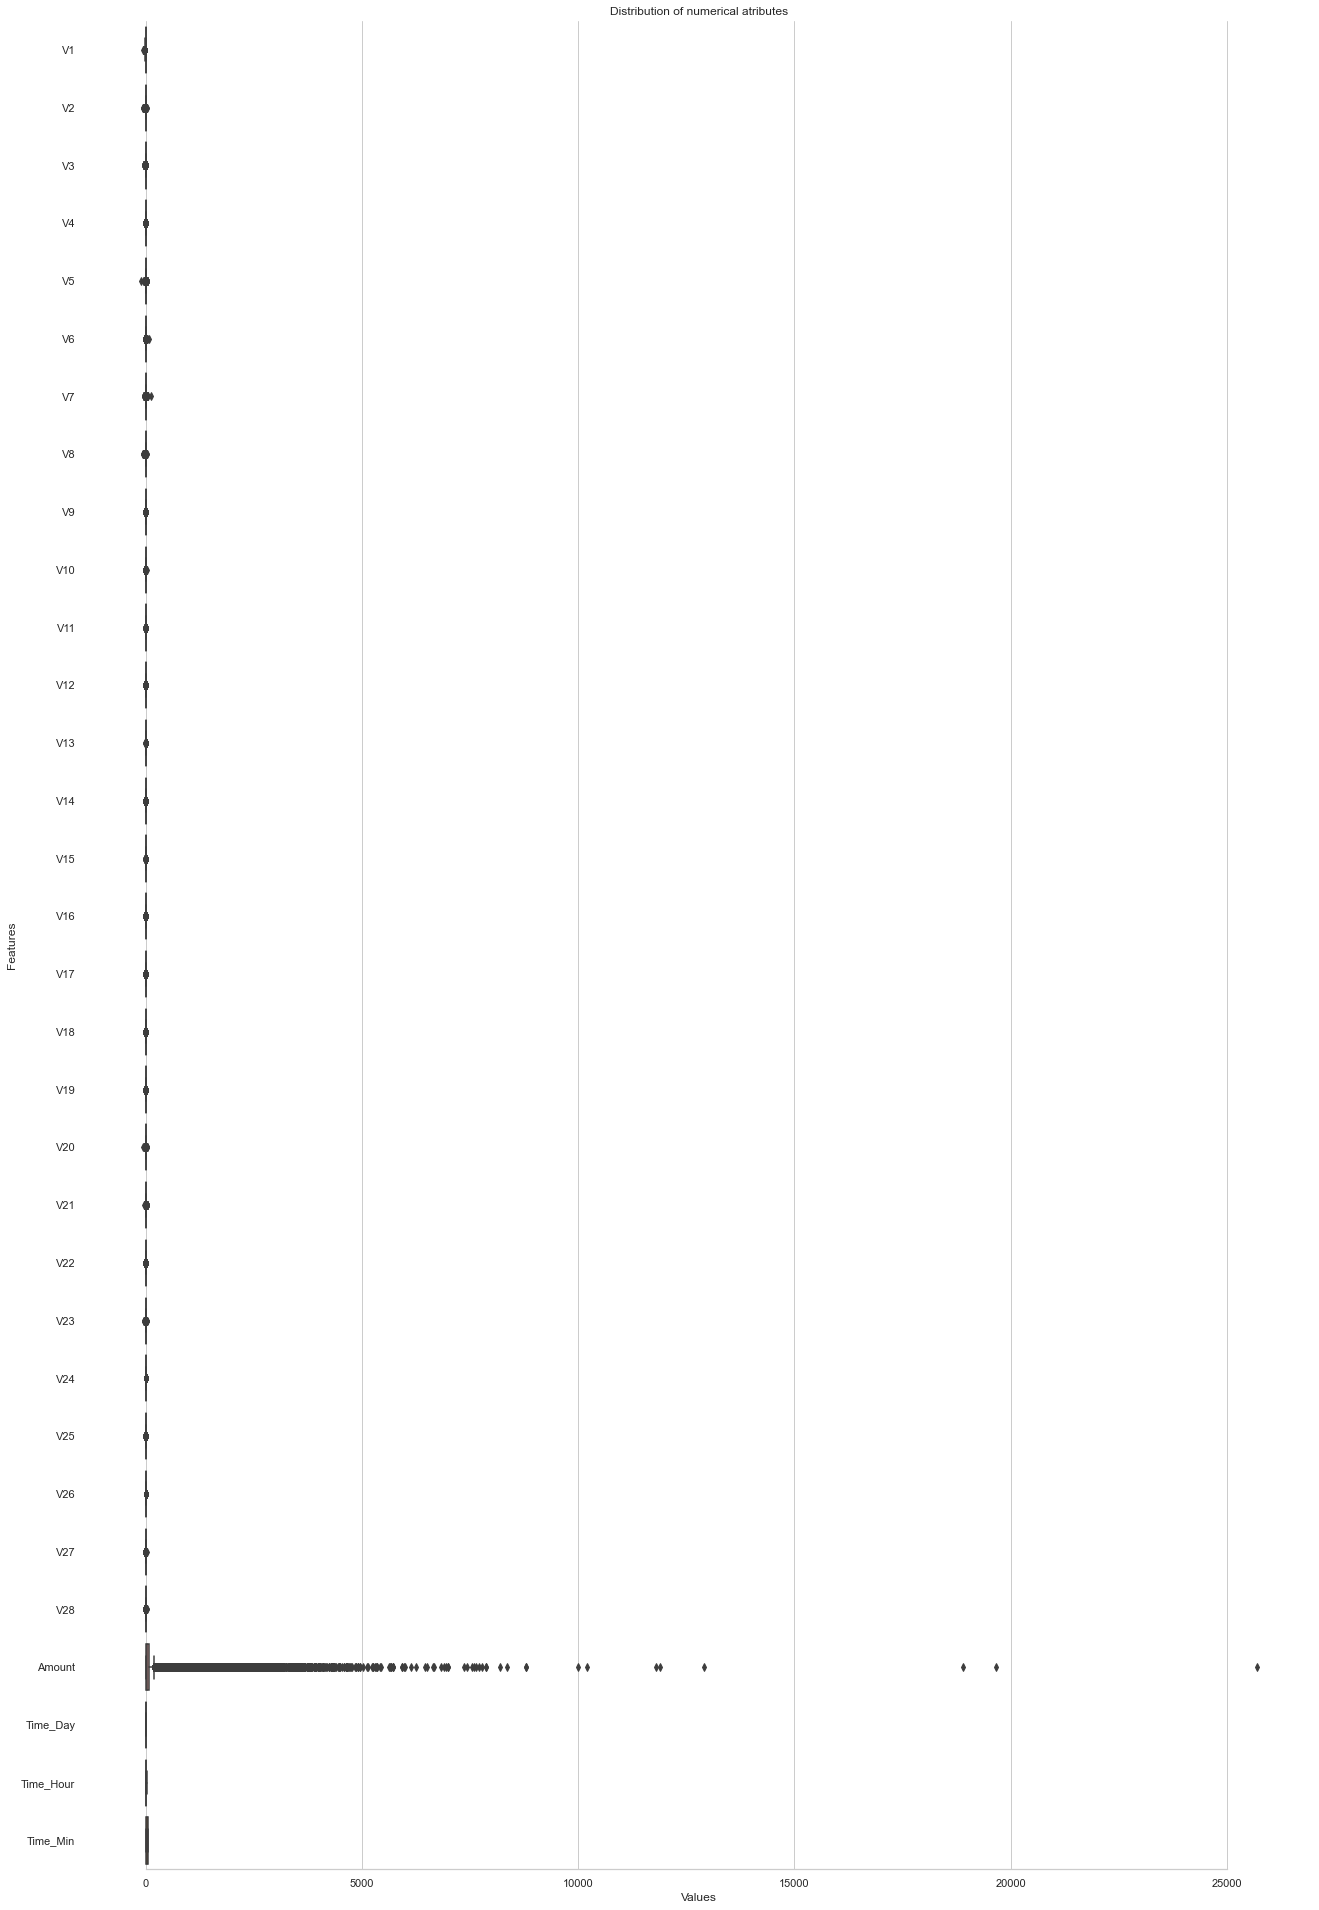

In [121]:
#Box plot
numeric_features = df_capstone.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df_capstone[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [122]:
# Drop columns which are not required 
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df_capstone.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df_capstone.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

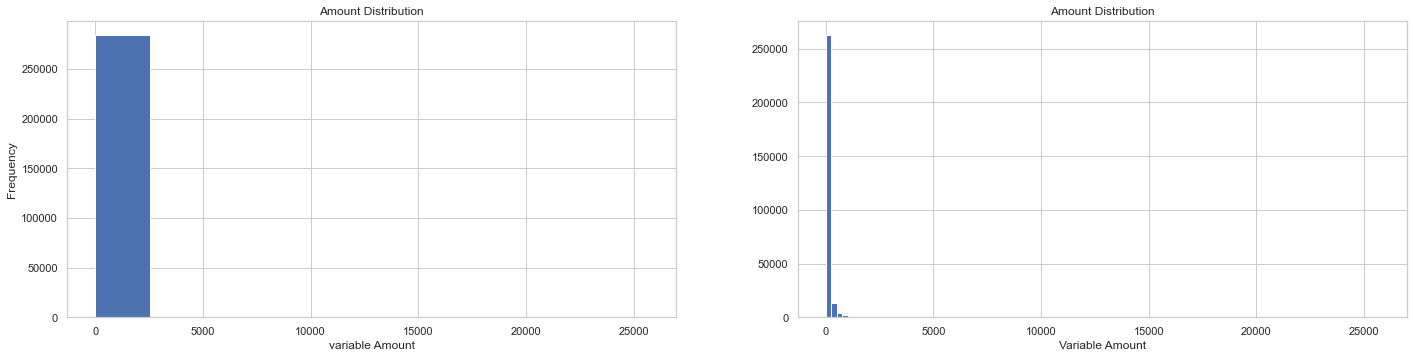

In [123]:
plt.figure(figsize=(24, 12))
plt.subplot(2,2,1)
plt.title('Amount Distribution')
df_capstone['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("Variable Amount")
plt.hist(df_capstone['Amount'],bins=100)
plt.show()


##### Test train Split

In [124]:
#Create X and y dataset for independent and dependent data
y= df_capstone['Class']
X = df_capstone.drop(['Class'], axis=1)

In [125]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [126]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [127]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

In [128]:
cols = list(X.columns.values)

In [129]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

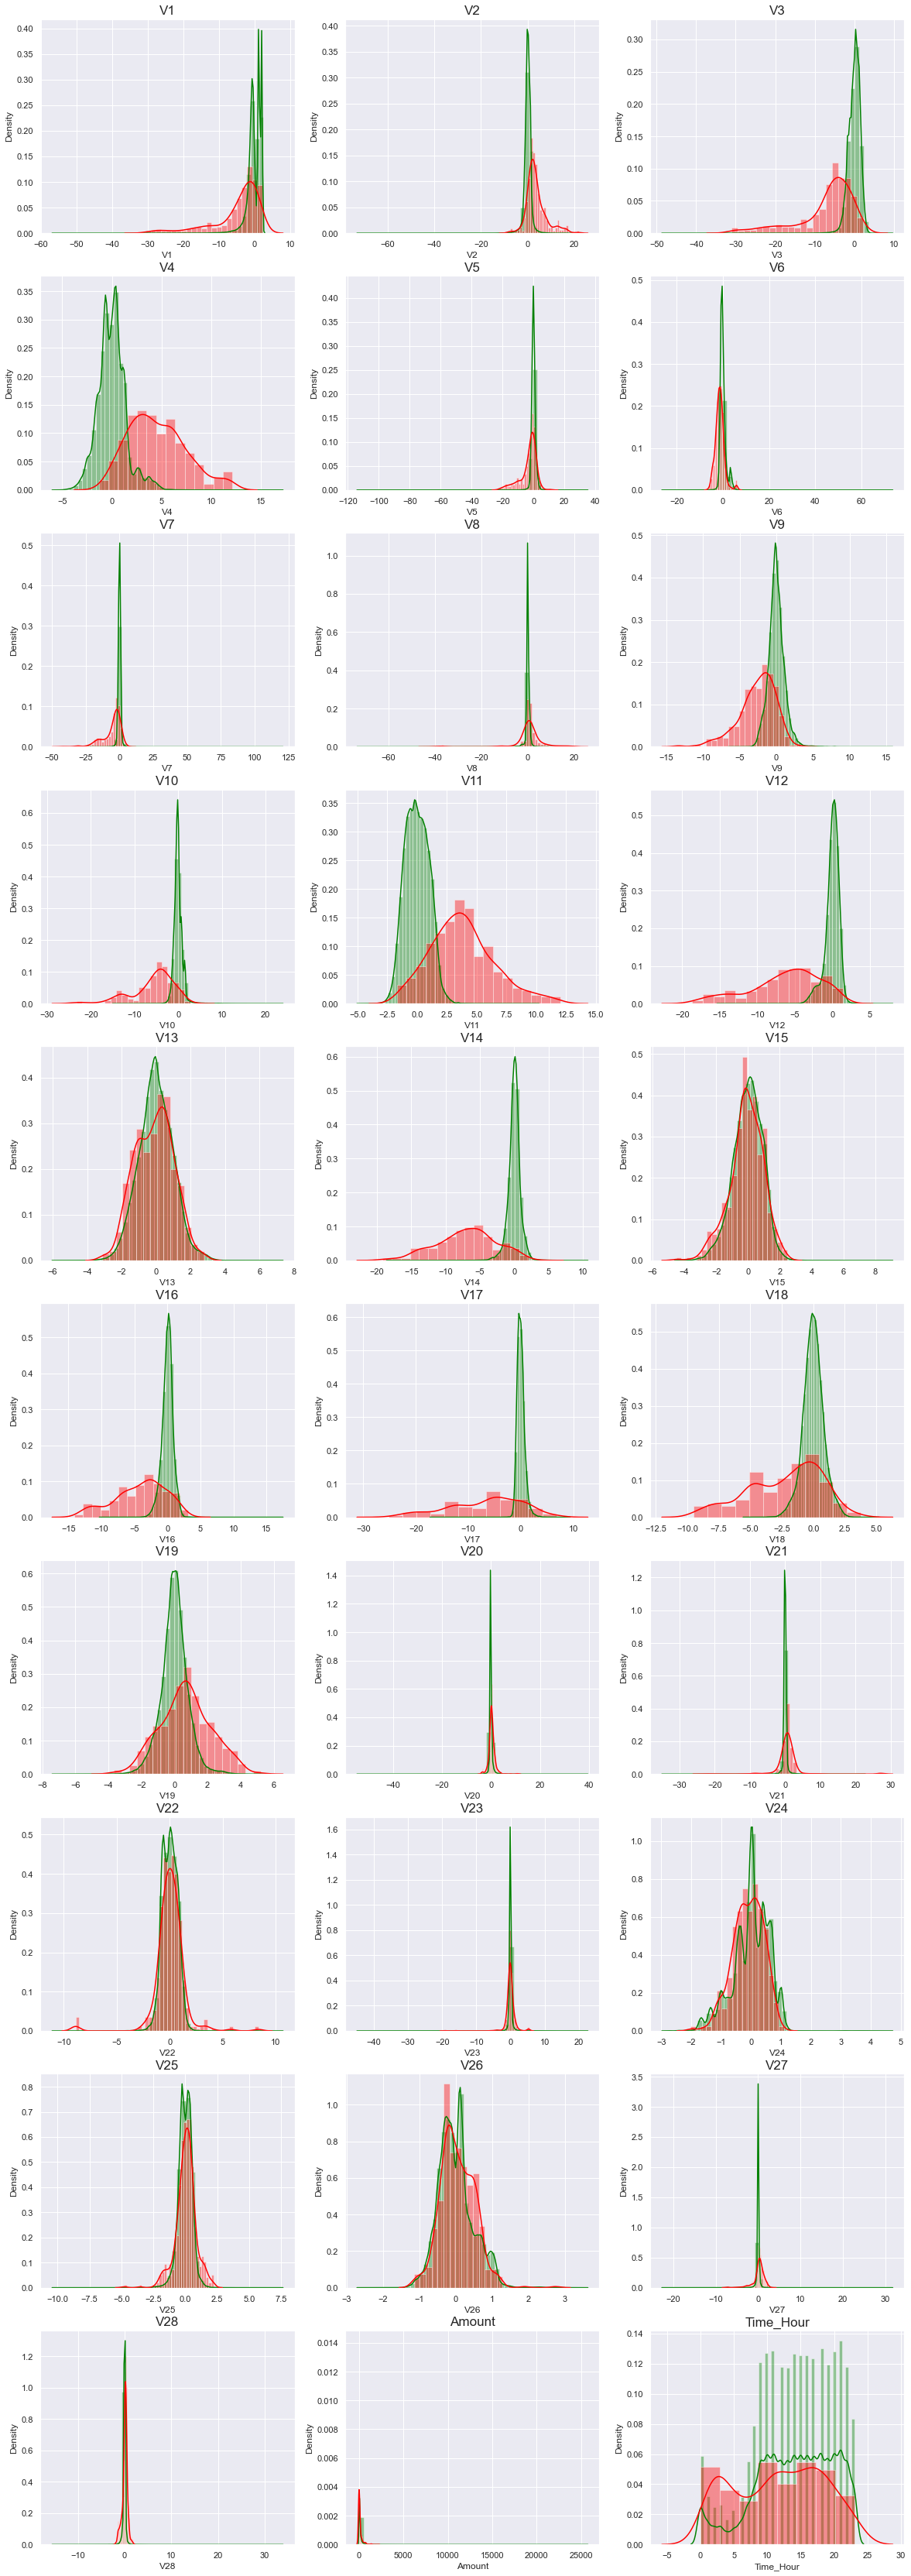

In [130]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records_data = df_capstone.Class == 0
fraud_records_data = df_capstone.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records_data], color='green')
  sns.distplot(X[col][fraud_records_data], color='red')
  plt.title(col, fontsize=17)
plt.show()




#Create model functions for Logistic Regress, KNN, SVM, Decision Tree, Random Forest, XGBoost

In [131]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [132]:
def Plot_confusion_matrix_info(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [133]:
def buildAndRunLogisticModels_data(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model 
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_number = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_number
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_number
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix_info(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix_info(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results1 = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results_final = df_Results1.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results_final

In [134]:
def buildAndRunKNNModels_data(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix_info(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  knn_probs = knn.predict_proba(X_test)[:, 1]
  # Calculate roc auc
  knn_roc_value_data = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value_data))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results_final = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value_data,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results_final




In [135]:
def buildAndRunSVMModels_data(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix_info(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))
  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]
  # Calculate roc auc
  roc_value_data = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value_data: {0}" .format(roc_value_data))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results_final = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value_data': roc_value_data,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results_final

In [136]:
def buildAndRunTreeModels_data(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds1 = dt.predict_proba(X_test)[:, 1]
      tree_roc_value_data = roc_auc_score(y_test, tree_preds1)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("######Confusion Matrix############")
      Plot_confusion_matrix_info(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value_data: {0}" .format(tree_roc_value_data))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds1)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results_final = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value_data,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results_final
      


In [137]:
def buildAndRunRandomForestModels_data(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))
  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)
  print("Confusion Matrix")
  Plot_confusion_matrix_info(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs1 = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value_data = roc_auc_score(y_test, rf_probs1)

  print("Random Forest roc_value_data: {0}" .format(roc_value_data))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results_final = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value_data': roc_value_data,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results_final

In [138]:
def buildAndRunXGBoostModels_data(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))
  print("Confusion Matrix")
  Plot_confusion_matrix_info(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)
  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results_final = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results_final
  



### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> so that to make distribution more gaussian

In [139]:
# - Apply :  to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


In [140]:
#Create Dataframe
X_train_pt_df1 = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df1 = pd.DataFrame(data=X_test_pt,   columns=cols)

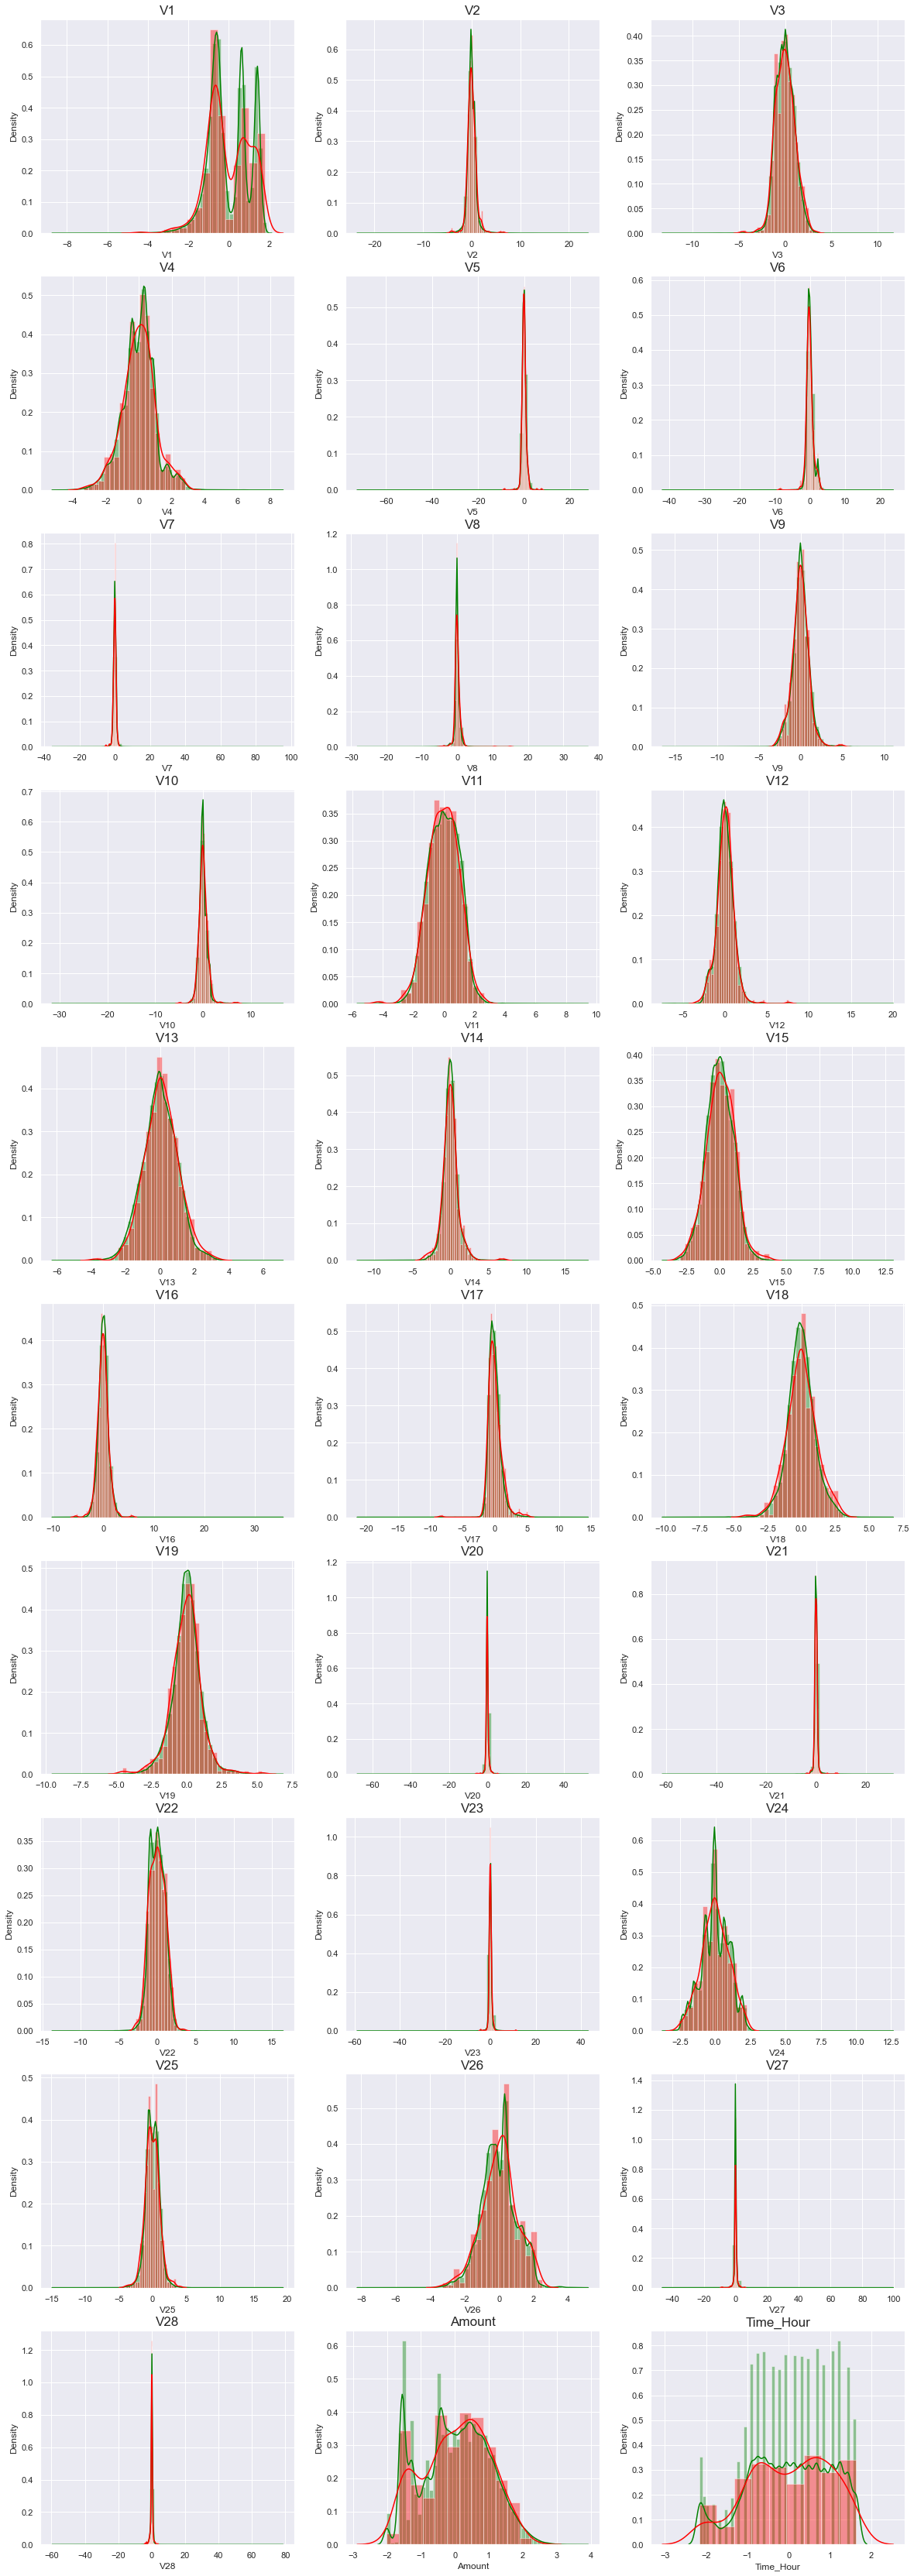

In [141]:
# plot the histogram of a variable from the train dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df1[col][normal_records_data], color='green')
  sns.distplot(X_train_pt_df1[col][fraud_records_data], color='red')
  plt.title(col, fontsize=17)
plt.show()


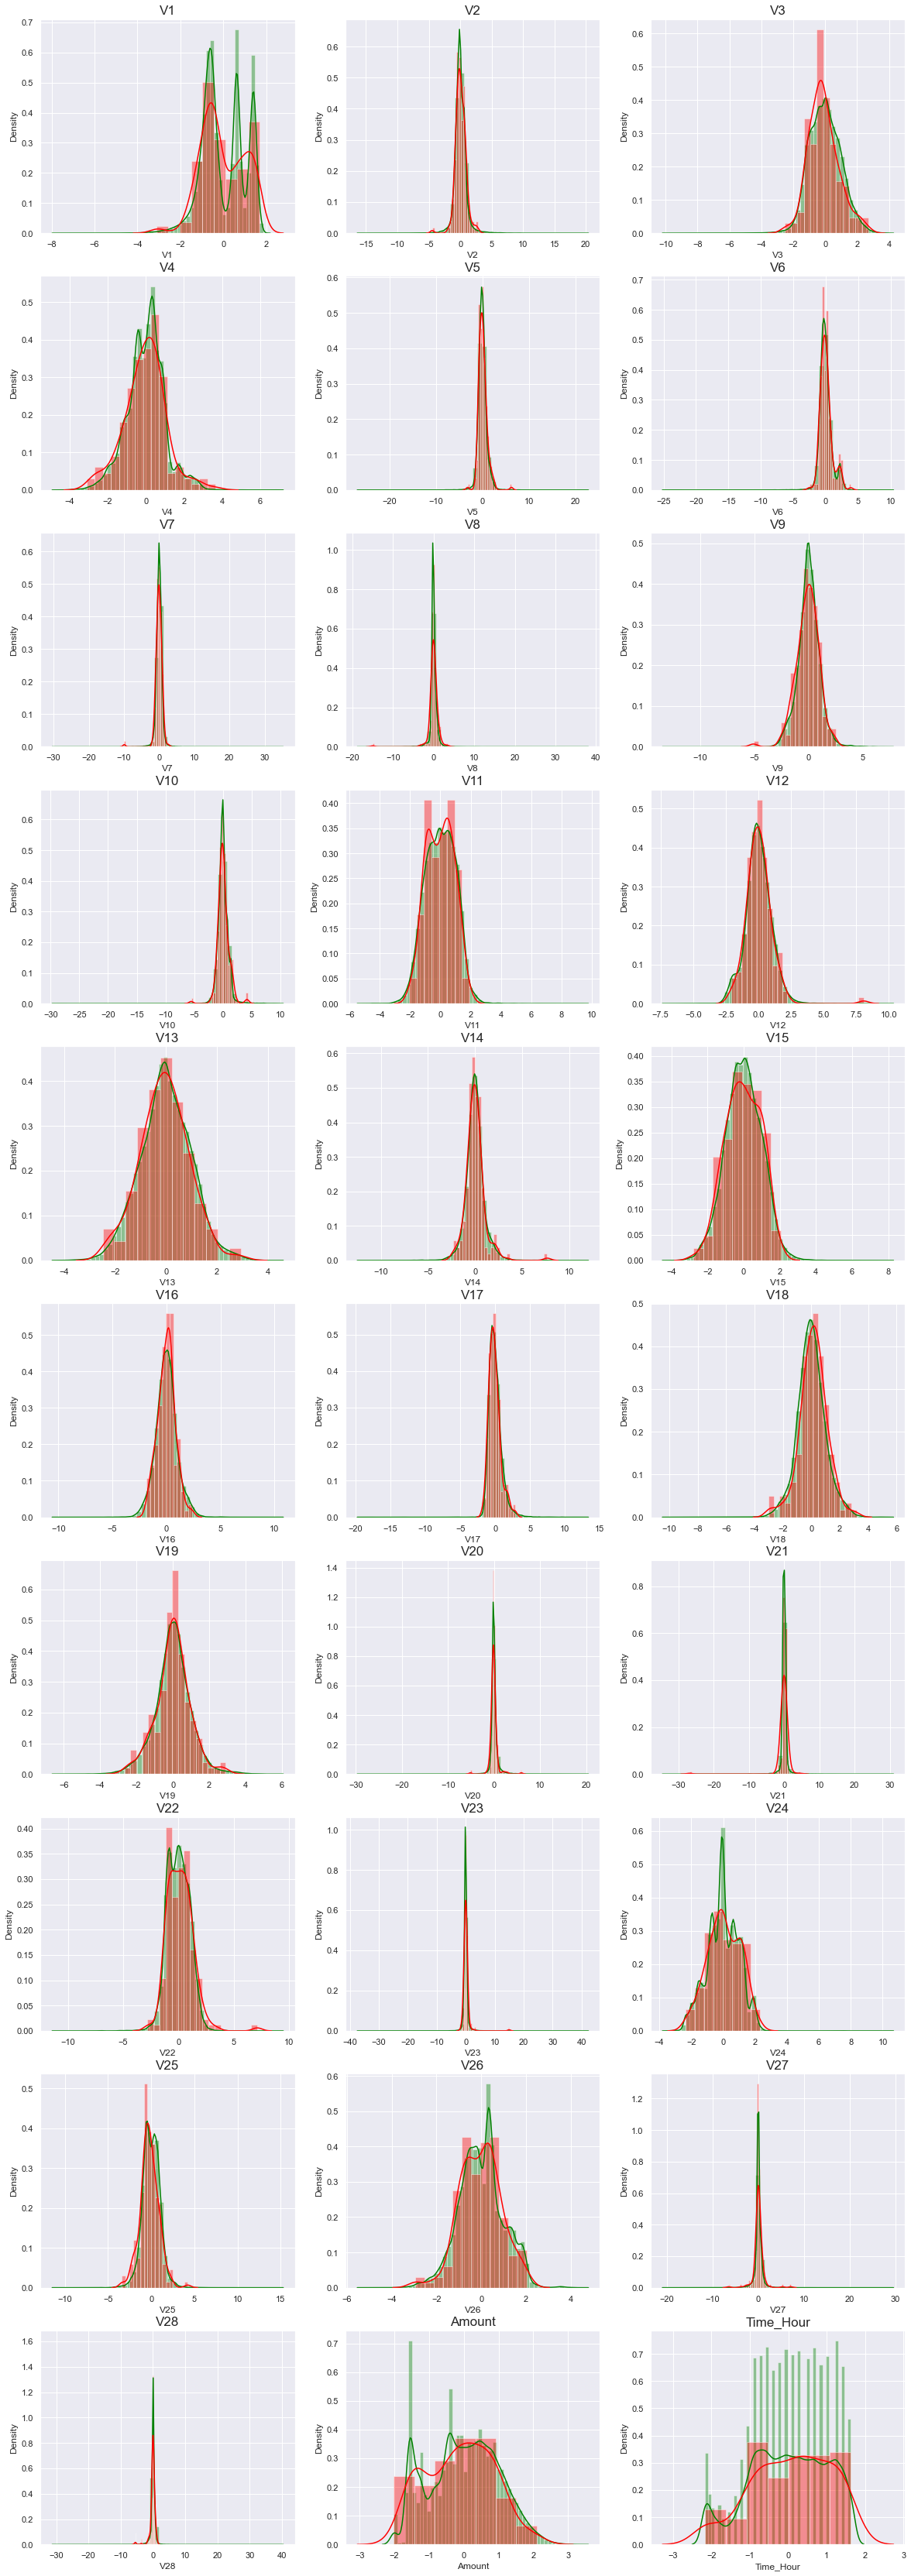

In [142]:
# plot the histogram of a variable from the test dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df1[col][normal_records_data], color='green')
  sns.distplot(X_test_pt_df1[col][fraud_records_data], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- WE need to Build different models on the imbalanced dataset and see the result

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.9853996088564008
Parameters for l2 regularisations
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371291  0.17699968 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164992  0.03866812
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.978562

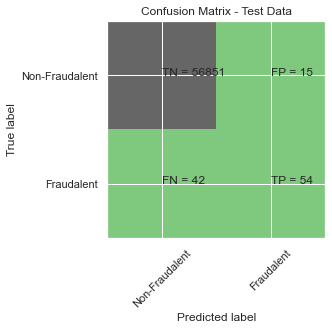

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9989115550718023
Confusion Matrix


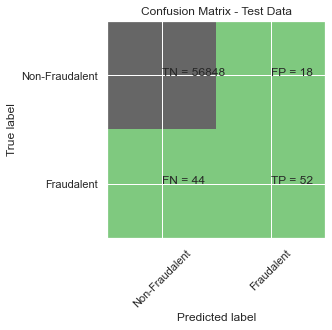

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.54      0.63        96

    accuracy                           1.00     56962
   macro avg       0.87      0.77      0.81     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.0012891785843908731
ROC for the test dataset 96.7%


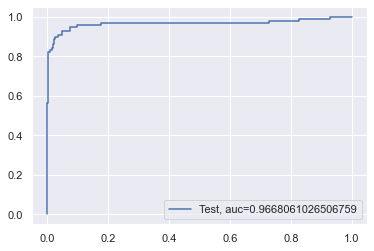

l1 roc_value: 0.9701214624438739
l1 threshold: 0.009485727112675783
ROC for the test dataset 97.0%


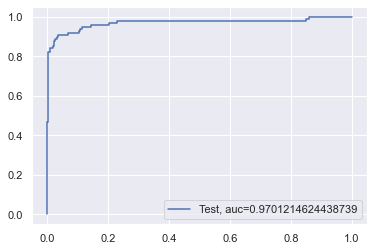

Time Taken by Model: ------ 162.31753182411194 seconds -----
--------------------------------------------------------------------------------
KNN Model
model score
0.9992977774656788
Confusion Matrix


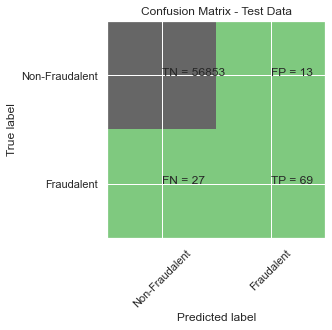

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


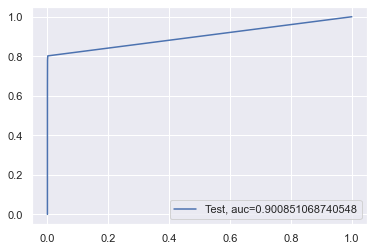

Time Taken by Model: --- 591.2399036884308 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
######Confusion Matrix############


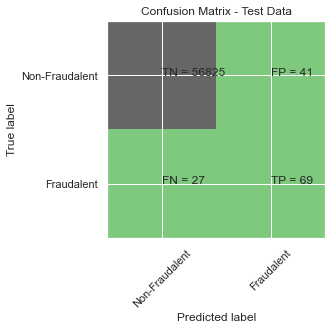

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value_data: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


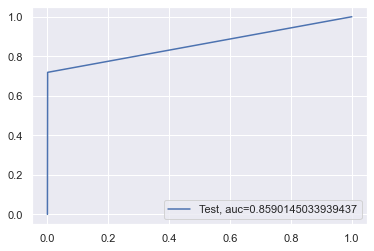

entropy score: 0.9990519995786665
######Confusion Matrix############


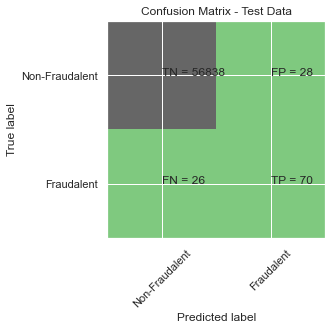

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value_data: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


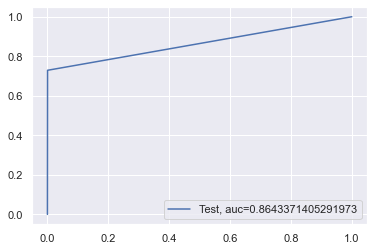

Time Taken by Model: --- 30.03574562072754 seconds ---
--------------------------------------------------------------------------------
####Random Forest Model#####
Model Accuracy: 0.9993504441557529
Confusion Matrix


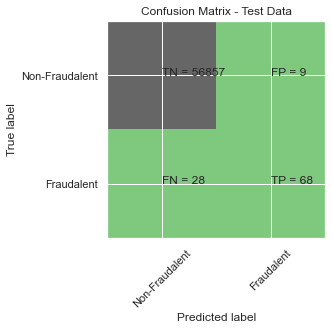

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value_data: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


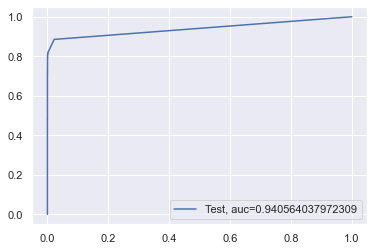

########Time Taken by Model: --- 185.13719820976257 seconds ---########
--------------------------------------------------------------------------------
######XGBoost Model#######
Model Accuracy: 0.9994557775359011
Confusion Matrix


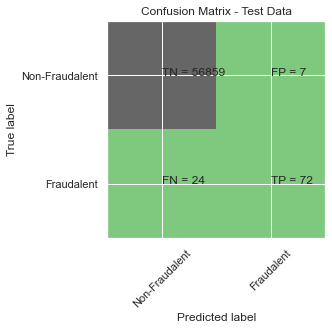

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9729984744838743
XGBoost threshold: 5.146719195181504e-05
ROC for the test dataset 97.3%


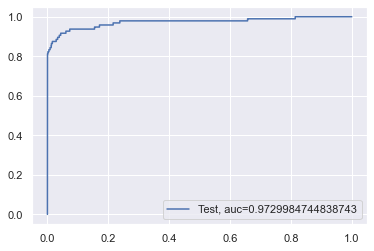

Time Taken by Model: --- 97.5319013595581 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


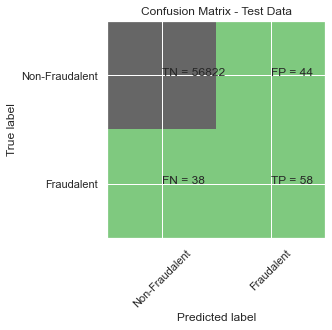

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value_data: 0.8913403146578507
SVM threshold: 0.00035759385028663674
ROC for the test dataset 89.1%


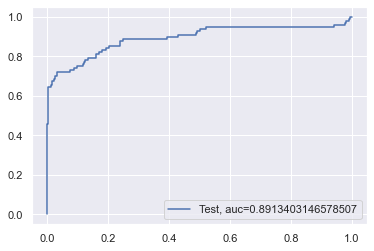

########Time Taken by Model: --- 74.90664958953857 seconds ---######


In [143]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels_data(df_Results,"Power Transformer",X_train_pt_df1,y_train, X_test_pt_df1, y_test)
print("Time Taken by Model: ------ %s seconds -----" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels_data(df_Results,"Power Transformer",X_train_pt_df1,y_train, X_test_pt_df1, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels_data(df_Results,"Power Transformer",X_train_pt_df1,y_train, X_test_pt_df1, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("####Random Forest Model#####")
start_time = time.time()
df_Results = buildAndRunRandomForestModels_data(df_Results,"Power Transformer",X_train_pt_df1,y_train, X_test_pt_df1, y_test)
print("########Time Taken by Model: --- %s seconds ---########" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("######XGBoost Model#######")
start_time = time.time()
df_Results = buildAndRunXGBoostModels_data(df_Results,"Power Transformer",X_train_pt_df1,y_train, X_test_pt_df1, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels_data(df_Results,"Power Transformer",X_train_pt_df1,y_train, X_test_pt_df1, y_test)
print("########Time Taken by Model: --- %s seconds ---######" % (time.time() - start_time))

In [144]:
df_Results.head()

Data_Imbalance_Handiling                                       Model  \
0        Power Transformer  Logistic Regression with L2 Regularisation   
1        Power Transformer  Logistic Regression with L1 Regularisation   
2                      NaN                                         KNN   
3        Power Transformer            Tree Model with entropy criteria   
4        Power Transformer                               Random Forest   

   Accuracy  roc_value  threshold Data_Imbalance_Handling  roc_value_data  
0  0.998999   0.966806   0.001289                     NaN             NaN  
1  0.998912   0.970121   0.009486                     NaN             NaN  
2  0.999298   0.900851   0.200000       Power Transformer             NaN  
3  0.999052   0.864337   1.000000                     NaN             NaN  
4  0.999350        NaN   0.010000                     NaN        0.940564

#### Lets Perform cross validation with RepeatedKFold

In [145]:
#Lets perfrom RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN######", train_index, "TEST######", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN###### [     0      1      2 ... 284804 284805 284806] TEST###### [     5      6      9 ... 284795 284799 284803]
TRAIN###### [     1      2      3 ... 284804 284805 284806] TEST###### [     0      4     23 ... 284784 284788 284796]
TRAIN###### [     0      1      2 ... 284803 284804 284806] TEST###### [     3     12     20 ... 284782 284783 284805]
TRAIN###### [     0      3      4 ... 284803 284805 284806] TEST###### [     1      2      7 ... 284801 284802 284804]
TRAIN###### [     0      1      2 ... 284803 284804 284805] TEST###### [    10     15     16 ... 284793 284794 284806]
TRAIN###### [     0      1      2 ... 284802 284803 284804] TEST###### [     8      9     15 ... 284798 284805 284806]
TRAIN###### [     0      1      2 ... 284804 284805 284806] TEST###### [    18     24     25 ... 284801 284802 284803]
TRAIN###### [     0      4      6 ... 284803 284805 284806] TEST###### [     1      2      3 ... 284797 284799 284804]
TRAIN###### [     1      2      3 ... 284804 284

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9819301027078078
Max auc_roc for l1: 0.9598305191971
Parameters for l2 regularisations
[[-4.67999931e-03  4.72409901e-02 -7.68956790e-02  2.30586030e-01
   9.04525713e-02 -4.54826768e-02 -3.88245963e-02 -1.23537223e-01
  -8.95262340e-02 -1.71624330e-01  1.31532857e-01 -1.87572991e-01
  -4.62006262e-02 -3.77414346e-01 -2.10664874e-03 -9.47580721e-02
  -8.50012866e-02 -6.89041760e-05  1.10357699e-02 -1.58185390e-02
   4.77485076e-02  3.25040999e-02 -2.08794601e-02 -1.18154159e-02
  -8.84048729e-03  8.64450862e-03 -9.51712133e-03  2.90743825e-03
   3.46992950e-04  6.02385471e-03]]
[-7.47108155]
{1: array([[0.60475819, 0.60619147, 0.6217905 , 0.73923829, 0.87171466,
        0.91858211, 0.97908222, 0.98775995, 0.98530336, 0.98065509,
        0.98065509, 0.98065509, 0.98065509, 0.98065509, 0.98065509,
        0.98065509, 0.98065509, 0.98065509, 0.98065509, 0.98065509],
       [0.55310368, 0.55485833, 0.5770217 , 0.731439

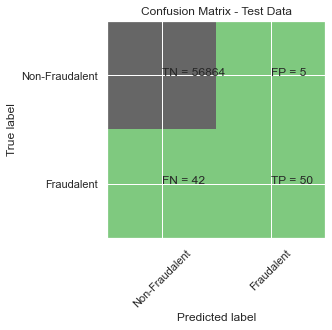

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.91      0.54      0.68        92

    accuracy                           1.00     56961
   macro avg       0.95      0.77      0.84     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9991573181650603
Confusion Matrix


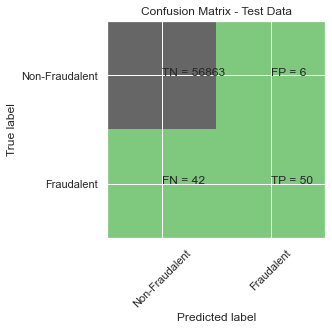

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.89      0.54      0.68        92

    accuracy                           1.00     56961
   macro avg       0.95      0.77      0.84     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9875778581897221
l2 threshold: 0.002029126805612545
ROC for the test dataset 98.8%


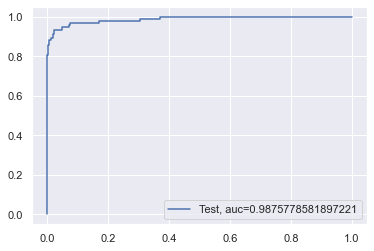

l1 roc_value: 0.9520601122182408
l1 threshold: 0.014259656291077632
ROC for the test dataset 95.2%


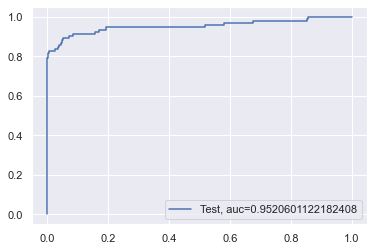

Time Taken by Model: --- 329.8617653846741 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9993153210091115
Confusion Matrix


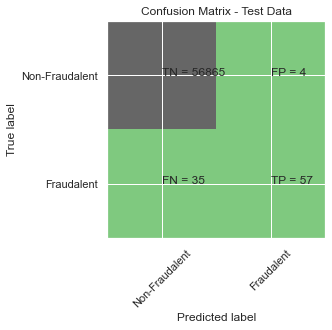

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.93      0.62      0.75        92

    accuracy                           1.00     56961
   macro avg       0.97      0.81      0.87     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8585030852753124
KNN threshold: 0.2
ROC for the test dataset 85.9%


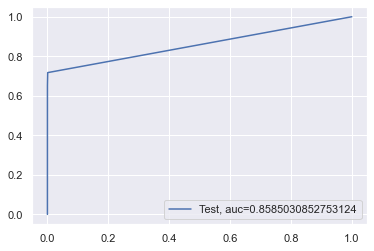

Time Taken by Model: --- 75.44147849082947 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992099857797441
######Confusion Matrix############


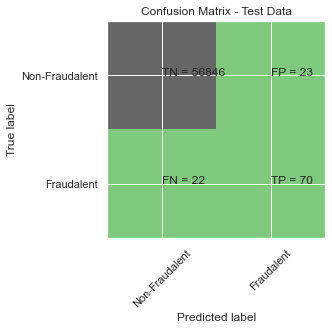

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.75      0.76      0.76        92

    accuracy                           1.00     56961
   macro avg       0.88      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value_data: 0.8802325634734902
Tree threshold: 1.0
ROC for the test dataset 88.0%


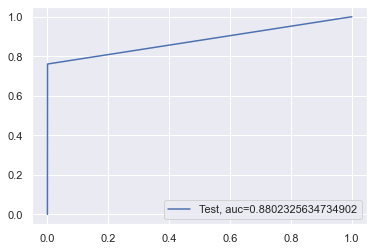

entropy score: 0.9992626533944278
######Confusion Matrix############


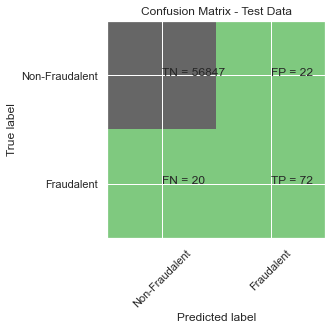

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.77      0.78      0.77        92

    accuracy                           1.00     56961
   macro avg       0.88      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value_data: 0.8911109208271947
Tree threshold: 1.0
ROC for the test dataset 89.1%


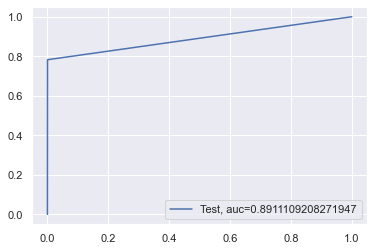

Time Taken by Model: --- 31.367367029190063 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9996137708256526
Confusion Matrix


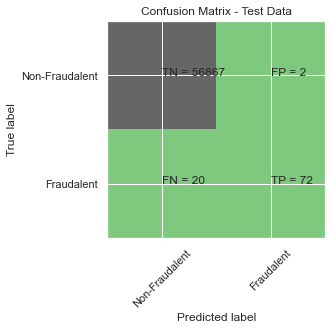

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.97      0.78      0.87        92

    accuracy                           1.00     56961
   macro avg       0.99      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value_data: 0.9548764628394625
Random Forest threshold: 0.01
ROC for the test dataset 95.5%


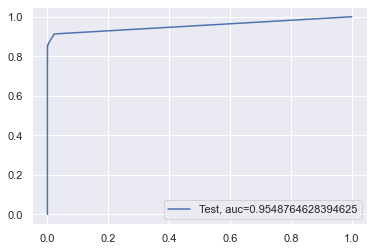

Time Taken by Model: --- 207.40684247016907 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996313266972139
Confusion Matrix


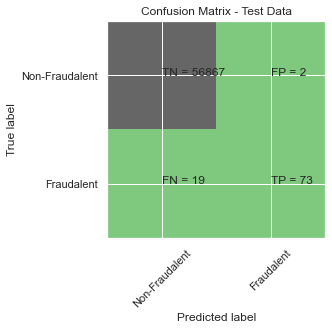

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.97      0.79      0.87        92

    accuracy                           1.00     56961
   macro avg       0.99      0.90      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9860686688782075
XGBoost threshold: 9.436105756321922e-05
ROC for the test dataset 98.6%


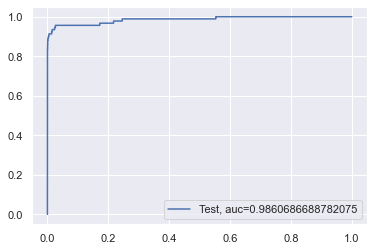

Time Taken by Model: --- 102.57141971588135 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985077509172943
Confusion Matrix


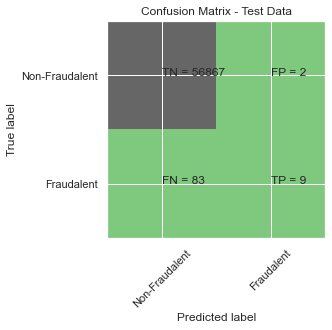

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56869
           1       0.82      0.10      0.17        92

    accuracy                           1.00     56961
   macro avg       0.91      0.55      0.59     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value_data: 0.4379911650498055
SVM threshold: 0.004730458907429908
ROC for the test dataset 43.8%


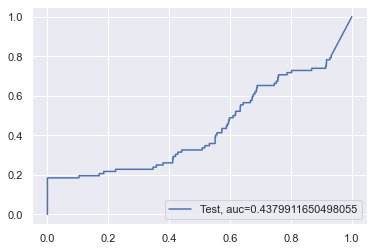

Time Taken by Model: --- 715.8516631126404 seconds ---


In [146]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels_data(df_Results,"RepeatedKFold Cross Validation", X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels_data(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels_data(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels_data(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels_data(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels_data(df_Results,"RepeatedKFold Cross Validation",X_train_cv,y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [147]:
df_Results

Data_Imbalance_Handiling  \
0                Power Transformer   
1                Power Transformer   
2                              NaN   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7   RepeatedKFold Cross Validation   
8   RepeatedKFold Cross Validation   
9                              NaN   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   
1   Logistic Regression with L1 Regularisation  0.998912   0.970121   
2                                          KNN  0.999298   0.900851   
3             Tree Model with entropy criteria  0.999052   0.864337   
4                                Random Forest  0.999350        NaN   
5                                      XGBoost  0.999456   0.972998   
6                                          SVM  0.998560        NaN   
7   Logistic Regression with L2 Regularisation  0.999175   0.987578   
8   Logistic Regression with L1 Regularisation  0.999157   0.952060   
9                                          KNN  0.999315   0.858503   
10            Tree Model with entropy criteria  0.999263   0.891111   
11                               Random Forest  0.999614        NaN   
12                                     XGBoost  0.999631   0.986069   
13                                         SVM  0.998508        NaN   

    threshold         Data_Imbalance_Handling  roc_value_data  
0    0.001289                             NaN             NaN  
1    0.009486                             NaN             NaN  
2    0.200000               Power Transformer             NaN  
3    1.000000                             NaN             NaN  
4    0.010000                             NaN        0.940564  
5    0.000051                             NaN             NaN  
6    0.000358                             NaN        0.891340  
7    0.002029                             NaN             NaN  
8    0.014260                             NaN             NaN  
9    0.200000  RepeatedKFold Cross Validation             NaN  
10   1.000000                             NaN             NaN  
11   0.010000                             NaN        0.954876  
12   0.000094                             NaN             NaN  
13   0.004730                             NaN        0.437991

In [148]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_train_cv,y_train_cv)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(XGBmodel.feature_importances_))], axis = 1)
coefficients.columns = ['Feature','feature_importances']


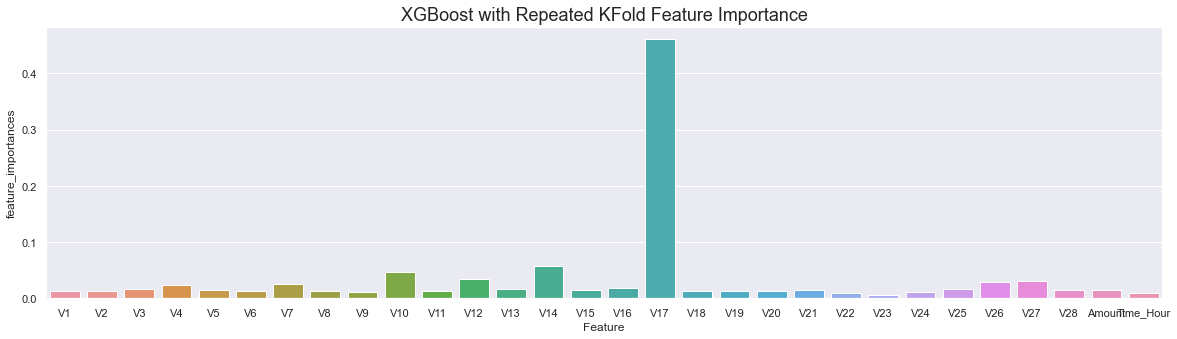

In [149]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='feature_importances', data=coefficients)
plt.title("XGBoost with Repeated KFold Feature Importance", fontsize=18)

plt.show()

#### Perform cross validation with StratifiedKFold

In [150]:
#Lets perfrom StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


### Explore other algorithms by building models


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9824140840599359
Max auc_roc for l1: 0.953472776862677
Parameters for l2 regularisations
[[ 6.73600781e-03  6.15986267e-02 -6.70063410e-02  2.18701499e-01
   5.39481417e-02 -3.19276303e-02 -2.27780302e-02 -1.14937697e-01
  -6.96509641e-02 -1.63704454e-01  1.27842572e-01 -1.91686158e-01
  -3.71575843e-02 -3.60783924e-01  3.60083041e-03 -8.79108552e-02
  -7.27392834e-02 -7.33856611e-04  3.92923119e-03 -2.81853707e-02
   3.81050225e-02  2.33935174e-02 -1.16440890e-02 -9.98429712e-03
  -6.53256281e-03  6.30974117e-03 -1.00800704e-02 -1.68428260e-03
   3.98878648e-04 -2.48726519e-04]]
[-7.41858999]
{1: array([[0.69244071, 0.6942049 , 0.71447445, 0.83769026, 0.95579724,
        0.97136042, 0.98915673, 0.99473675, 0.99128052, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019,
        0.99118019, 0.99118019, 0.99118019, 0.99118019, 0.99118019],
       [0.60701647, 0.60867084, 0.62916329, 0.7688

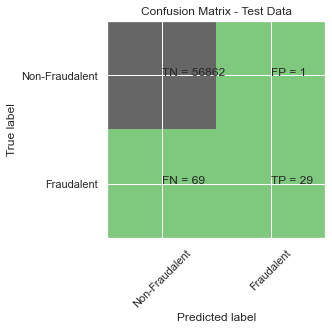

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuarcy of Logistic model with l1 regularisation : 0.9988237566053967
Confusion Matrix


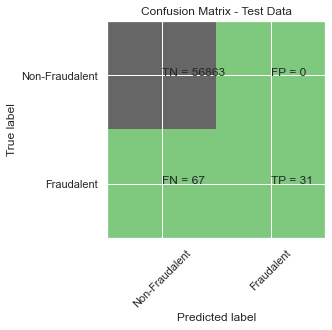

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.32      0.48        98

    accuracy                           1.00     56961
   macro avg       1.00      0.66      0.74     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833581393445829
l2 threshold: 0.0015614788450526657
ROC for the test dataset 98.3%


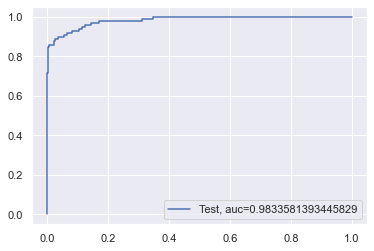

l1 roc_value: 0.9589961479201532
l1 threshold: 0.0056348578801551415
ROC for the test dataset 95.9%


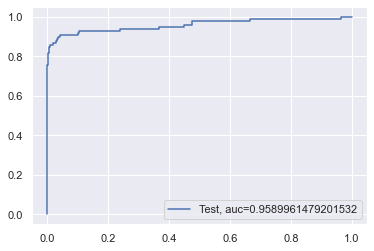

Time Taken by Model: --- 269.1181905269623 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


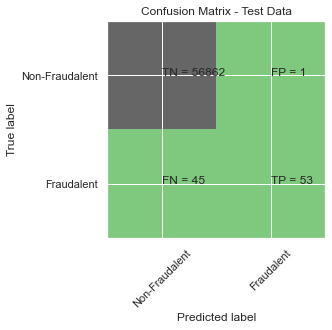

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


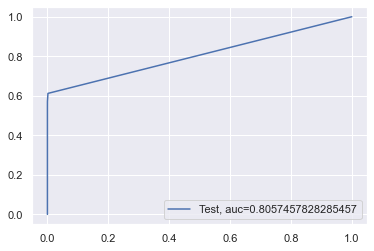

Time Taken by Model: --- 62.41707420349121 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.998841312476958
######Confusion Matrix############


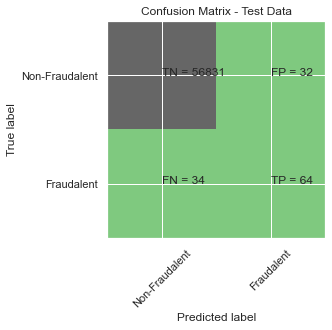

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value_data: 0.8262492341959029
Tree threshold: 1.0
ROC for the test dataset 82.6%


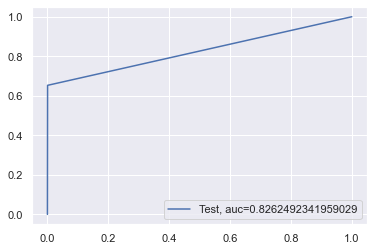

entropy score: 0.9990168711925703
######Confusion Matrix############


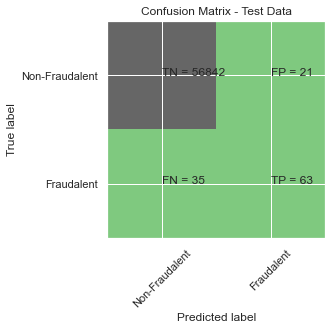

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value_data: 0.8212439170839185
Tree threshold: 1.0
ROC for the test dataset 82.1%


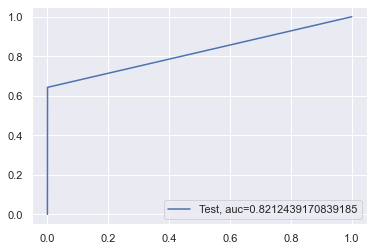

Time Taken by Model: --- 28.079312324523926 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


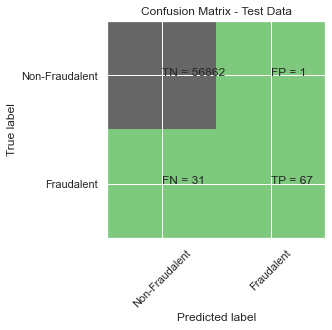

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value_data: 0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


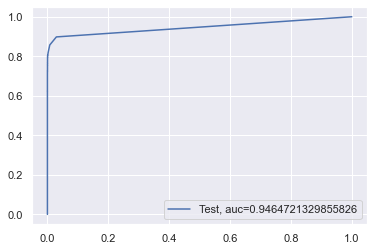

Time Taken by Model: --- 172.46061444282532 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


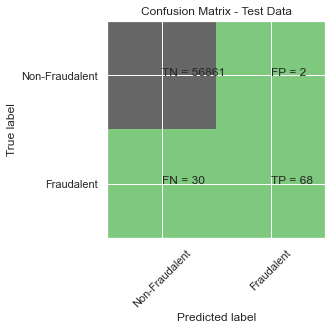

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9728122049164354
XGBoost threshold: 0.00010038168693426996
ROC for the test dataset 97.3%


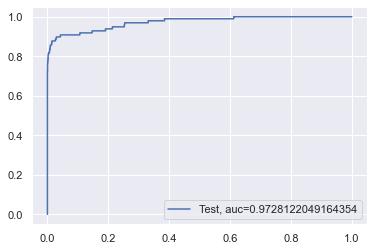

Time Taken by Model: --- 86.95910096168518 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9982795245869981
Confusion Matrix


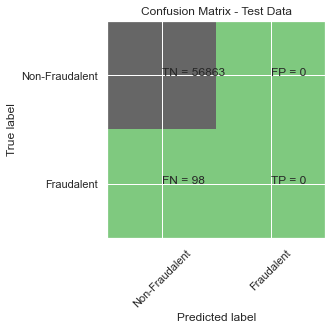

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value_data: 0.4017152576170365
SVM threshold: 0.007976912917428398
ROC for the test dataset 40.2%


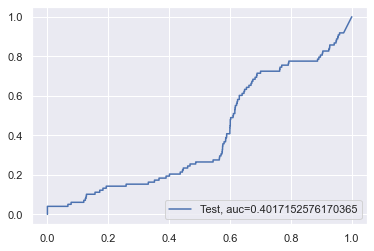

Time Taken by Model: --- 123.35580492019653 seconds ---


In [151]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels_data(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels_data(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels_data(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels_data(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels_data(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels_data(df_Results,"StratifiedKFold Cross Validation",X_train_SKF_cv,y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [152]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                                NaN   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7     RepeatedKFold Cross Validation   
8     RepeatedKFold Cross Validation   
9                                NaN   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14  StratifiedKFold Cross Validation   
15  StratifiedKFold Cross Validation   
16                               NaN   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   
1   Logistic Regression with L1 Regularisation  0.998912   0.970121   
2                                          KNN  0.999298   0.900851   
3             Tree Model with entropy criteria  0.999052   0.864337   
4                                Random Forest  0.999350        NaN   
5                                      XGBoost  0.999456   0.972998   
6                                          SVM  0.998560        NaN   
7   Logistic Regression with L2 Regularisation  0.999175   0.987578   
8   Logistic Regression with L1 Regularisation  0.999157   0.952060   
9                                          KNN  0.999315   0.858503   
10            Tree Model with entropy criteria  0.999263   0.891111   
11                               Random Forest  0.999614        NaN   
12                                     XGBoost  0.999631   0.986069   
13                                         SVM  0.998508        NaN   
14  Logistic Regression with L2 Regularisation  0.998771   0.983358   
15  Logistic Regression with L1 Regularisation  0.998824   0.958996   
16                                         KNN  0.999192   0.805746   
17            Tree Model with entropy criteria  0.999017   0.821244   
18                               Random Forest  0.999438        NaN   
19                                     XGBoost  0.999438   0.972812   
20                                         SVM  0.998280        NaN   

    threshold           Data_Imbalance_Handling  roc_value_data  
0    0.001289                               NaN             NaN  
1    0.009486                               NaN             NaN  
2    0.200000                 Power Transformer             NaN  
3    1.000000                               NaN             NaN  
4    0.010000                               NaN        0.940564  
5    0.000051                               NaN             NaN  
6    0.000358                               NaN        0.891340  
7    0.002029                               NaN             NaN  
8    0.014260                               NaN             NaN  
9    0.200000    RepeatedKFold Cross Validation             NaN  
10   1.000000                               NaN             NaN  
11   0.010000                               NaN        0.954876  
12   0.000094                               NaN             NaN  
13   0.004730                               NaN        0.437991  
14   0.001561                               NaN             NaN  
15   0.005635                               NaN             NaN  
16   0.200000  StratifiedKFold Cross Validation             NaN  
17   1.000000                               NaN             NaN  
18   0.010000                               NaN        0.946472  
19   0.000100                               NaN             NaN  
20   0.007977                               NaN        0.401715

**As the results show Logistic Regression with L2 Regularisation for StratifiedFold cross validation provided best results**



#### Let's proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [153]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


y_pred_l2 = searchCV_l2.predict(X_test)
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))




Max auc_roc for l2: 0.9861018204315645
Parameters for l2 regularisations
[[ 2.08968501e-02  3.28462379e-02 -8.95933553e-02  2.36659906e-01
   8.32104809e-02 -4.90272595e-02 -3.29536055e-02 -1.07954293e-01
  -9.15323580e-02 -1.74666519e-01  1.35608177e-01 -2.08389130e-01
  -4.25649556e-02 -3.76918688e-01 -1.09774213e-02 -1.04485918e-01
  -1.14303871e-01 -8.52123805e-03  1.48940032e-02 -5.65590386e-03
   3.94855674e-02  2.43341093e-02  1.90815408e-03 -1.56950462e-02
  -7.91182687e-03  5.15172829e-03 -3.38850606e-03 -2.41256538e-04
   3.04481639e-04  5.51966463e-03]]
[-7.51243437]
{1: array([[0.58216967, 0.58434192, 0.61022463, 0.77826132, 0.94270322,
        0.98595298, 0.9960218 , 0.99404614, 0.99345392, 0.99451136,
        0.99451136, 0.99451136, 0.99451136, 0.99451136, 0.99451136,
        0.99451136, 0.99451136, 0.99451136, 0.99451136, 0.99451136],
       [0.56080017, 0.56255187, 0.57925831, 0.72049968, 0.88967647,
        0.93827938, 0.9754206 , 0.97876499, 0.97972423, 0.98094072,
  

In [154]:
searchCV_l2.coef_

array([[ 2.08968501e-02,  3.28462379e-02, -8.95933553e-02,
         2.36659906e-01,  8.32104809e-02, -4.90272595e-02,
        -3.29536055e-02, -1.07954293e-01, -9.15323580e-02,
        -1.74666519e-01,  1.35608177e-01, -2.08389130e-01,
        -4.25649556e-02, -3.76918688e-01, -1.09774213e-02,
        -1.04485918e-01, -1.14303871e-01, -8.52123805e-03,
         1.48940032e-02, -5.65590386e-03,  3.94855674e-02,
         2.43341093e-02,  1.90815408e-03, -1.56950462e-02,
        -7.91182687e-03,  5.15172829e-03, -3.38850606e-03,
        -2.41256538e-04,  3.04481639e-04,  5.51966463e-03]])

In [155]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

In [156]:
coefficients

Feature  Importance Coefficient
0          V1                0.020897
1          V2                0.032846
2          V3               -0.089593
3          V4                0.236660
4          V5                0.083210
5          V6               -0.049027
6          V7               -0.032954
7          V8               -0.107954
8          V9               -0.091532
9         V10               -0.174667
10        V11                0.135608
11        V12               -0.208389
12        V13               -0.042565
13        V14               -0.376919
14        V15               -0.010977
15        V16               -0.104486
16        V17               -0.114304
17        V18               -0.008521
18        V19                0.014894
19        V20               -0.005656
20        V21                0.039486
21        V22                0.024334
22        V23                0.001908
23        V24               -0.015695
24        V25               -0.007912
25        V26                0.005152
26        V27               -0.003389
27        V28               -0.000241
28     Amount                0.000304
29  Time_Hour                0.005520

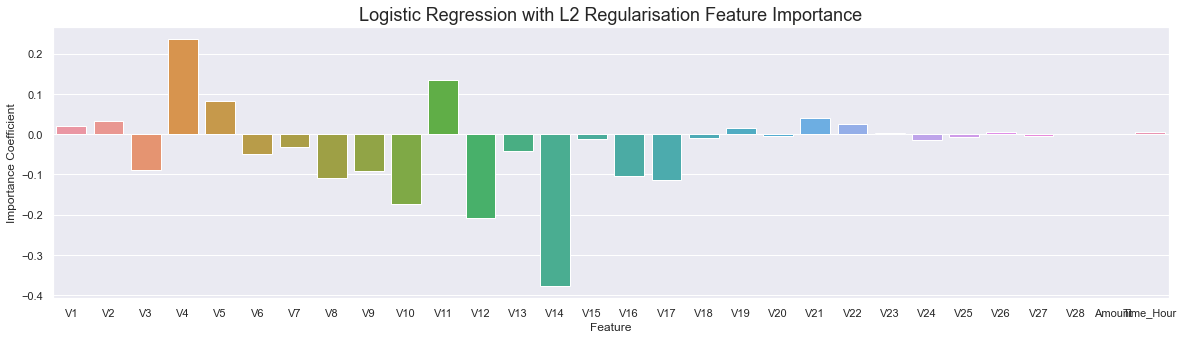

In [157]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()



**Its is clearly Visible that V4, V11, v5 has + ve imporatnce whereas V14, V12, V10 seems to have -ve impact on the predictaions**

#As the models Oversampling data, take significantly longer time to run.
We will try with undersampling methods

In [158]:
# Undersampling

from imblearn.under_sampling import RandomUnderSampler
#Define Oversampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9825090225221983
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.03857957 -0.23453657 -0.16422511  0.64966806 -0.07476101 -0.12846949
   0.08575375 -0.41838569 -0.03885943 -0.34177274  0.18263088 -0.38762817
  -0.23676546 -0.53342209 -0.11516488 -0.04390856  0.03876551 -0.03072023
   0.0415251  -0.24493012 -0.13580666  0.38104036  0.0314569  -0.10700216
   0.27269332 -0.12850328  0.1355387  -0.01817863  0.00067756  0.02291202]]
[-3.77133729]
{1: array([[0.65833333, 0.65897436, 0.66538462, 0.72019231, 0.85641026,
        0.9349359 , 0.97179487, 0.975     , 0.99775641, 0.9974359 ,
        0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 ,
        0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 , 0.9974359 ],
       [0.48635478, 0.48635478, 0.49350227, 0.55328135, 0.74918778,
        0.87556855, 0.93567251, 0.95094217, 0.96361274, 0.96848603,
        0.96848603, 0.96848603, 0.96848603, 0.96848603

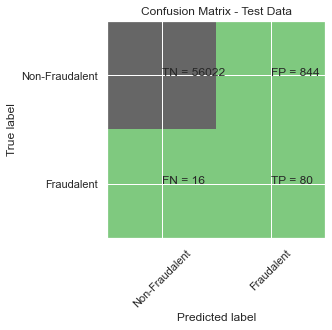

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.09      0.83      0.16        96

    accuracy                           0.98     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


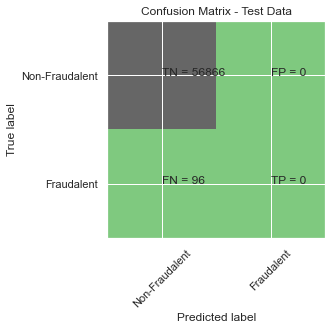

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9660191649374552
l2 threshold: 0.19516404982096006
ROC for the test dataset 96.6%


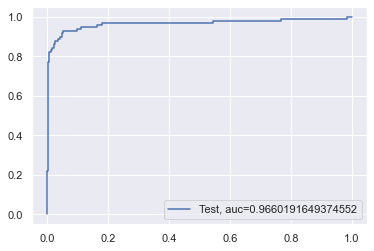

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


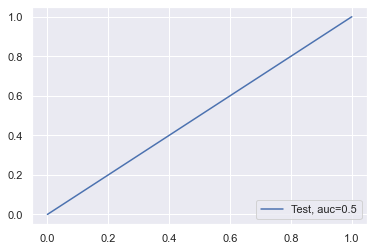

Time Taken by Model: --- 1.9637484550476074 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9640462062427584
Confusion Matrix


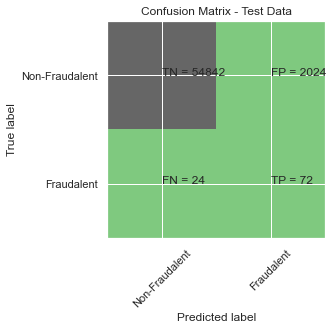

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.03      0.75      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.86      0.52     56962
weighted avg       1.00      0.96      0.98     56962

KNN roc_value: 0.9433287611812564
KNN threshold: 0.4
ROC for the test dataset 94.3%


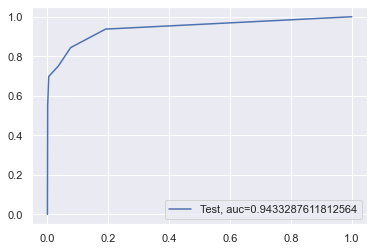

Time Taken by Model: --- 4.501223564147949 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9362381938836417
######Confusion Matrix############


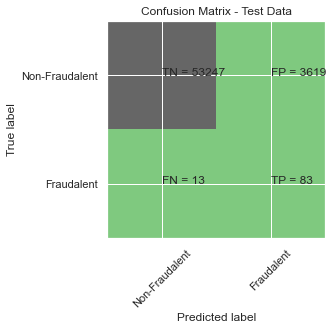

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.86      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.94      0.97     56962

gini tree_roc_value_data: 0.9004712467320837
Tree threshold: 1.0
ROC for the test dataset 90.0%


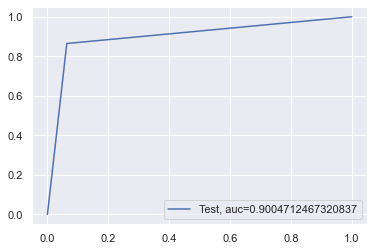

entropy score: 0.9382395281064569
######Confusion Matrix############


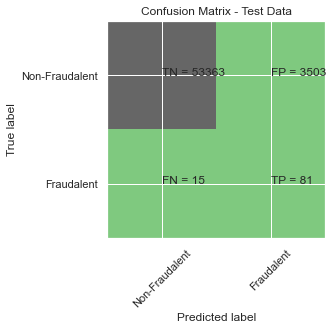

classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56866
           1       0.02      0.84      0.04        96

    accuracy                           0.94     56962
   macro avg       0.51      0.89      0.51     56962
weighted avg       1.00      0.94      0.97     56962

entropy tree_roc_value_data: 0.891074521682552
Tree threshold: 1.0
ROC for the test dataset 89.1%


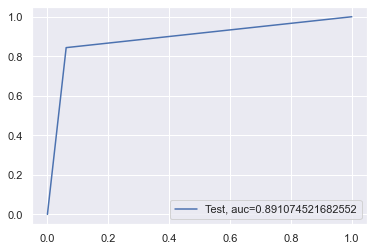

Time Taken by Model: --- 0.893850564956665 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9922579965591096
Confusion Matrix


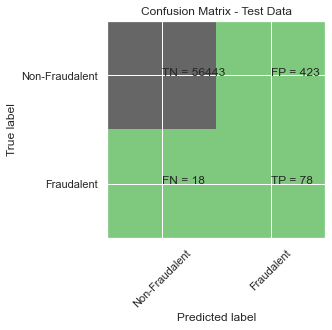

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.16      0.81      0.26        96

    accuracy                           0.99     56962
   macro avg       0.58      0.90      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Random Forest roc_value_data: 0.9736348389195653
Random Forest threshold: 0.31
ROC for the test dataset 97.4%


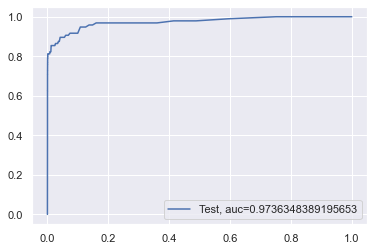

Time Taken by Model: --- 2.5827834606170654 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9873599943822198
Confusion Matrix


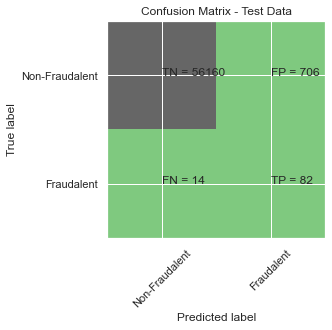

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.85      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.92      0.59     56962
weighted avg       1.00      0.99      0.99     56962

XGboost roc_value: 0.9871116967959764
XGBoost threshold: 0.05607686936855316
ROC for the test dataset 98.7%


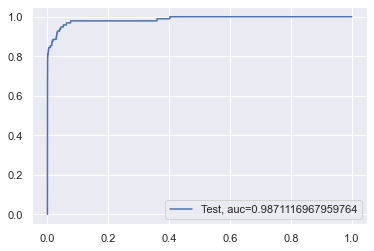

Time Taken by Model: --- 1.357969045639038 seconds ---
--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.6564200695200308
Confusion Matrix


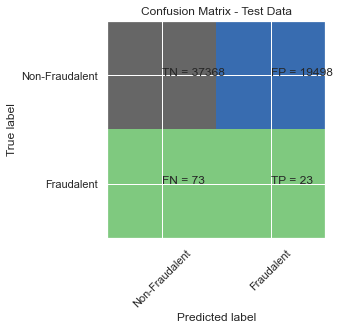

classification Report
              precision    recall  f1-score   support

           0       1.00      0.66      0.79     56866
           1       0.00      0.24      0.00        96

    accuracy                           0.66     56962
   macro avg       0.50      0.45      0.40     56962
weighted avg       1.00      0.66      0.79     56962

SVM roc_value_data: 0.5492365458563406
SVM threshold: 0.3323697258530266
ROC for the test dataset 54.9%


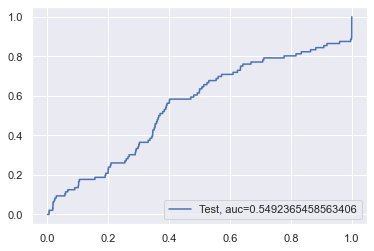

Time Taken by Model: --- 3.496467113494873 seconds ---


In [159]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels_data(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels_data(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels_data(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels_data(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels_data(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels_data(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [160]:
df_Results

Data_Imbalance_Handiling  \
0                  Power Transformer   
1                  Power Transformer   
2                                NaN   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7     RepeatedKFold Cross Validation   
8     RepeatedKFold Cross Validation   
9                                NaN   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14  StratifiedKFold Cross Validation   
15  StratifiedKFold Cross Validation   
16                               NaN   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21              Random Undersampling   
22              Random Undersampling   
23                               NaN   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   
1   Logistic Regression with L1 Regularisation  0.998912   0.970121   
2                                          KNN  0.999298   0.900851   
3             Tree Model with entropy criteria  0.999052   0.864337   
4                                Random Forest  0.999350        NaN   
5                                      XGBoost  0.999456   0.972998   
6                                          SVM  0.998560        NaN   
7   Logistic Regression with L2 Regularisation  0.999175   0.987578   
8   Logistic Regression with L1 Regularisation  0.999157   0.952060   
9                                          KNN  0.999315   0.858503   
10            Tree Model with entropy criteria  0.999263   0.891111   
11                               Random Forest  0.999614        NaN   
12                                     XGBoost  0.999631   0.986069   
13                                         SVM  0.998508        NaN   
14  Logistic Regression with L2 Regularisation  0.998771   0.983358   
15  Logistic Regression with L1 Regularisation  0.998824   0.958996   
16                                         KNN  0.999192   0.805746   
17            Tree Model with entropy criteria  0.999017   0.821244   
18                               Random Forest  0.999438        NaN   
19                                     XGBoost  0.999438   0.972812   
20                                         SVM  0.998280        NaN   
21  Logistic Regression with L2 Regularisation  0.984902   0.966019   
22  Logistic Regression with L1 Regularisation  0.998315   0.500000   
23                                         KNN  0.964046   0.943329   
24            Tree Model with entropy criteria  0.938240   0.891075   
25                               Random Forest  0.992258        NaN   
26                                     XGBoost  0.987360   0.987112   
27                                         SVM  0.656420        NaN   

    threshold           Data_Imbalance_Handling  roc_value_data  
0    0.001289                               NaN             NaN  
1    0.009486                               NaN             NaN  
2    0.200000                 Power Transformer             NaN  
3    1.000000                               NaN             NaN  
4    0.010000                               NaN        0.940564  
5    0.000051                               NaN             NaN  
6    0.000358                               NaN        0.891340  
7    0.002029                               NaN             NaN  
8    0.014260                               NaN             NaN  
9    0.200000    RepeatedKFold Cross Validation             NaN  
10   1.000000                               NaN             NaN  

### Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Oversampling with RandomOverSampler and StratifiedKFold Cross Validation

**We will use Random Oversampling method to handle the class imbalance**
* First we will display class distibution with and without the Random Oversampling.
* Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.
Once we have train and test dataset we will feed the data to below models:
* Logistic Regression with L2 Regularisation
* Logistic Regression with L1 Regularisation	
* KNN
* Decision tree model with Gini criteria
* Decision tree model with Entropy criteria
* Random Forest
* XGBoost
* We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided using the model.
* Once we get results for above model, we will compare the results and select model which provided best results for the Random oversampling techinique

In [161]:
"""
from imblearn.over_sampling import RandomOverSampler
#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n#Define Oversampler\nROS = RandomOverSampler(sampling_strategy=0.5)\n# fit and apply the transform\nX_over, y_over = ROS.fit_resample(X_train, y_train)\n'

In [162]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.986401600361367
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.36894112  0.39524259  0.27988712  0.84268573  0.35173432 -0.48687789
  -0.34223769 -0.33696899 -0.20254334 -0.63931882  0.29255198 -0.90981821
  -0.30753437 -0.90243727  0.02254838 -0.53954365 -0.30207078 -0.13534728
   0.12260258 -0.6913552   0.06628398  0.5272763   0.13941725 -0.44710329
   0.22333436 -0.09535262 -0.3116936   0.18520826  0.00555498  0.04150546]]
[-5.15557986]
{1: array([[0.63212467, 0.76057741, 0.90790043, 0.95721529, 0.97715692,
        0.98453916, 0.98608158, 0.98668397, 0.98703104, 0.98714357,
        0.98714357, 0.98716162, 0.98716162, 0.98716162, 0.98716162,
        0.98716162, 0.98716162, 0.98716162, 0.98716162, 0.98716162],
       [0.63506789, 0.75987752, 0.90518297, 0.955982  , 0.97715207,
        0.98481236, 0.98621043, 0.98655807, 0.98678773, 0.98685045,
        0.98687012, 0.98687012, 0.98687012, 0.98687012,

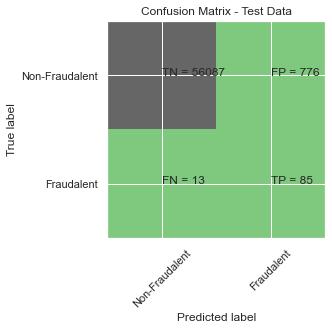

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.10      0.87      0.18        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.59     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


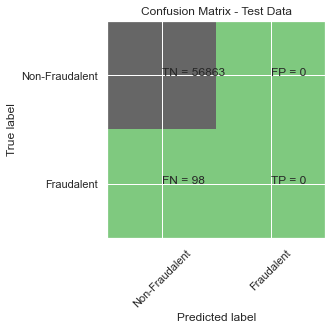

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9804661185297854
l2 threshold: 0.4402148206715411
ROC for the test dataset 98.0%


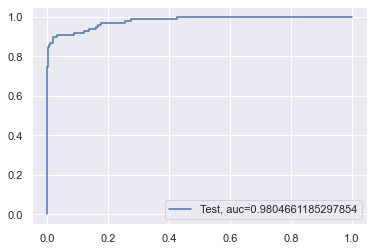

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


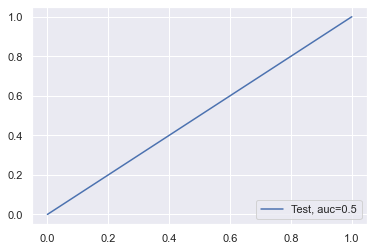

Time Taken by Model: --- 338.66075563430786 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


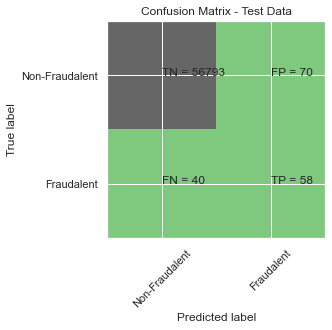

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


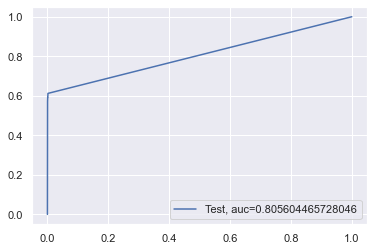

Time Taken by Model: --- 66.16648650169373 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989290918347641
######Confusion Matrix############


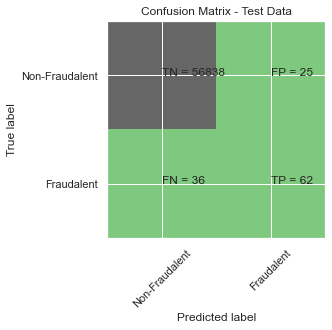

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.71      0.63      0.67        98

    accuracy                           1.00     56961
   macro avg       0.86      0.82      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value_data: 0.8161067040114677
Tree threshold: 1.0
ROC for the test dataset 81.6%


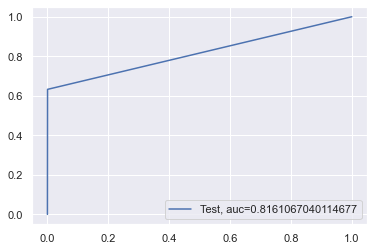

entropy score: 0.9992275416513052
######Confusion Matrix############


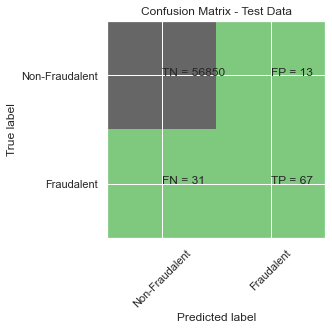

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.84      0.68      0.75        98

    accuracy                           1.00     56961
   macro avg       0.92      0.84      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value_data: 0.8417224248614734
Tree threshold: 1.0
ROC for the test dataset 84.2%


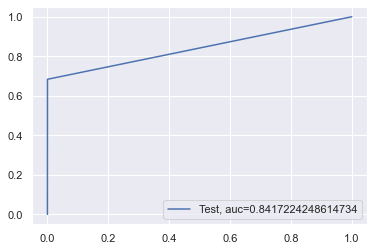

Time Taken by Model: --- 19.557042360305786 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


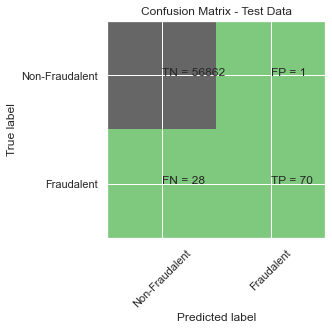

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value_data: 0.966108660019589
Random Forest threshold: 0.01
ROC for the test dataset 96.6%


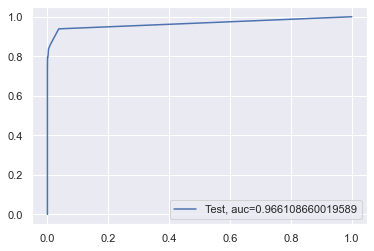

Time Taken by Model: --- 145.34387516975403 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


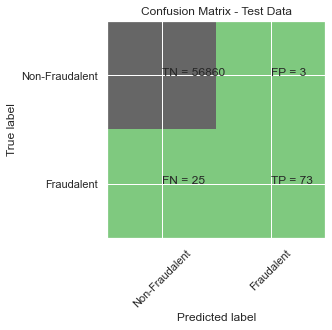

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56961
   macro avg       0.98      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9804055540581426
XGBoost threshold: 3.2240939617622644e-05
ROC for the test dataset 98.0%


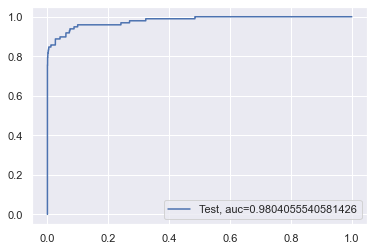

Time Taken by Model: --- 120.59058332443237 seconds ---
--------------------------------------------------------------------------------


In [163]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels_data(df_Results , Data_Imbalance_Handiling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels_data(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels_data(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels_data(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels_data(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels_data(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [164]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                                            NaN   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                 RepeatedKFold Cross Validation   
8                 RepeatedKFold Cross Validation   
9                                            NaN   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14              StratifiedKFold Cross Validation   
15              StratifiedKFold Cross Validation   
16                                           NaN   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21                          Random Undersampling   
22                          Random Undersampling   
23                                           NaN   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28  Random Oversampling with StratifiedKFold CV    
29  Random Oversampling with StratifiedKFold CV    
30                                           NaN   
31  Random Oversampling with StratifiedKFold CV    
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   
1   Logistic Regression with L1 Regularisation  0.998912   0.970121   
2                                          KNN  0.999298   0.900851   
3             Tree Model with entropy criteria  0.999052   0.864337   
4                                Random Forest  0.999350        NaN   
5                                      XGBoost  0.999456   0.972998   
6                                          SVM  0.998560        NaN   
7   Logistic Regression with L2 Regularisation  0.999175   0.987578   
8   Logistic Regression with L1 Regularisation  0.999157   0.952060   
9                                          KNN  0.999315   0.858503   
10            Tree Model with entropy criteria  0.999263   0.891111   
11                               Random Forest  0.999614        NaN   
12                                     XGBoost  0.999631   0.986069   
13                                         SVM  0.998508        NaN   
14  Logistic Regression with L2 Regularisation  0.998771   0.983358   
15  Logistic Regression with L1 Regularisation  0.998824   0.958996   
16                                         KNN  0.999192   0.805746   
17            Tree Model with entropy criteria  0.999017   0.821244   
18                               Random Forest  0.999438        NaN   
19                                     XGBoost  0.999438   0.972812   
20                                         SVM  0.998280        NaN   
21  Logistic Regression with L2 Regularisation  0.984902   0.966019   
22  Logistic Regression with L1 Regularisation  0.998315   0.500000   
23                                         KNN  0.964046   0.943329   
24            Tree Model with entropy criteria  0.938240   0.891075   
25                               Random Forest  0.992258        NaN   
26                                     XGBoost  0.987360   0.987112   
27                                         SVM  0.656420        NaN   
28  Logistic Regression with L2 Regularisation  0.986148   0.980466   
29  Logistic Regression with L1 Regularisation  0.998280   0.500000   
30

## Results for Random Oversampling: 

**Random Oversampling seems to have +ve change in prediction for XGBoost**
Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

### Lets explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

# Oversampling with  SMOTE Oversamplng

**We will use SMOTE Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the SMOTE Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the SMOTE oversampling techinique

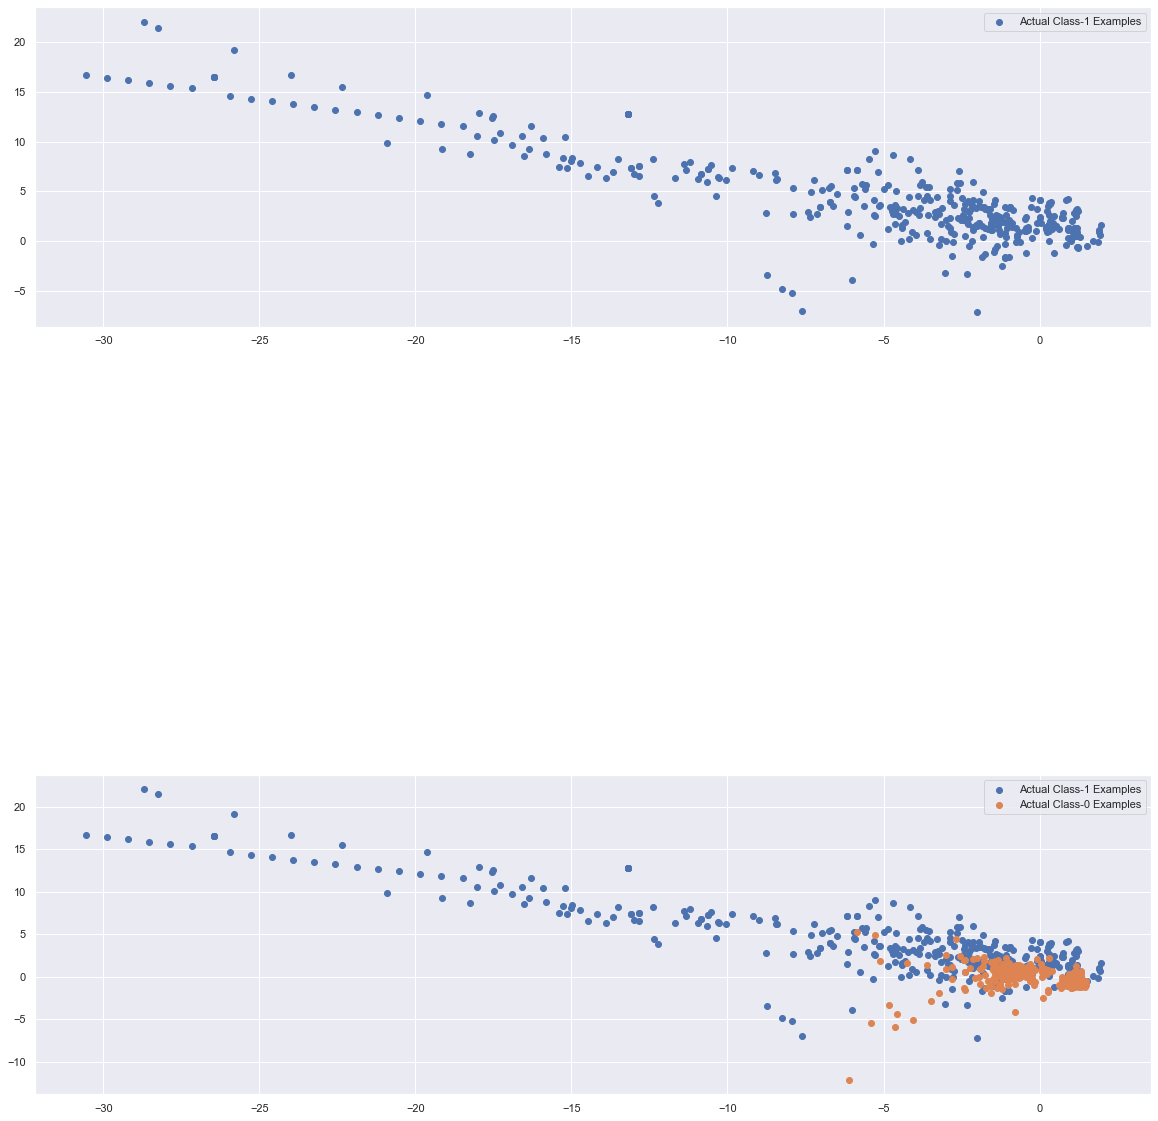

In [165]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
SMOTE = over_sampling.SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 


X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

#plt.subplot(3, 1, 2)
#plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
#plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
#            label='Artificial SMOTE Class-1 Examples')
#plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [166]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9930145951261633
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.77283764  0.70965529  0.6888932   0.93854344  0.49700105 -0.93772369
  -0.69696769 -0.50702043 -0.42310295 -0.9203929   0.61735658 -1.25041755
  -0.23826462 -1.52827923  0.12538215 -0.78246136 -0.84401655 -0.43411481
   0.22159563 -1.0835873  -0.02353459  0.56570055  0.40531651 -0.91718633
   0.5062039   0.03391432 -0.18195133  0.8492816   0.00903935  0.01104794]]
[-5.30129019]
{1: array([[0.64927751, 0.78559745, 0.91748425, 0.96520455, 0.98466299,
        0.98956394, 0.99070011, 0.99160716, 0.99195993, 0.99205818,
        0.99206837, 0.99206837, 0.99206837, 0.99206837, 0.99206837,
        0.99206837, 0.99206837, 0.99206837, 0.99206837, 0.99206837],
       [0.6460276 , 0.7845671 , 0.91904908, 0.96766046, 0.98636753,
        0.99079354, 0.99182711, 0.99273086, 0.99311335, 0.9932075 ,
        0.99322109, 0.99322109, 0.99322109, 0.99322109

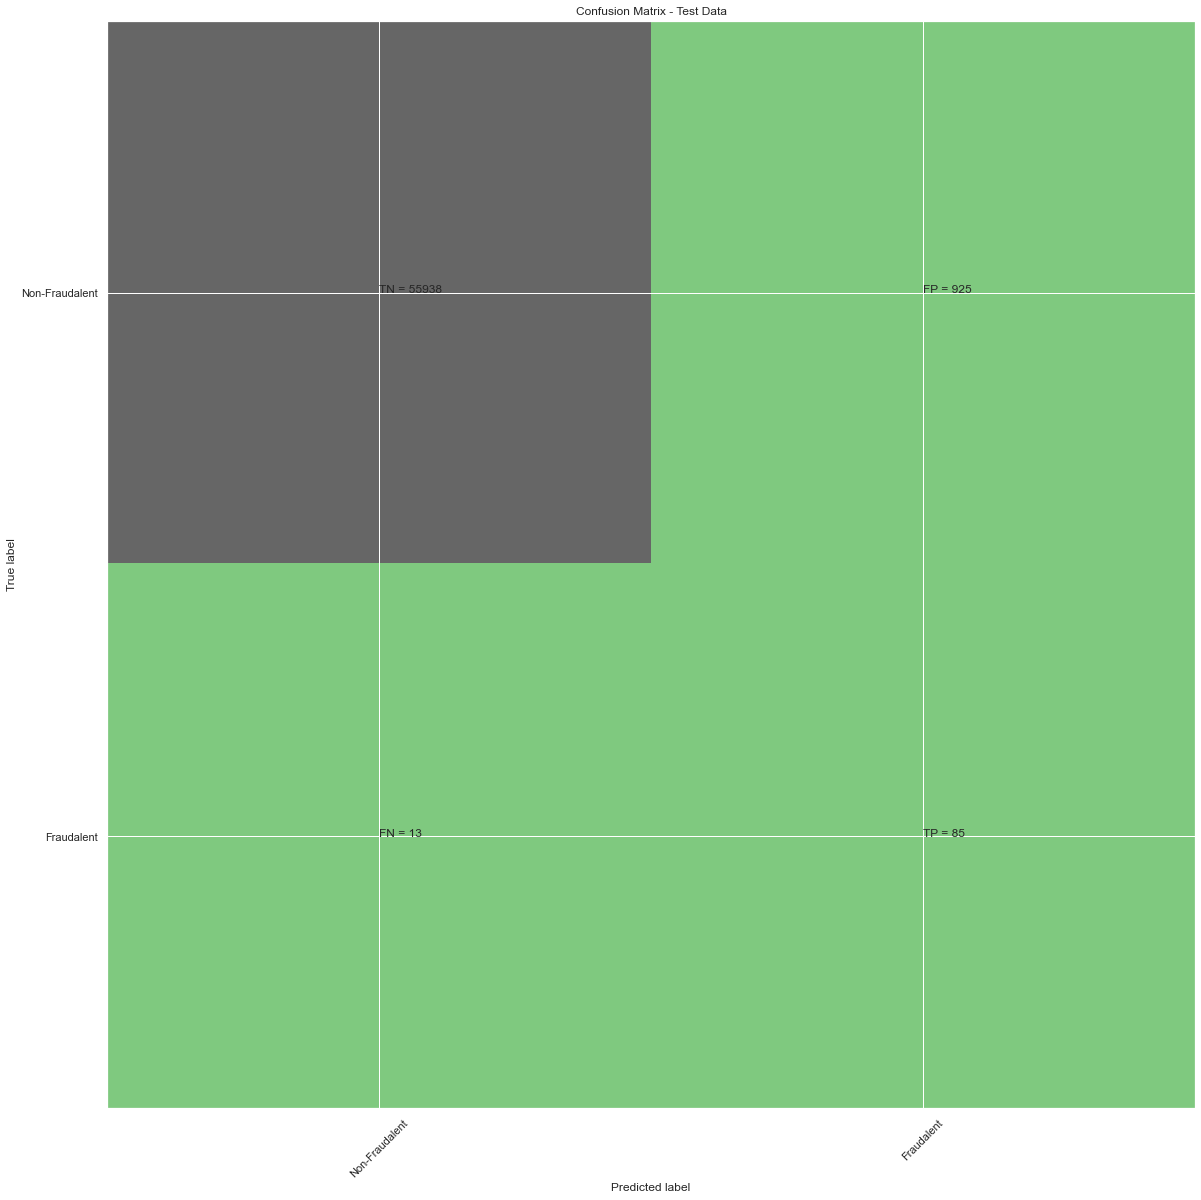

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.15        98

    accuracy                           0.98     56961
   macro avg       0.54      0.93      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


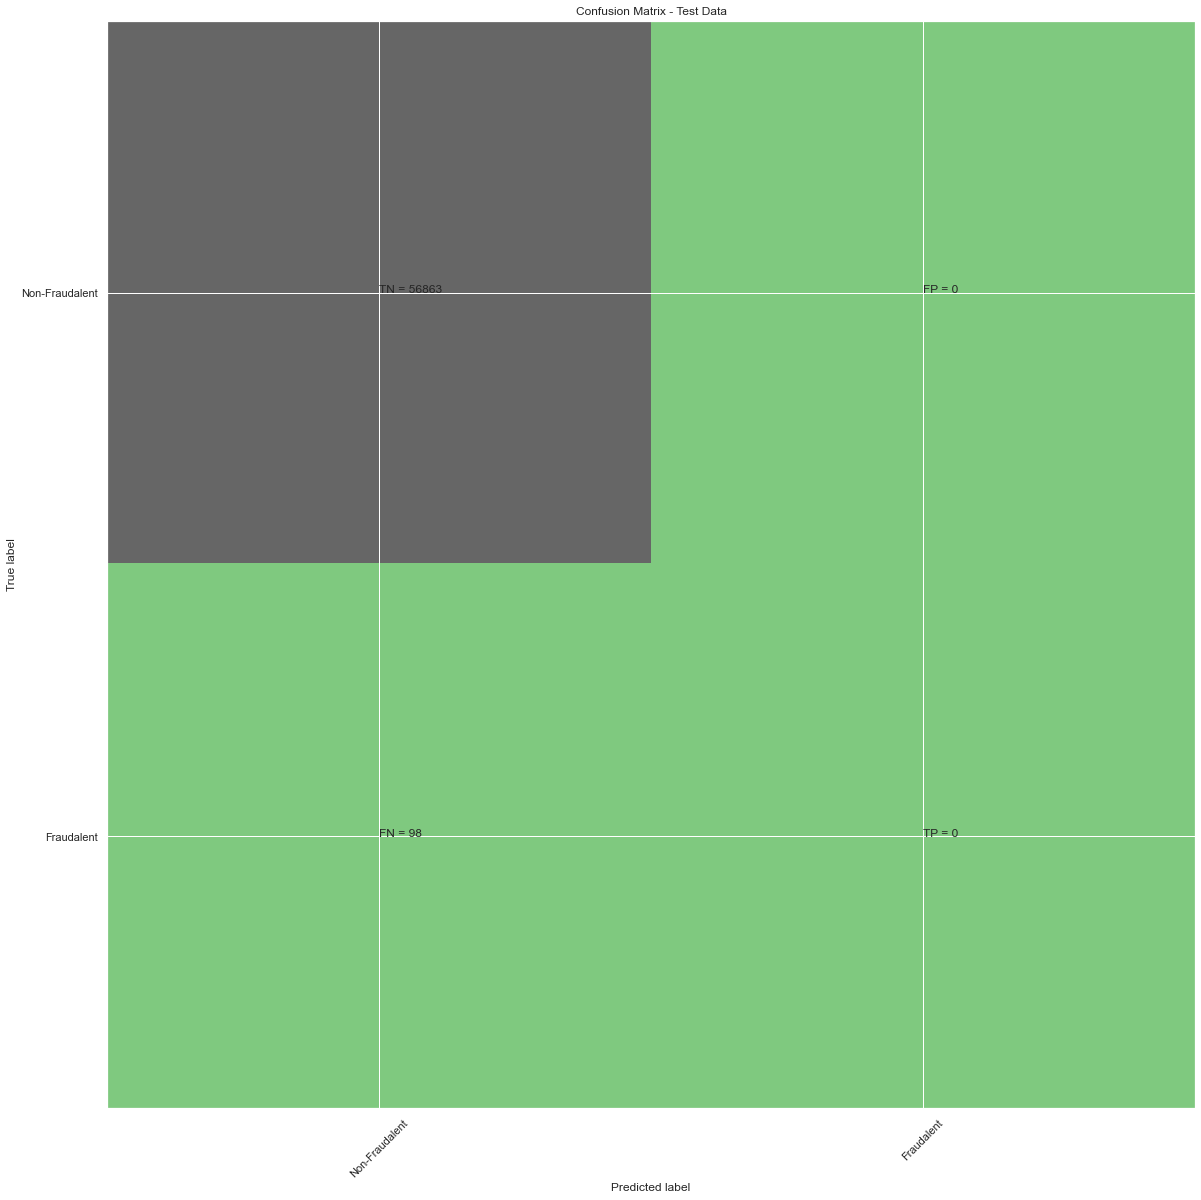

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9745845456695594
l2 threshold: 0.3939648853379337
ROC for the test dataset 97.5%


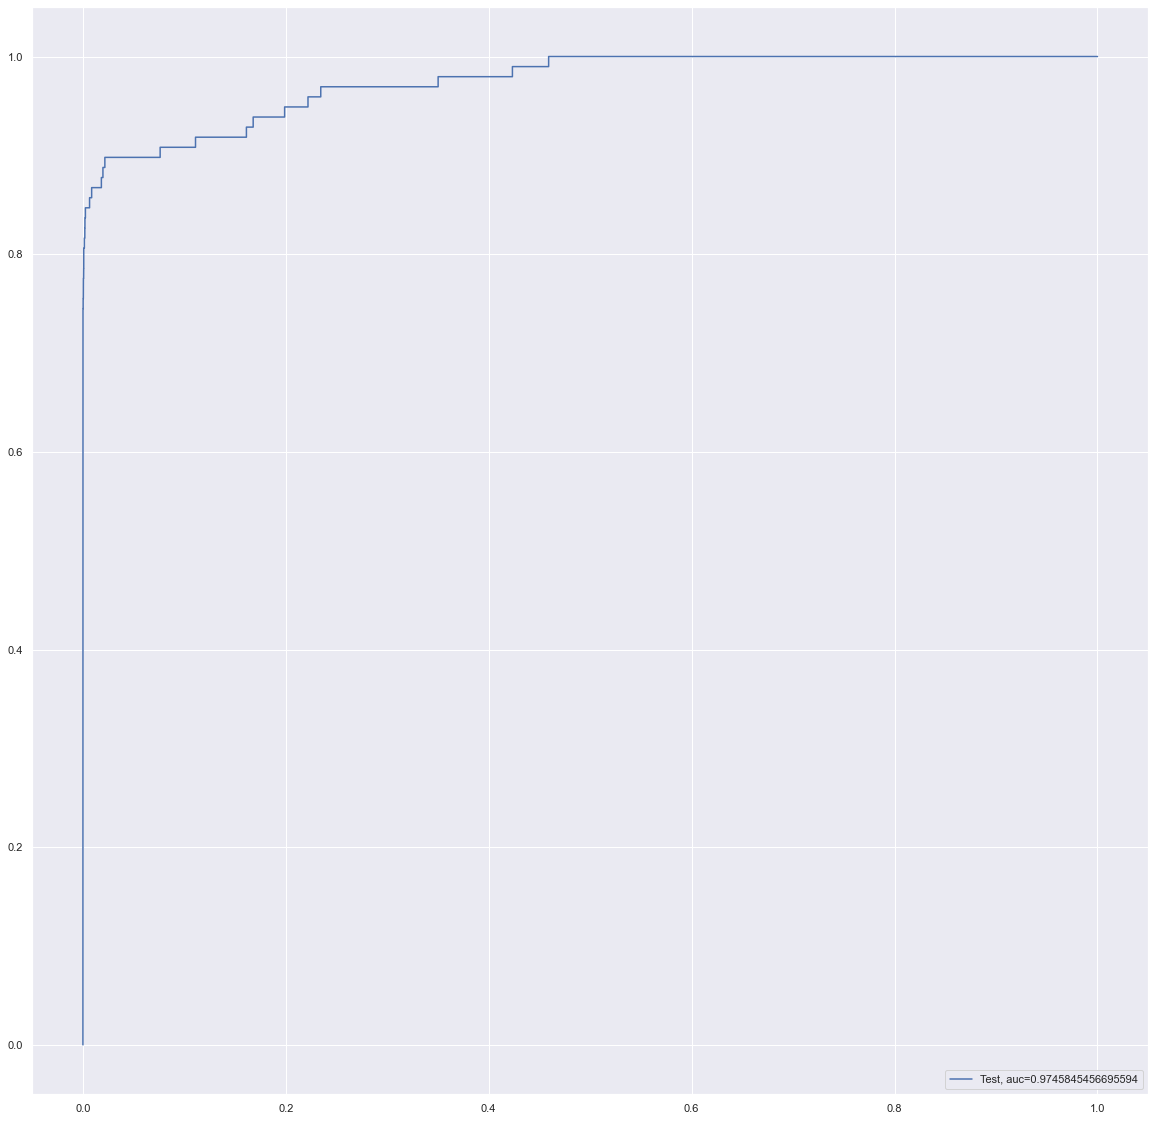

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


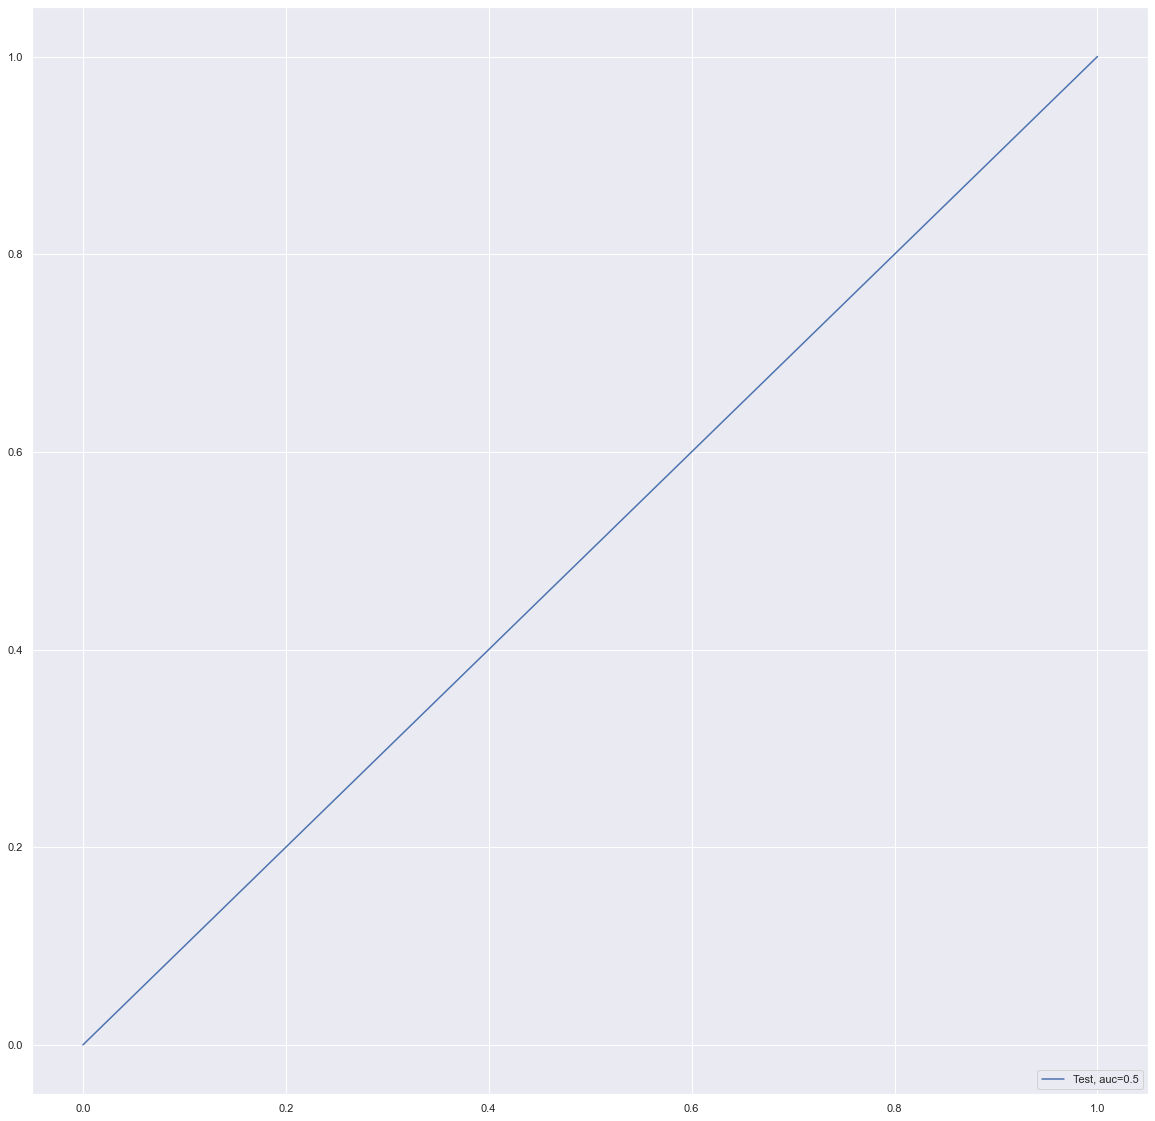

Time Taken by Model: --- 459.65499925613403 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


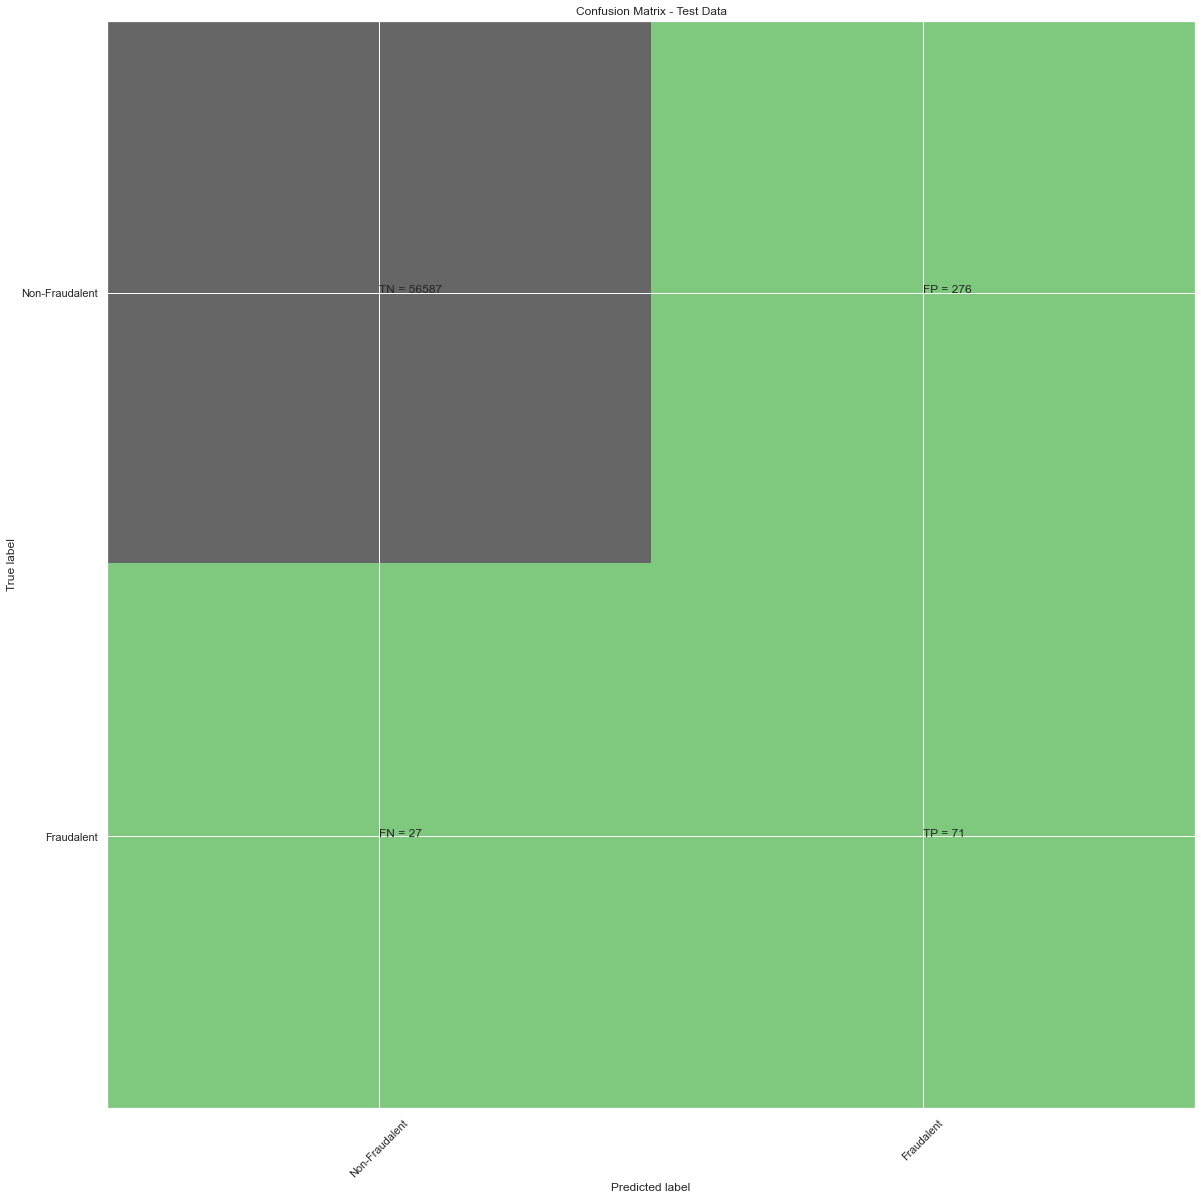

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602674455287628
KNN threshold: 0.6
ROC for the test dataset 86.0%


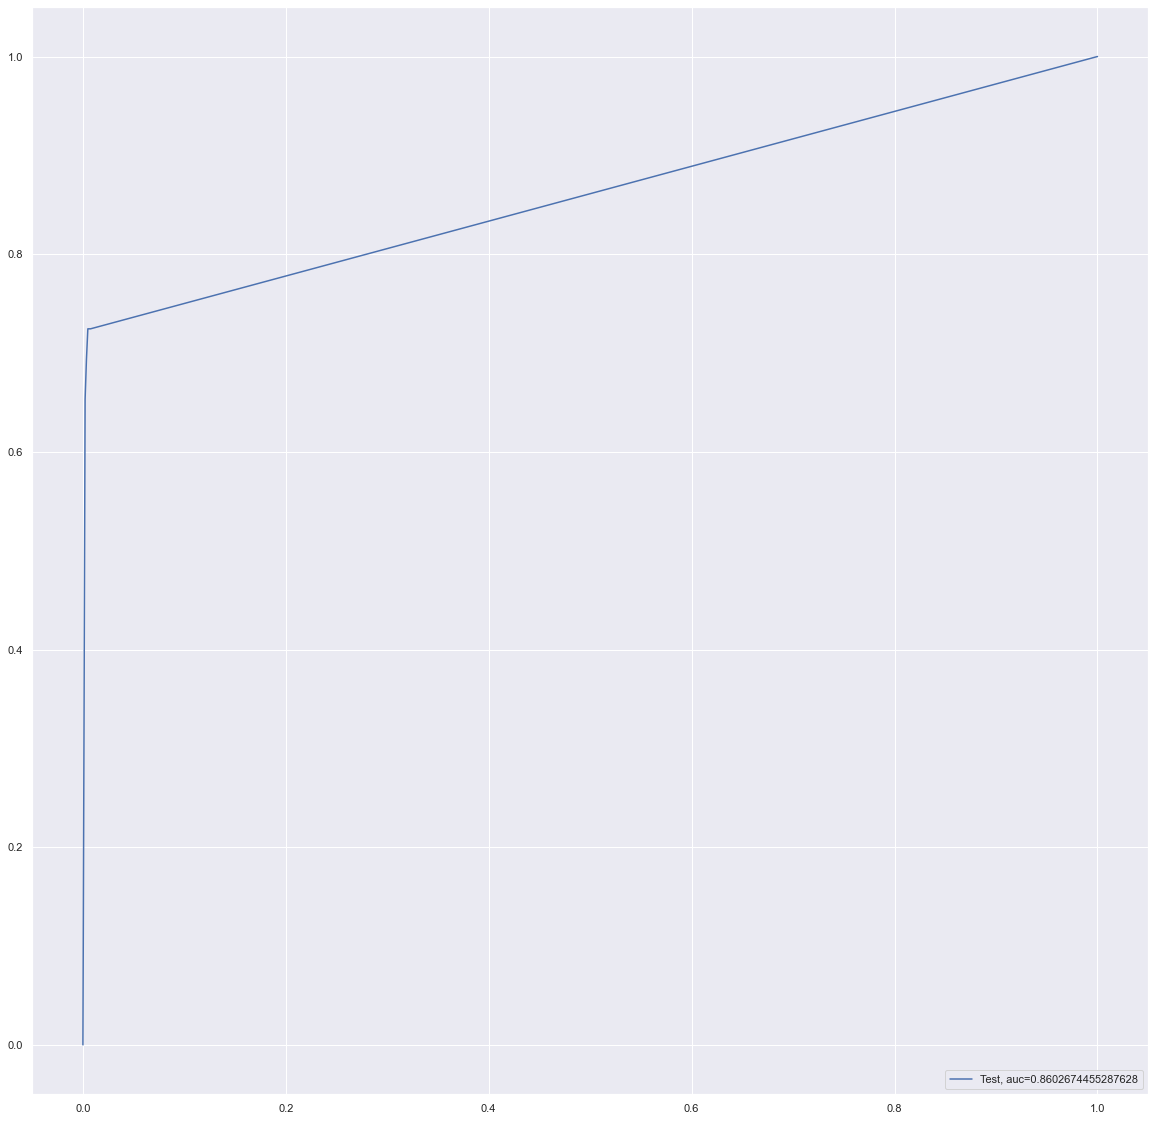

Time Taken by Model: --- 78.61950826644897 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9977528484401608
######Confusion Matrix############


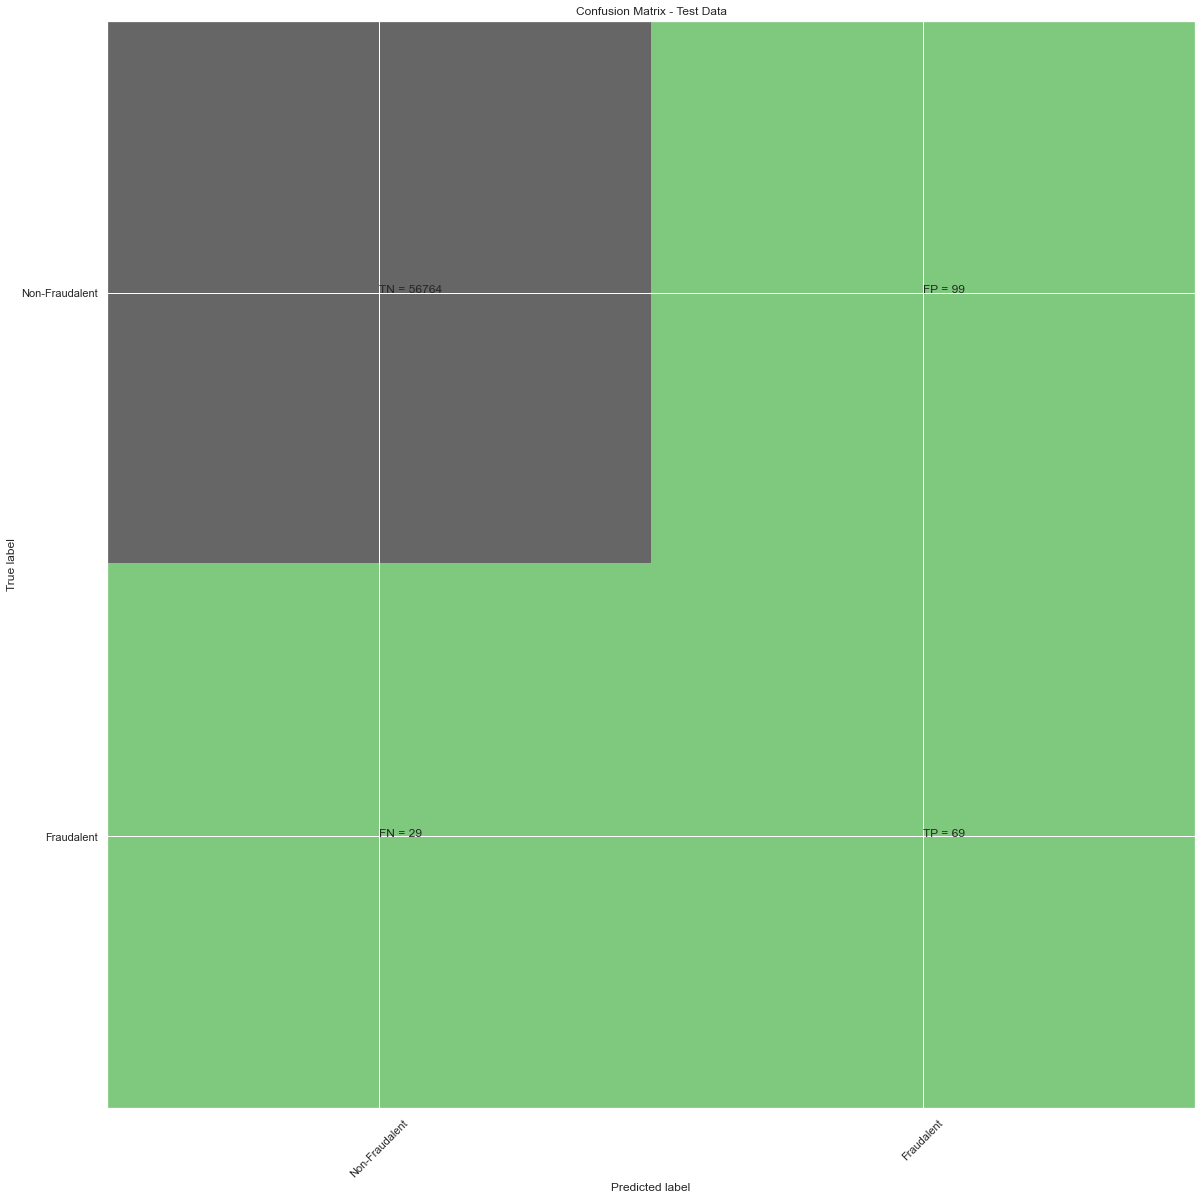

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value_data: 0.8511703029874526
Tree threshold: 1.0
ROC for the test dataset 85.1%


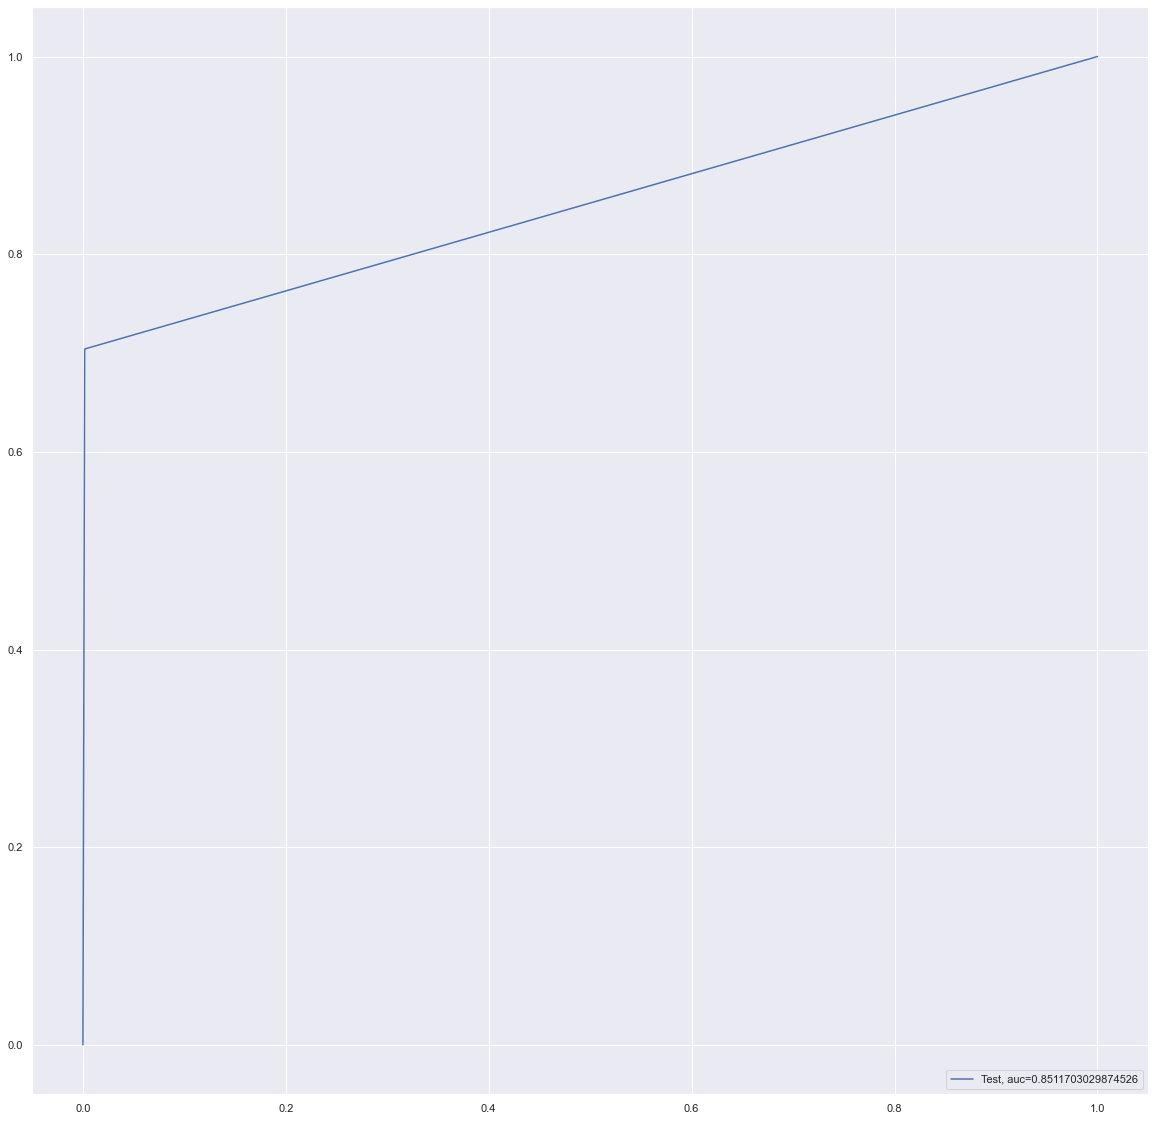

entropy score: 0.9969803900914661
######Confusion Matrix############


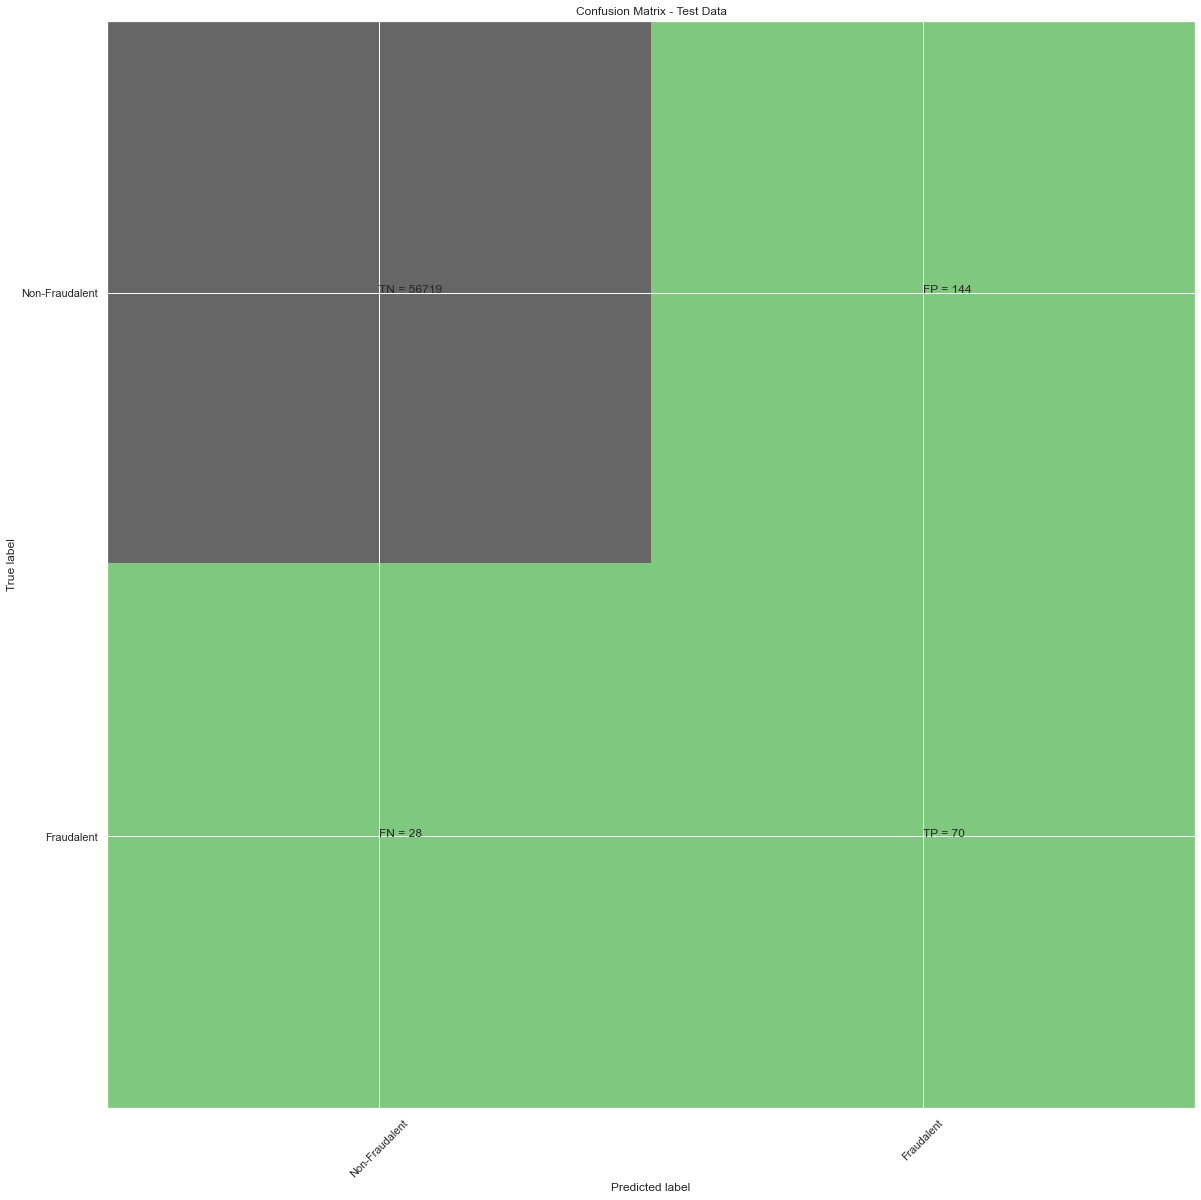

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.33      0.71      0.45        98

    accuracy                           1.00     56961
   macro avg       0.66      0.86      0.72     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value_data: 0.8558766559223799
Tree threshold: 1.0
ROC for the test dataset 85.6%


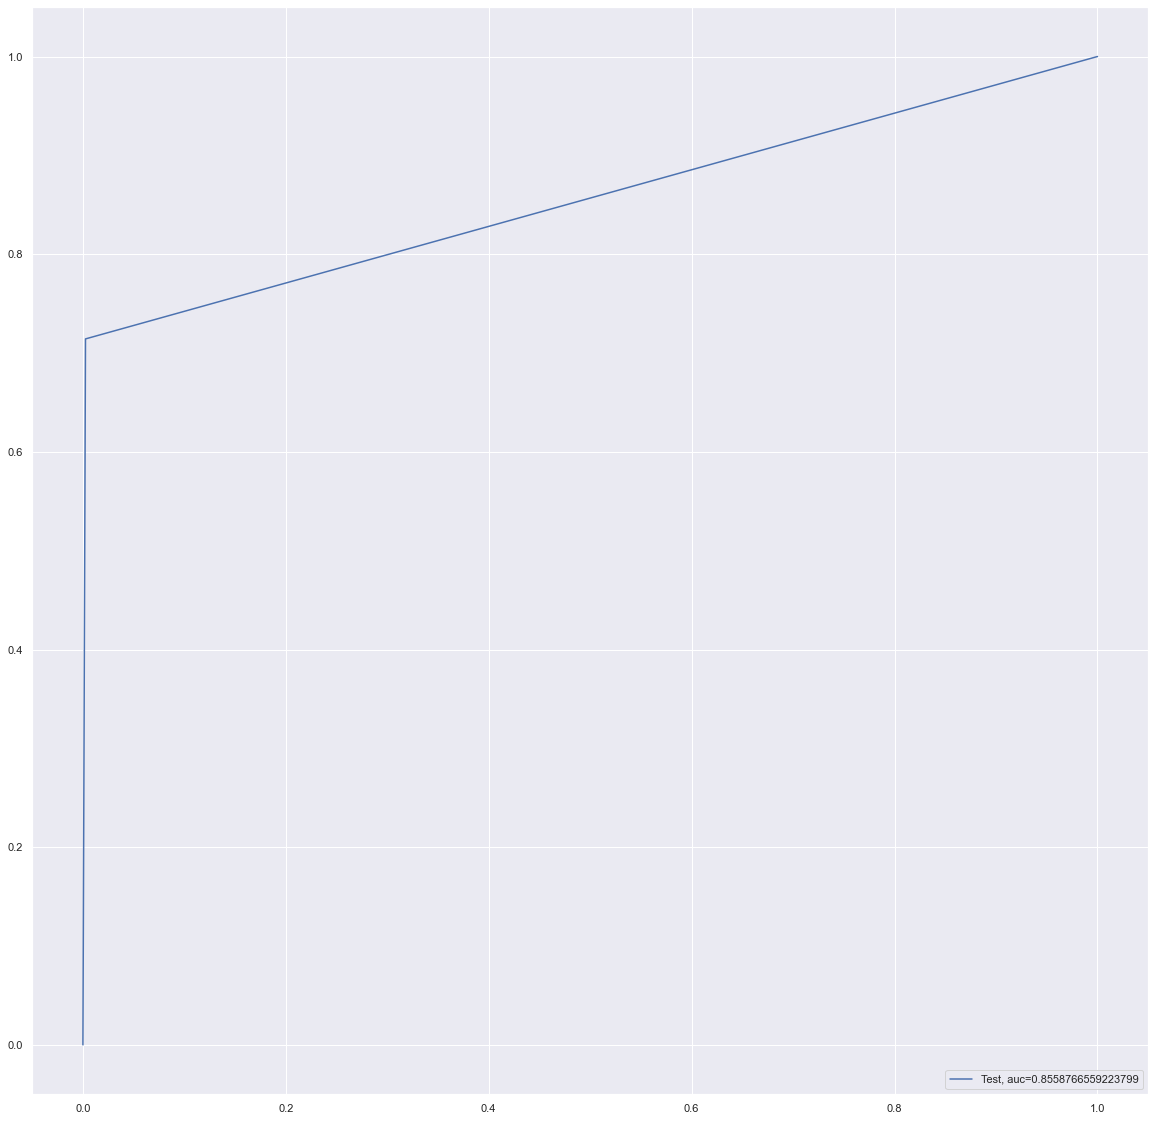

Time Taken by Model: --- 68.94225692749023 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


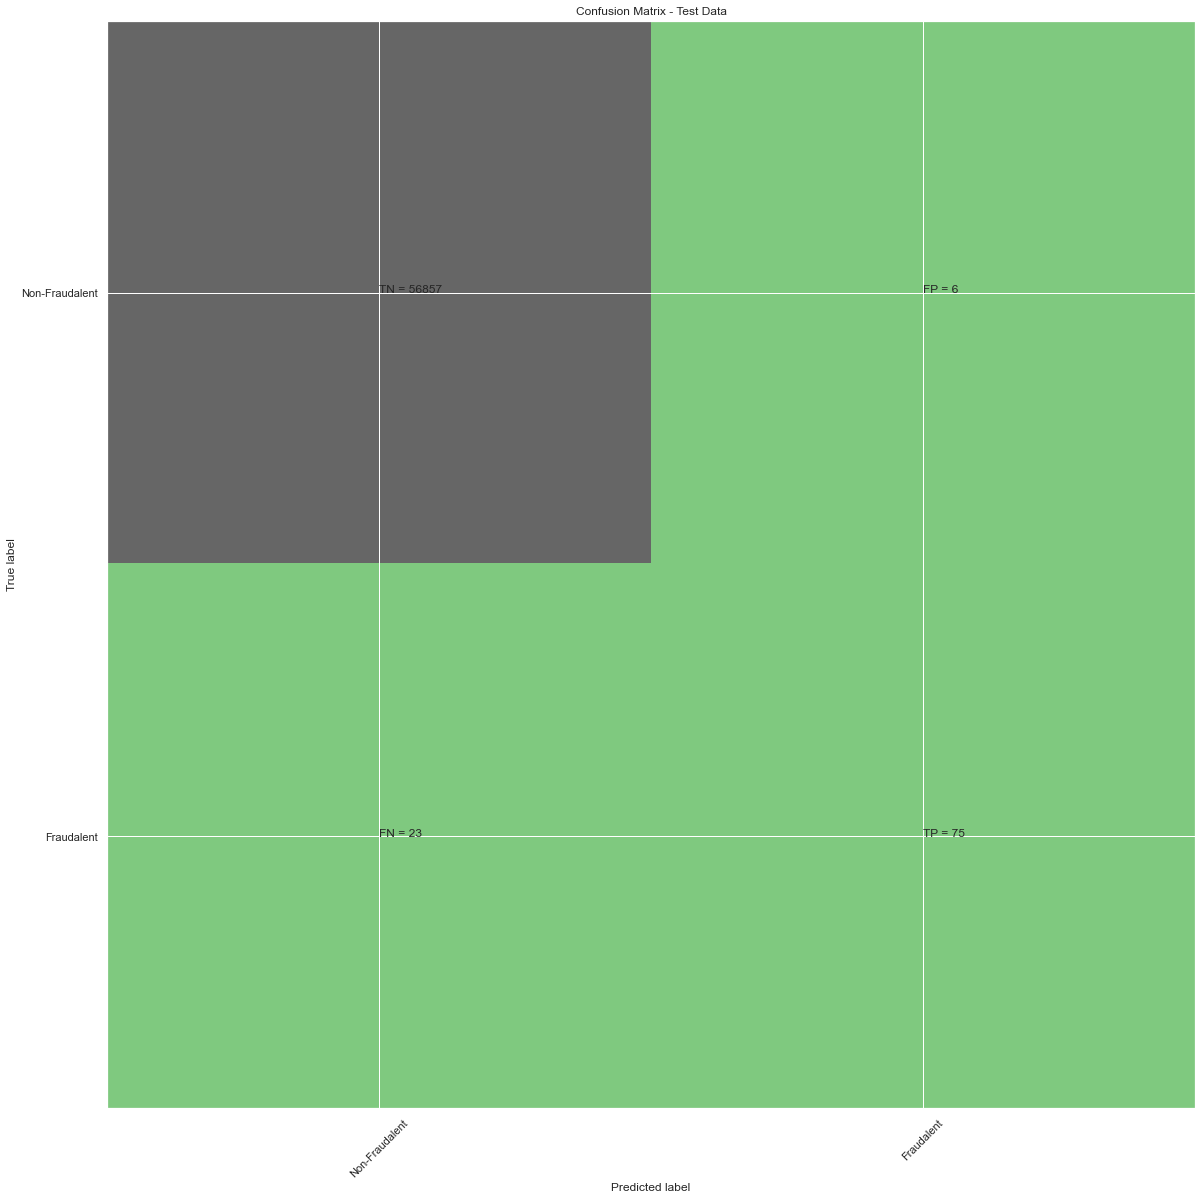

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value_data: 0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


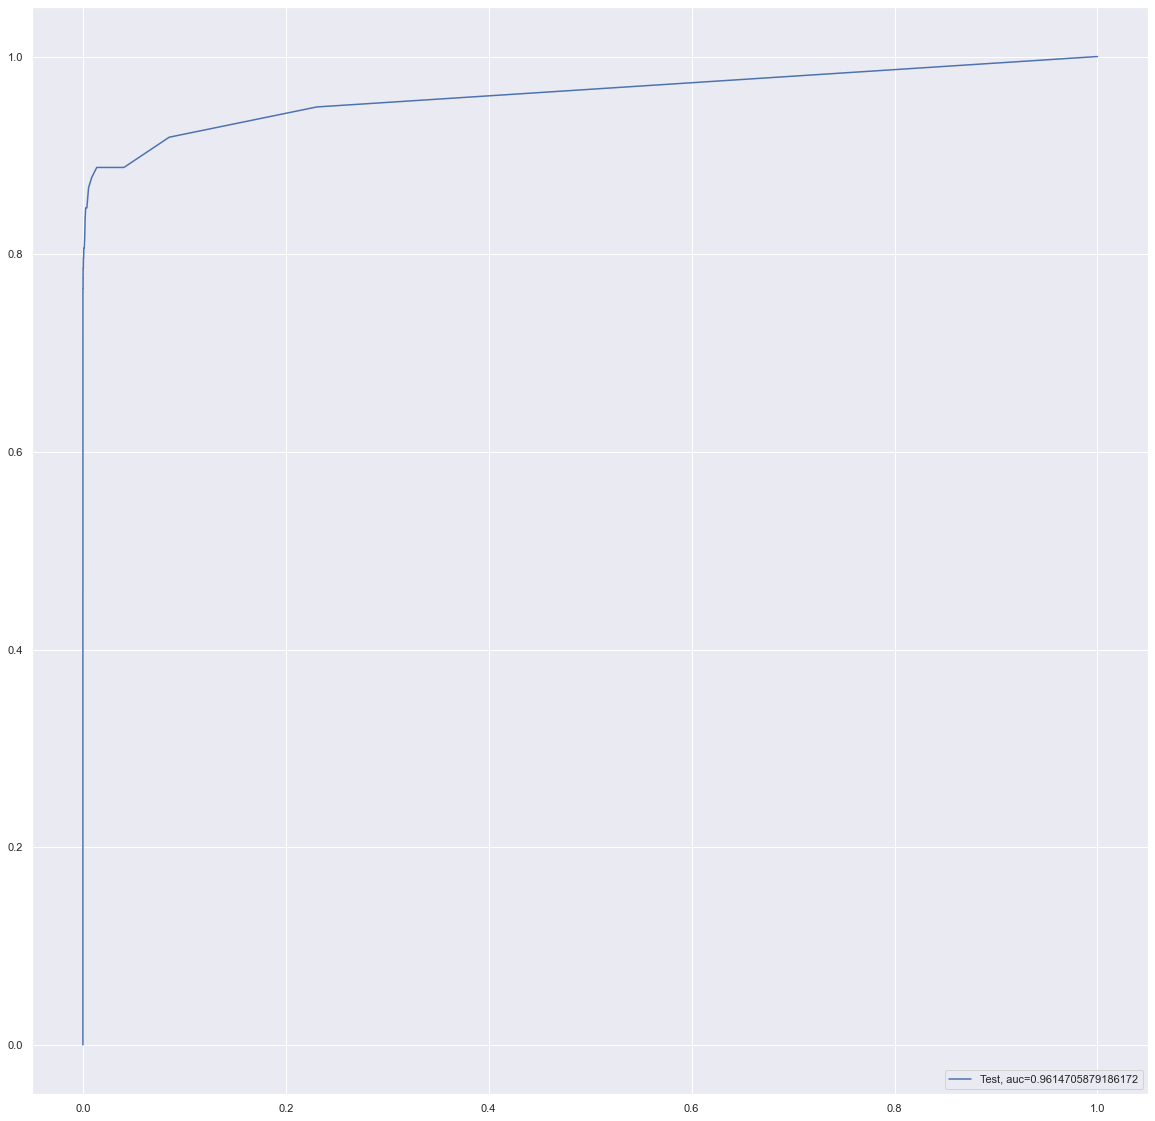

Time Taken by Model: --- 323.66723012924194 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
Confusion Matrix


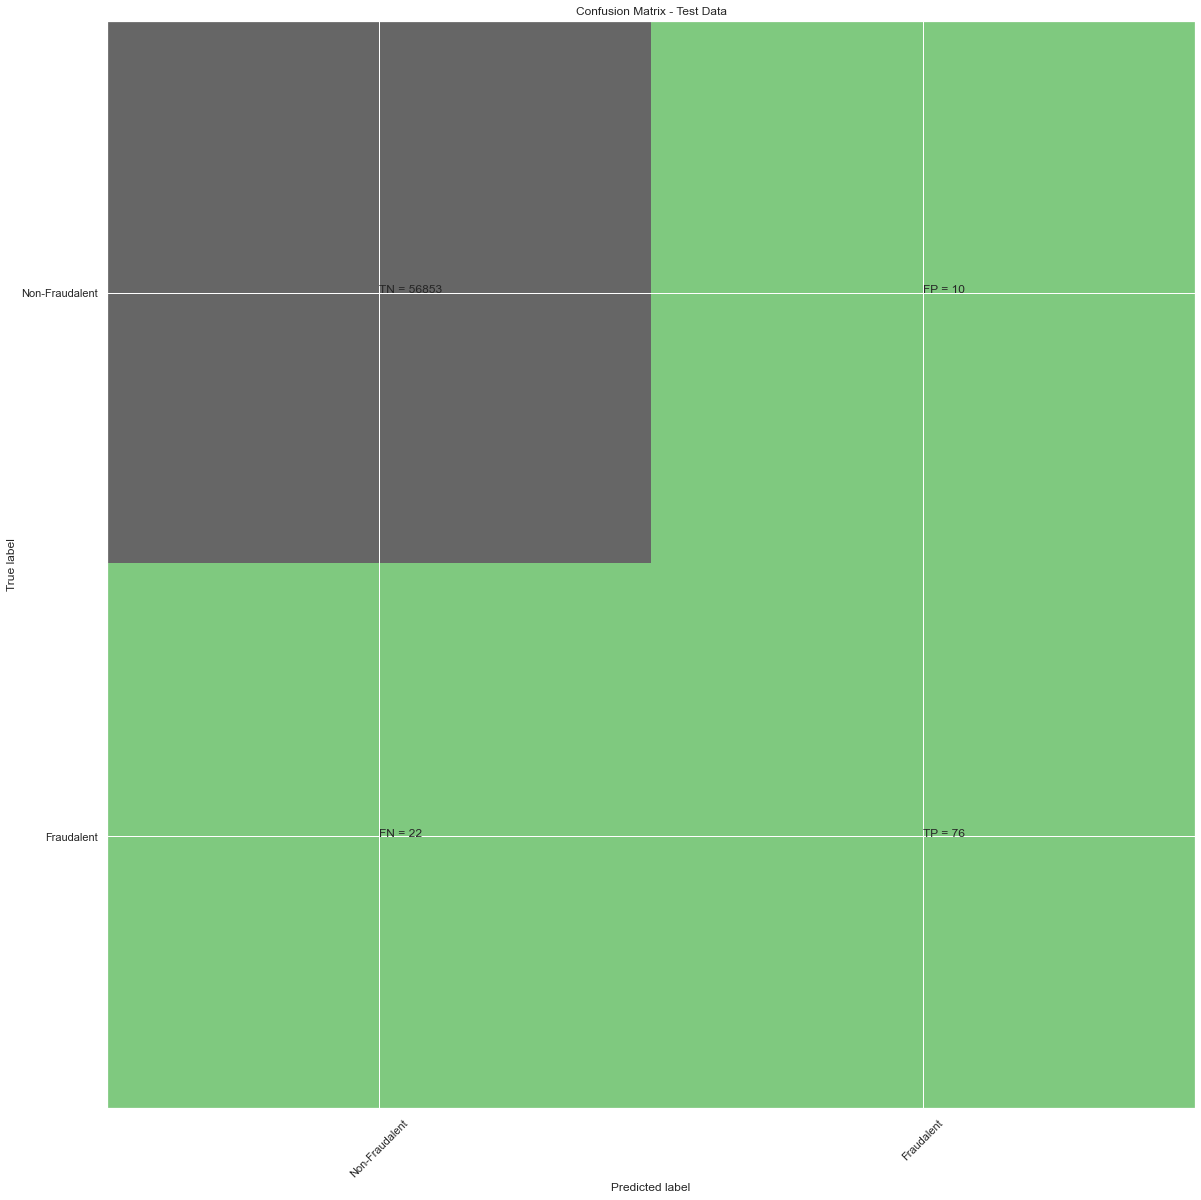

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.78      0.83        98

    accuracy                           1.00     56961
   macro avg       0.94      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9741530574560336
XGBoost threshold: 0.00022058551257941872
ROC for the test dataset 97.4%


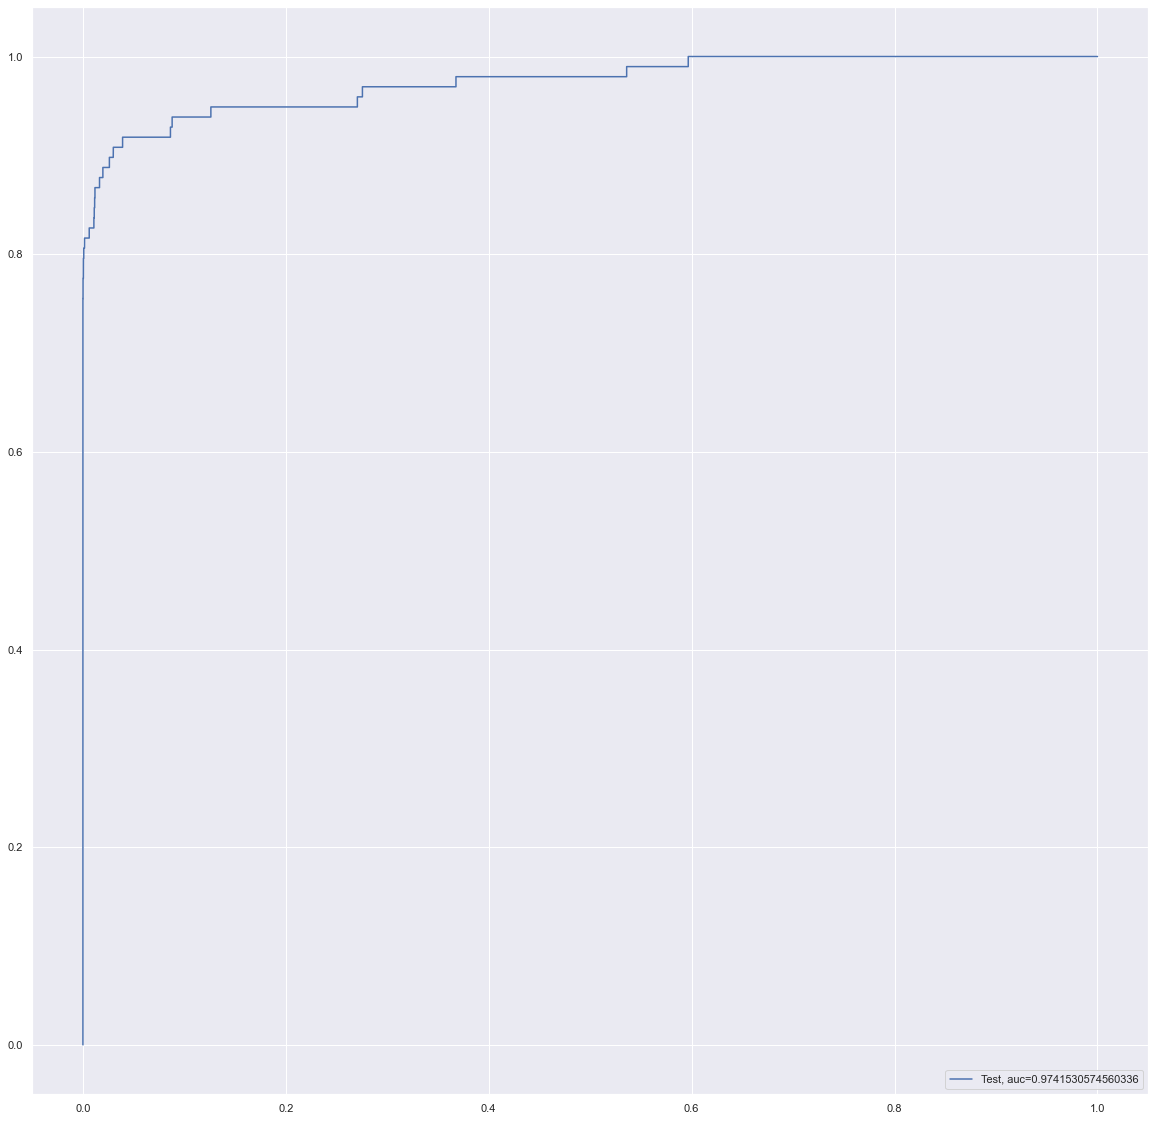

Time Taken by Model: --- 234.5147488117218 seconds ---
--------------------------------------------------------------------------------


In [167]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels_data(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels_data(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels_data(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels_data(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels_data(df_Results, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


##### Build models on other algorithms to see the better performing on SMOTE

In [168]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                                            NaN   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                 RepeatedKFold Cross Validation   
8                 RepeatedKFold Cross Validation   
9                                            NaN   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14              StratifiedKFold Cross Validation   
15              StratifiedKFold Cross Validation   
16                                           NaN   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21                          Random Undersampling   
22                          Random Undersampling   
23                                           NaN   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28  Random Oversampling with StratifiedKFold CV    
29  Random Oversampling with StratifiedKFold CV    
30                                           NaN   
31  Random Oversampling with StratifiedKFold CV    
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34   SMOTE Oversampling with StratifiedKFold CV    
35   SMOTE Oversampling with StratifiedKFold CV    
36                                           NaN   
37   SMOTE Oversampling with StratifiedKFold CV    
38   SMOTE Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   
1   Logistic Regression with L1 Regularisation  0.998912   0.970121   
2                                          KNN  0.999298   0.900851   
3             Tree Model with entropy criteria  0.999052   0.864337   
4                                Random Forest  0.999350        NaN   
5                                      XGBoost  0.999456   0.972998   
6                                          SVM  0.998560        NaN   
7   Logistic Regression with L2 Regularisation  0.999175   0.987578   
8   Logistic Regression with L1 Regularisation  0.999157   0.952060   
9                                          KNN  0.999315   0.858503   
10            Tree Model with entropy criteria  0.999263   0.891111   
11                               Random Forest  0.999614        NaN   
12                                     XGBoost  0.999631   0.986069   
13                                         SVM  0.998508        NaN   
14  Logistic Regression with L2 Regularisation  0.998771   0.983358   
15  Logistic Regression with L1 Regularisation  0.998824   0.958996   
16                                         KNN  0.999192   0.805746   
17            Tree Model with entropy criteria  0.999017   0.821244   
18                               Random Forest  0.999438        NaN   
19                                     XGBoost  0.999438   0.972812   
20                                         SVM  0.998280        NaN   
21  Logistic Regression with L2 Regularisation  0.984902   0.966019   
22  Logistic Regression with L1 Regularisation  0.998315   0.500000   
23                                         KNN  0.964046   0.943329   
24            Tree Model with entropy criteria  0.938240   0.891075   
25                               Random Fores

## Results for SMOTE Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for SMOTE oversampling technique

# Oversampling with ADASYN Oversampling

**We will use ADASYN Oversampling method to handle the class imbalance**

1. First we will display class distibution with and without the ADASYN Oversampling.

2. Then We will use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.

Once we have train and test dataset we will feed the data to below models:
1. Logistic Regression with L2 Regularisation
2. Logistic Regression with L1 Regularisation	
3. KNN
4. Decision tree model with Gini criteria
5. Decision tree model with Entropy criteria
6. Random Forest
7. XGBoost

3. We did try SVM (support vector Machine) model , but due to extensive processive power requirement we avoided useing the model.

4. Once we get results for above model, we will compare the results and select model which provided best results for the oversampling techinique


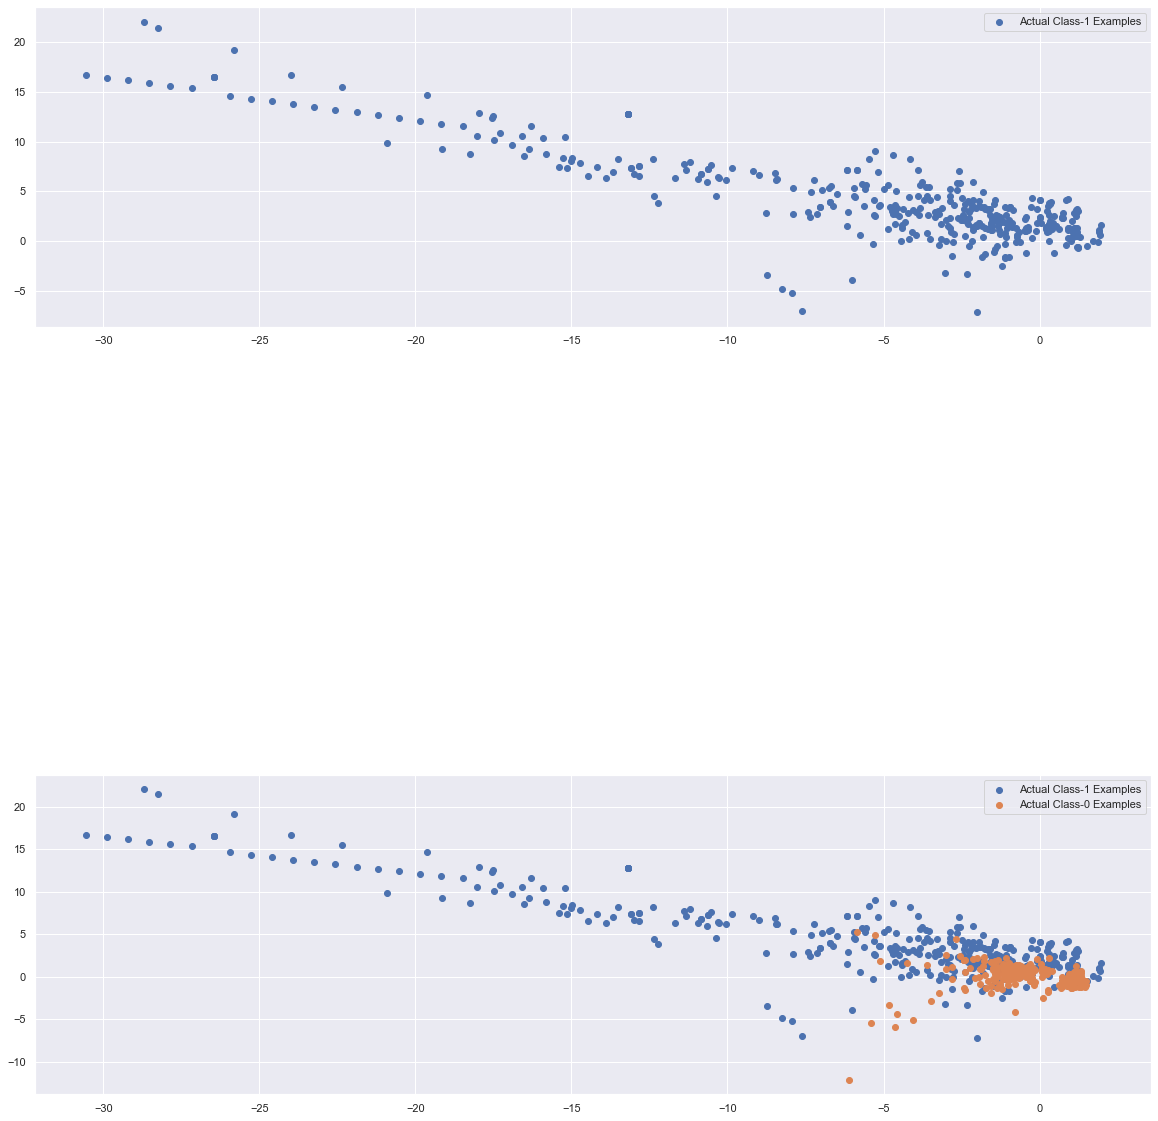

In [169]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ADASYN = over_sampling.ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 


X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()



plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()



In [170]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9835145245088899
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.99379509  1.05964647  0.87008462  0.95035548  0.76760227 -1.20176303
  -0.94626447 -0.5842638  -0.36254144 -0.88751162  0.79255228 -1.45308704
  -0.16503812 -1.99222697  0.14397974 -1.00134262 -1.14691721 -0.52929069
   0.38442008 -1.41724867 -0.20525109  0.71914512  0.65827361 -1.11426735
   0.71565404  0.20930979  0.14967001  1.32949995  0.01286071  0.02232751]]
[-5.11889198]
{1: array([[0.610404  , 0.63191849, 0.72150467, 0.87081578, 0.95798817,
        0.97416661, 0.97844939, 0.98148595, 0.98276357, 0.98315109,
        0.98321473, 0.98321473, 0.98321473, 0.98321473, 0.98321473,
        0.98321473, 0.98321473, 0.98321473, 0.98321473, 0.98321473],
       [0.61072194, 0.63192858, 0.72000917, 0.86805623, 0.95677094,
        0.9739103 , 0.97856472, 0.98180065, 0.98312978, 0.98350391,
        0.98355771, 0.98355771, 0.98355771, 0.98355771

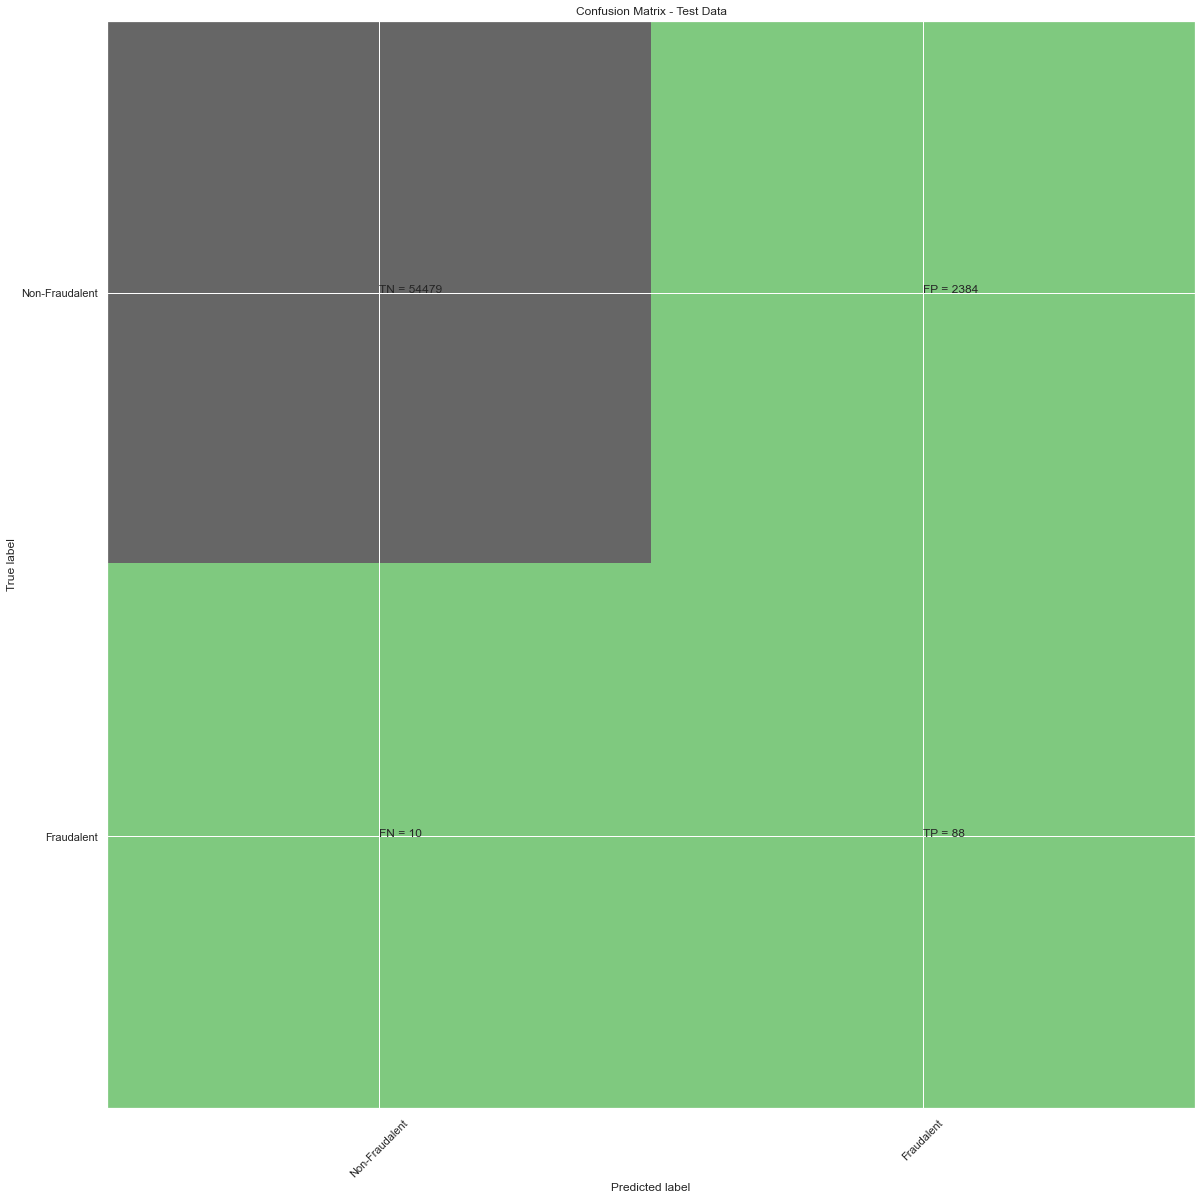

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.93      0.52     56961
weighted avg       1.00      0.96      0.98     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


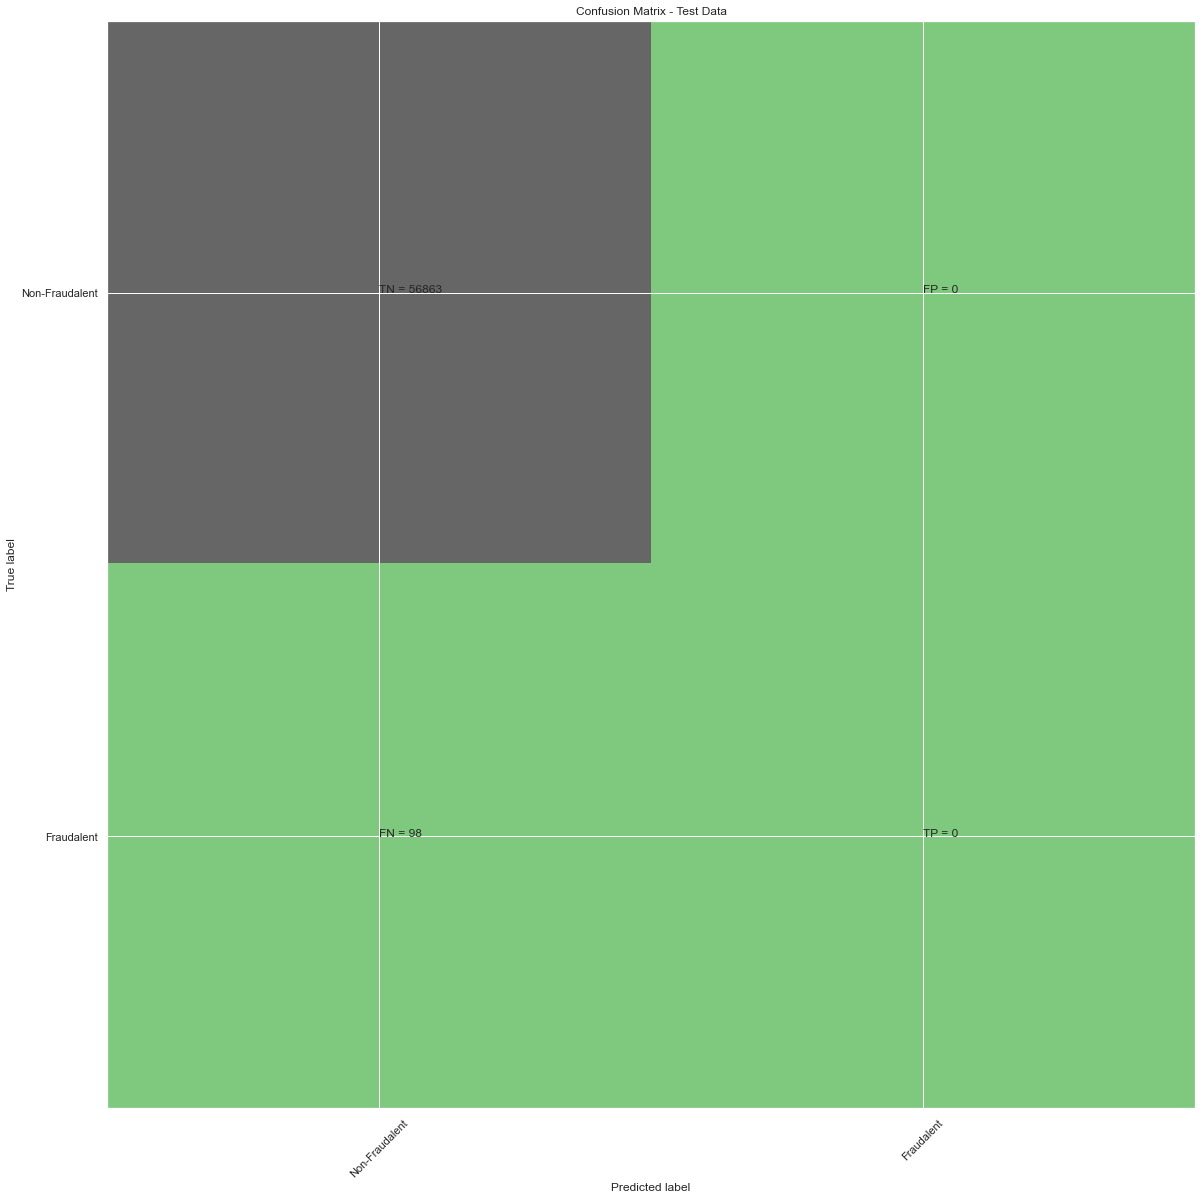

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9740305826356007
l2 threshold: 0.6116197390491386
ROC for the test dataset 97.4%


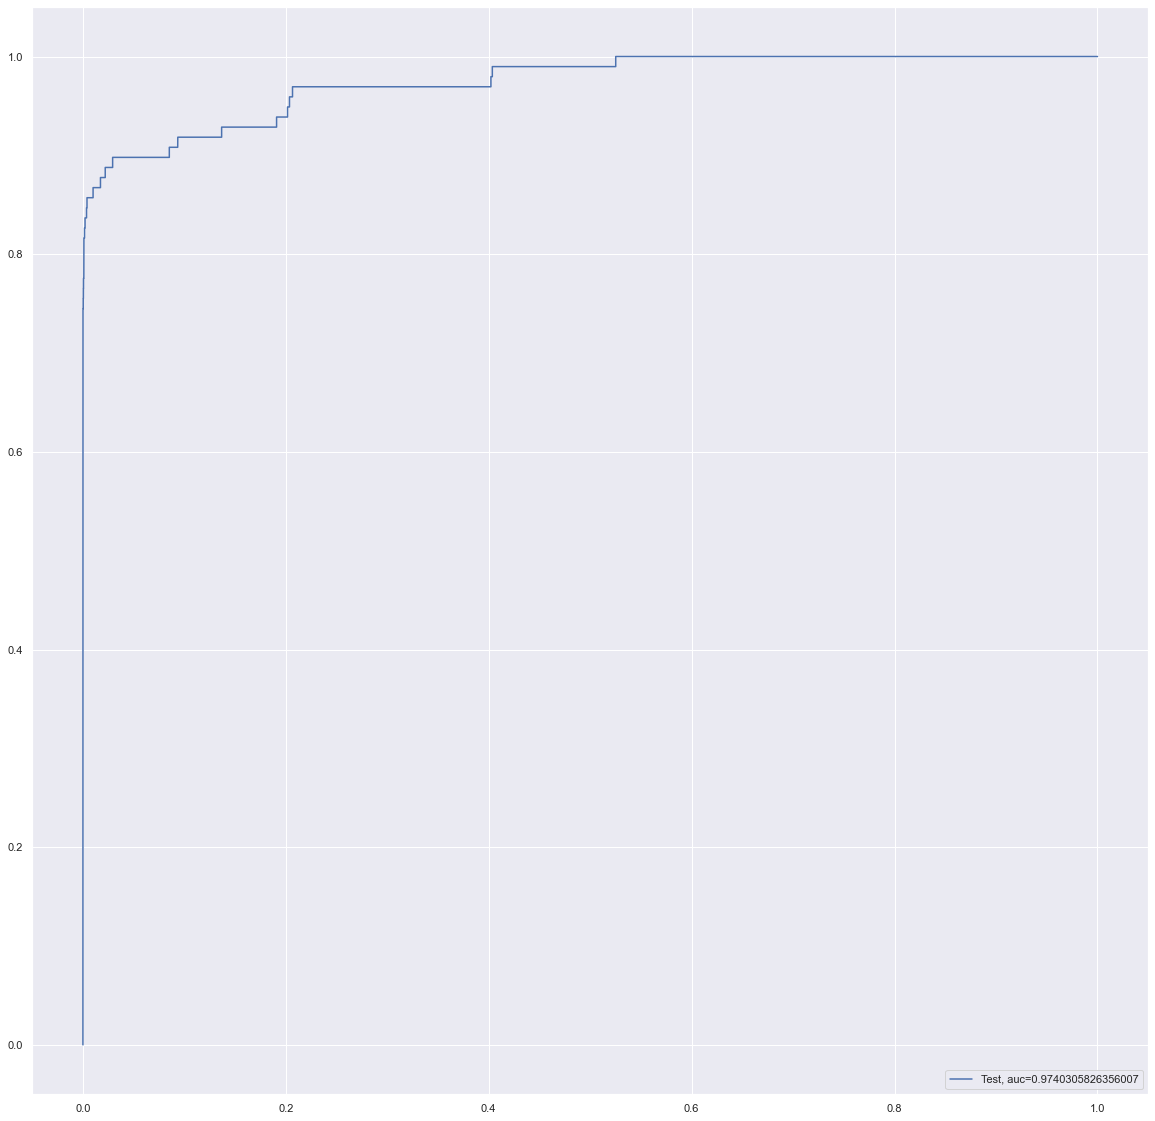

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


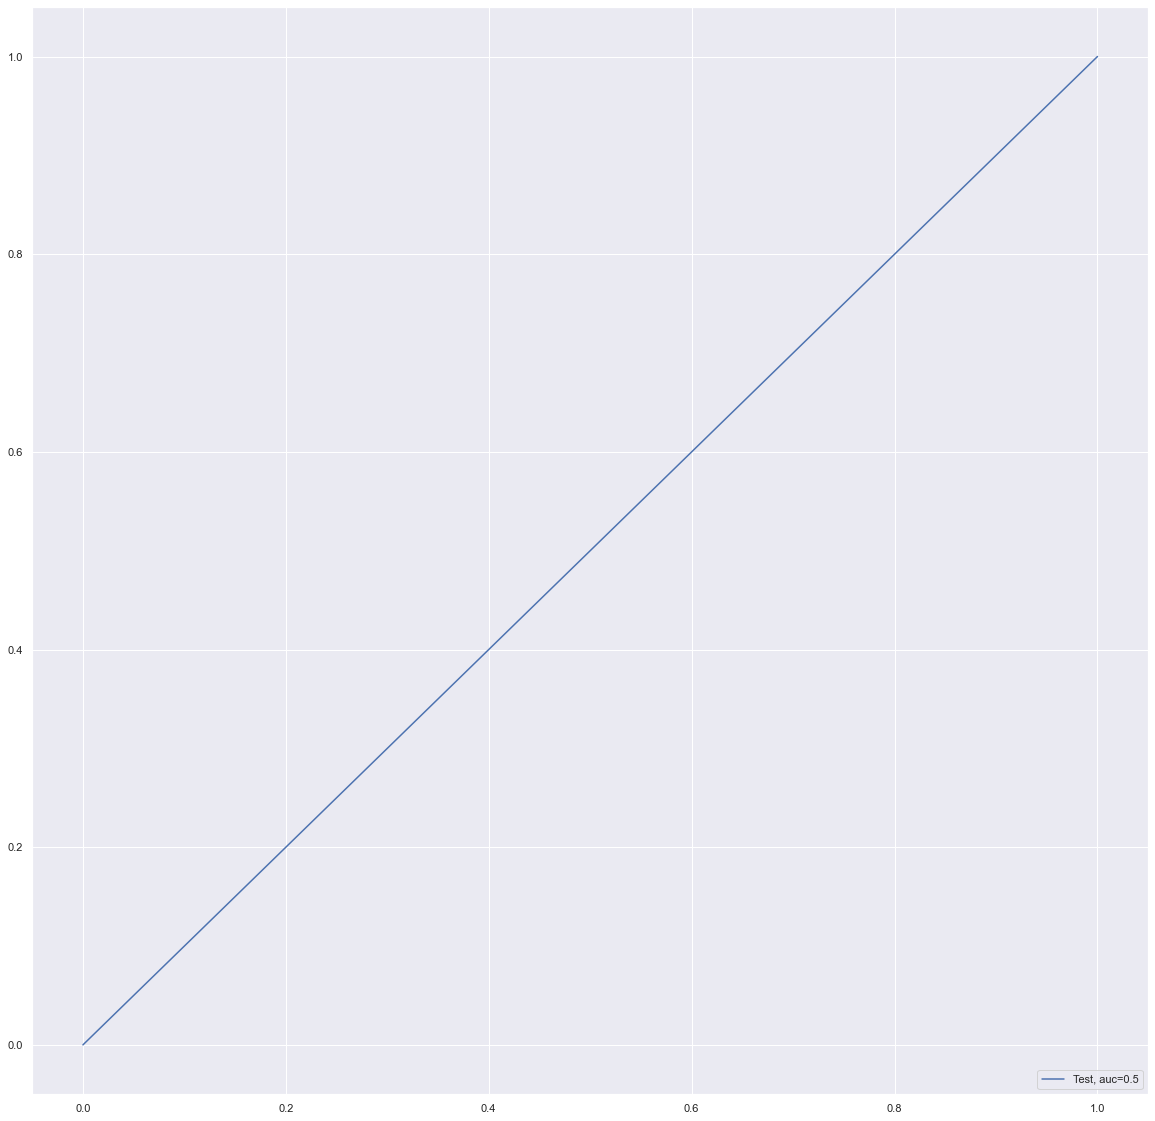

Time Taken by Model: --- 485.6447796821594 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9945050122013307
Confusion Matrix


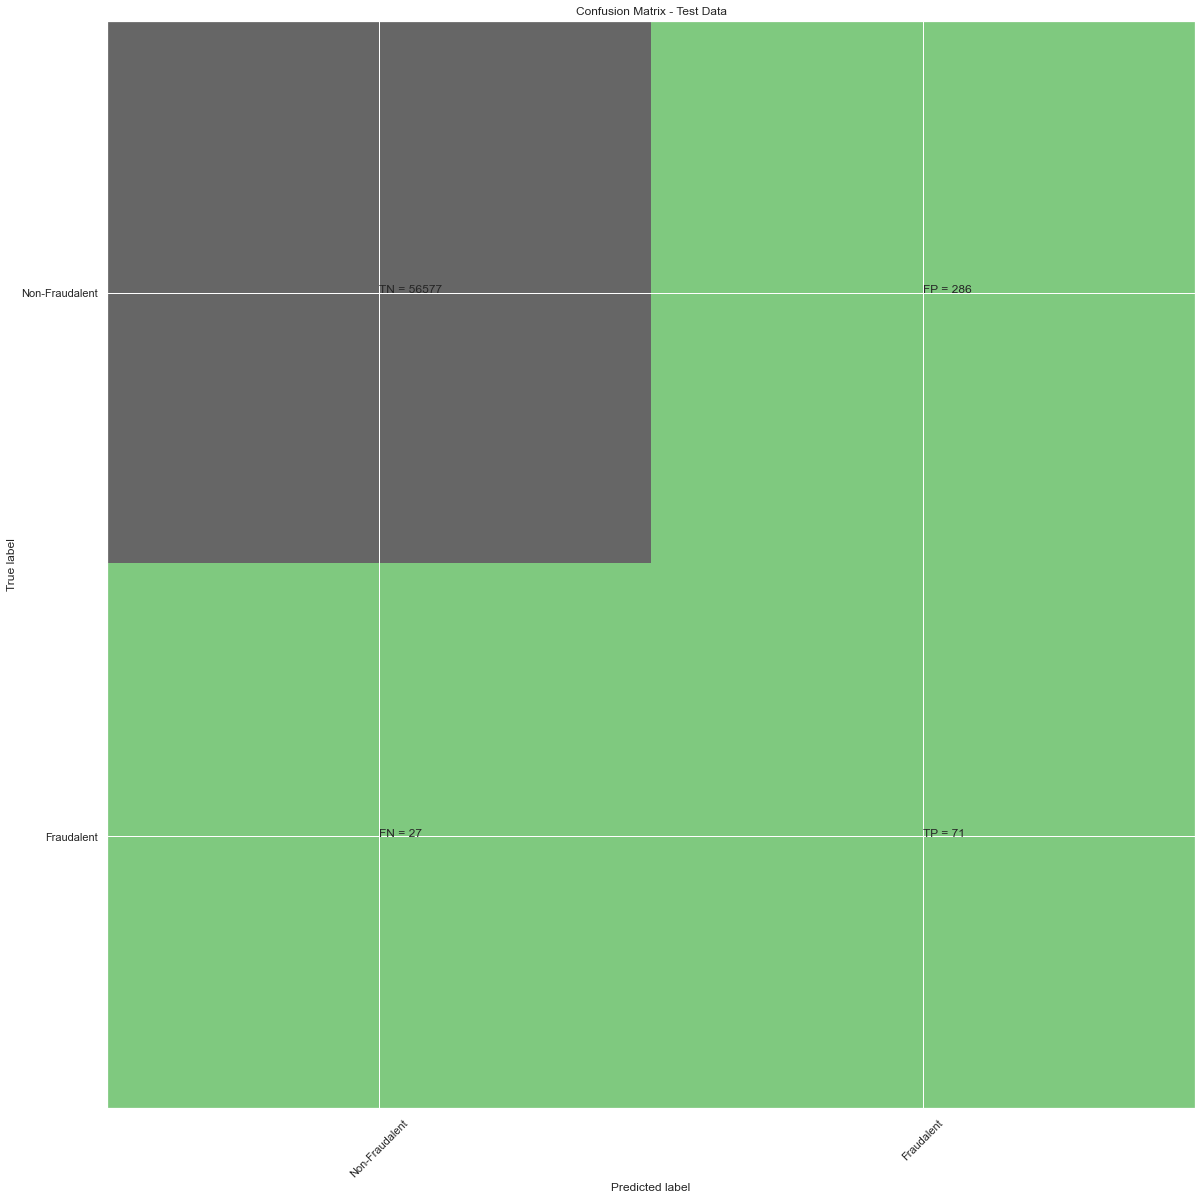

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.72      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601937811862167
KNN threshold: 0.6
ROC for the test dataset 86.0%


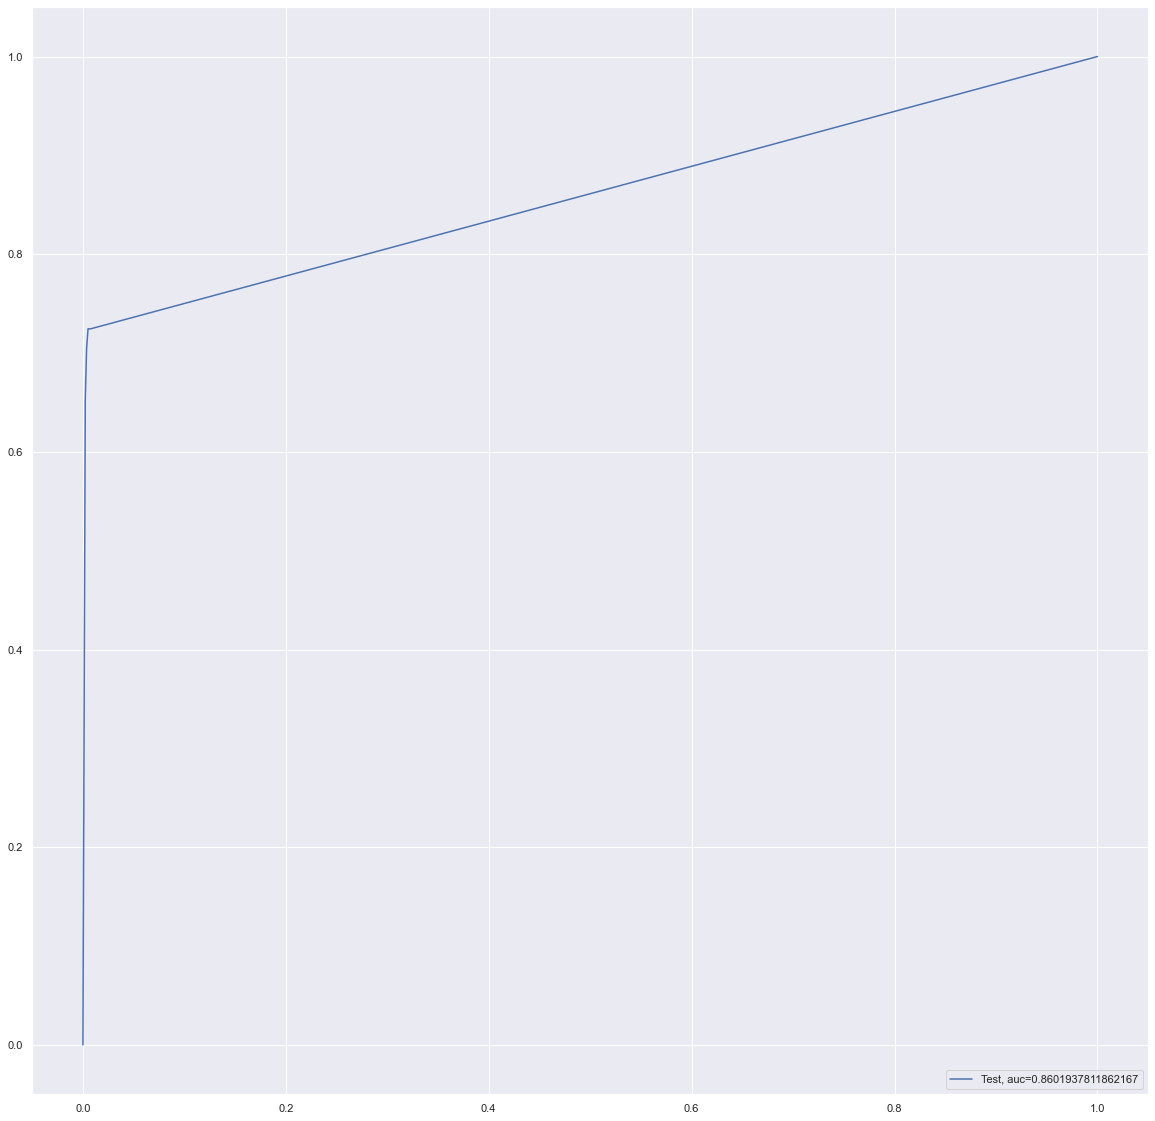

Time Taken by Model: --- 70.77644085884094 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9979459630273345
######Confusion Matrix############


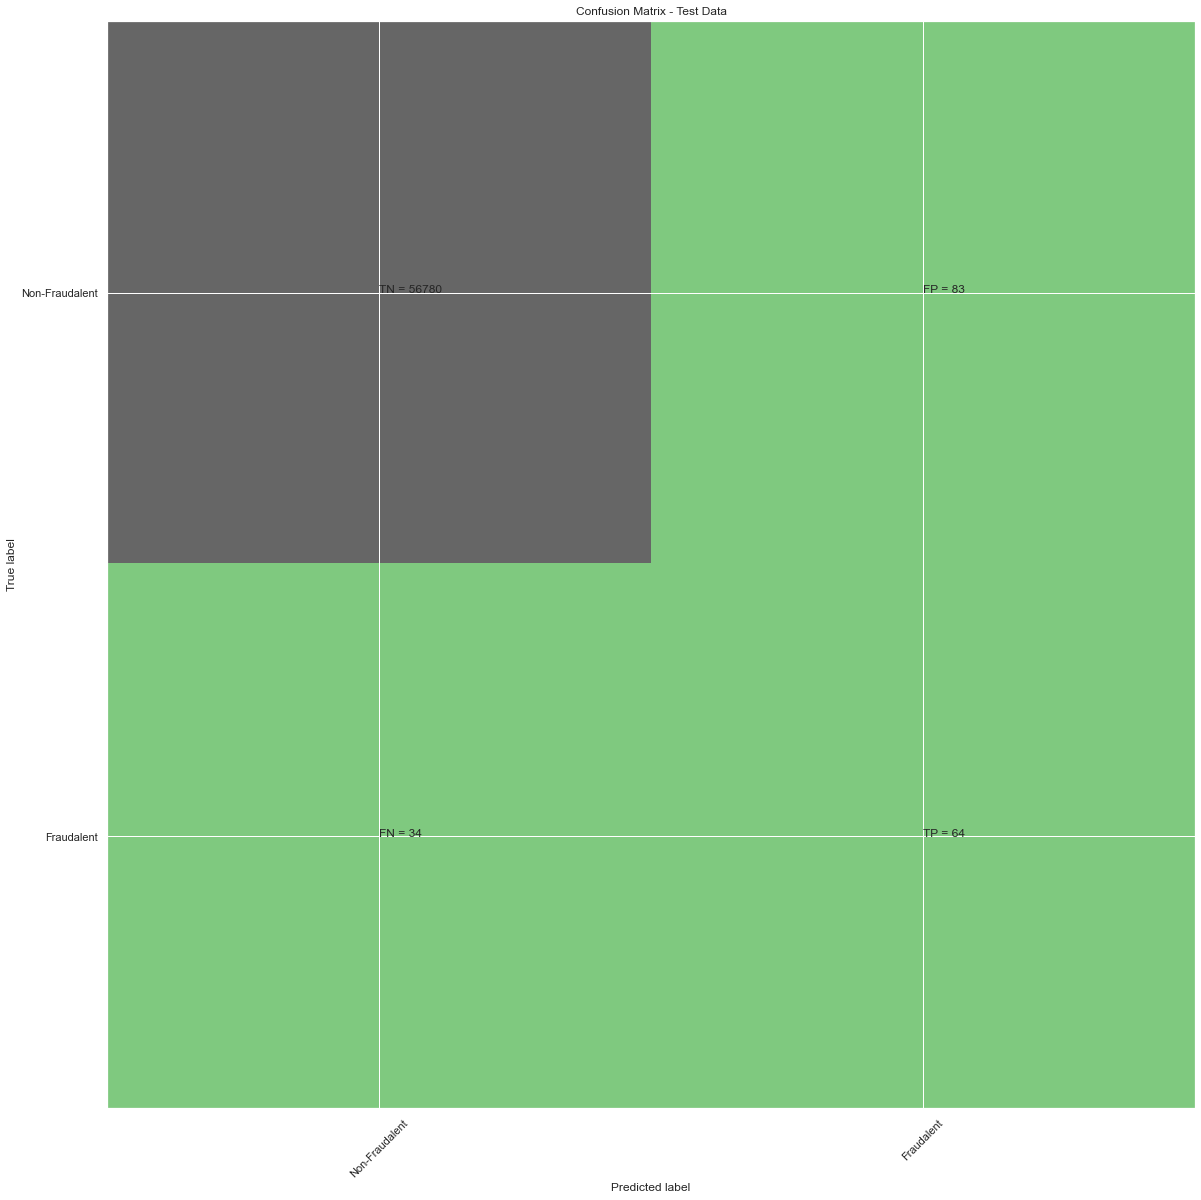

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.65      0.52        98

    accuracy                           1.00     56961
   macro avg       0.72      0.83      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value_data: 0.8258007879303172
Tree threshold: 1.0
ROC for the test dataset 82.6%


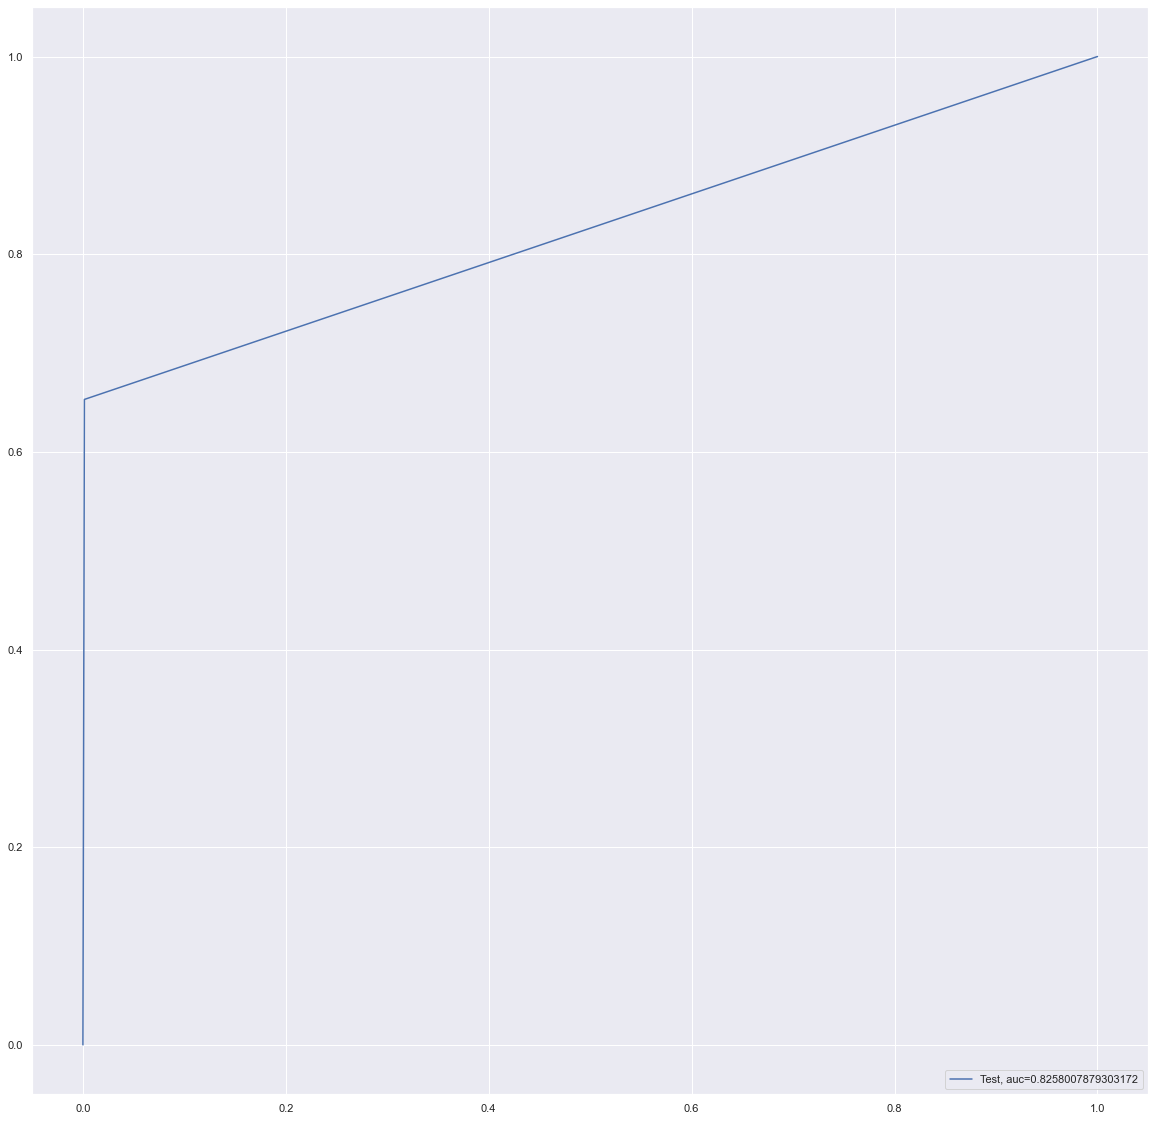

entropy score: 0.9954179175225154
######Confusion Matrix############


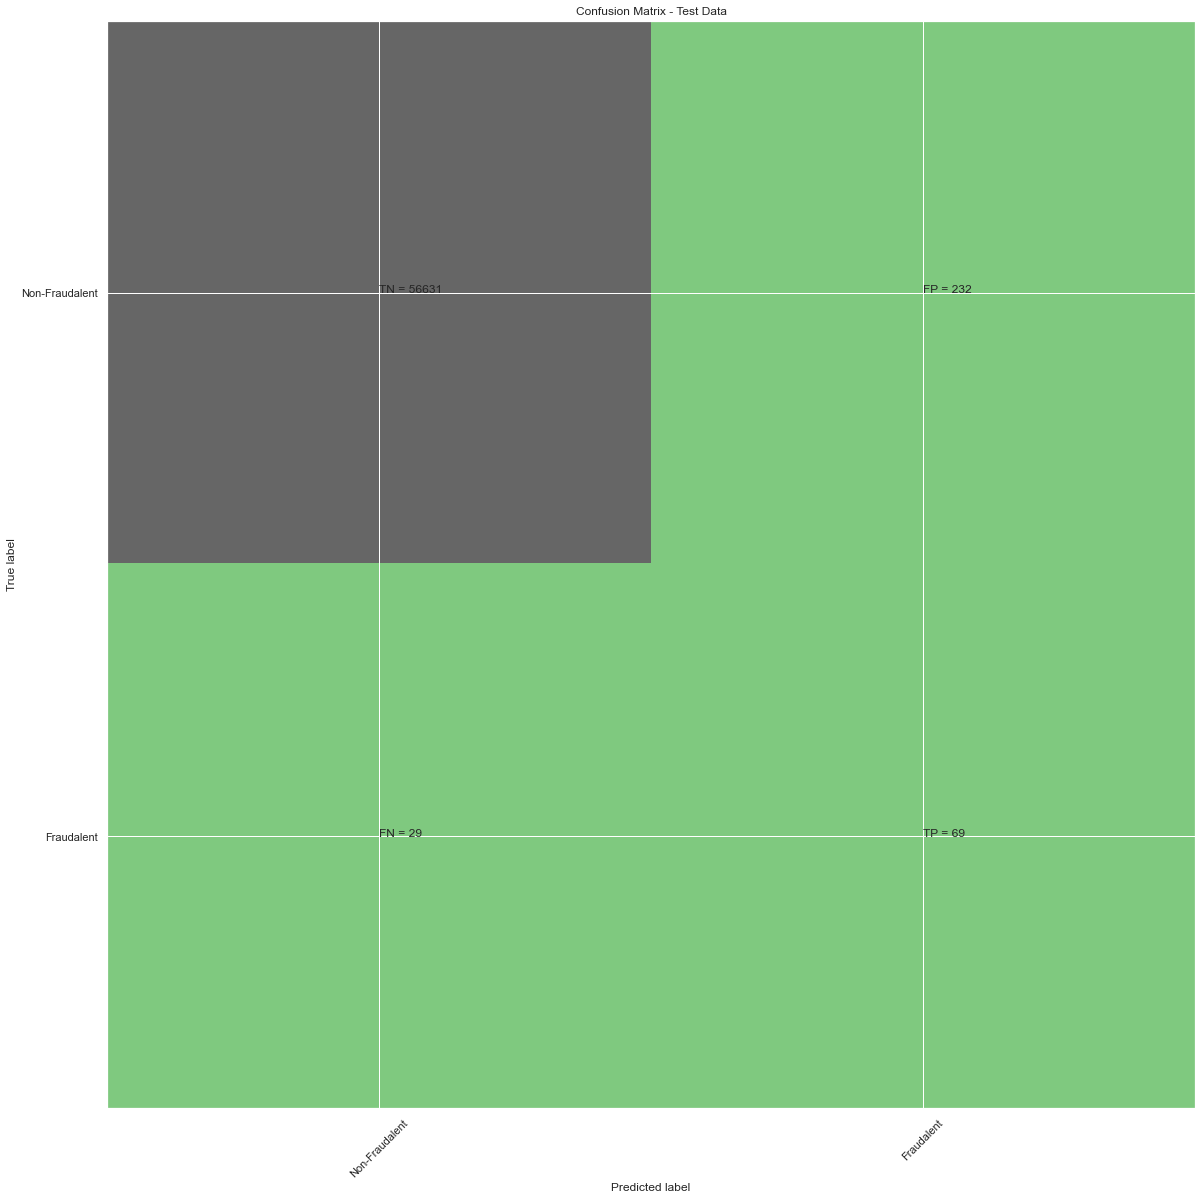

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.23      0.70      0.35        98

    accuracy                           1.00     56961
   macro avg       0.61      0.85      0.67     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value_data: 0.8500008254713172
Tree threshold: 1.0
ROC for the test dataset 85.0%


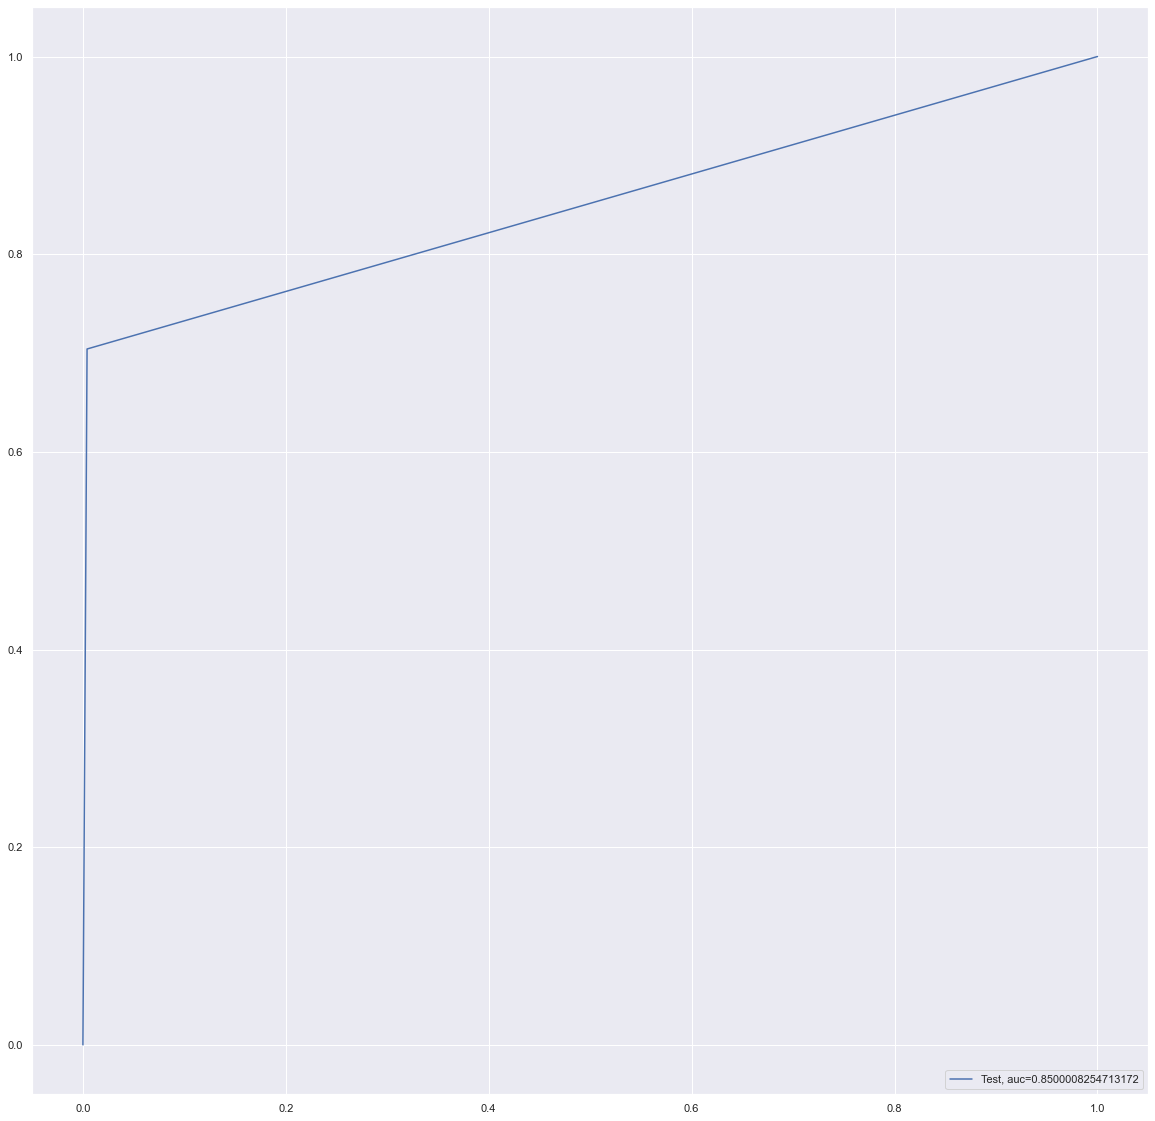

Time Taken by Model: --- 67.6997082233429 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


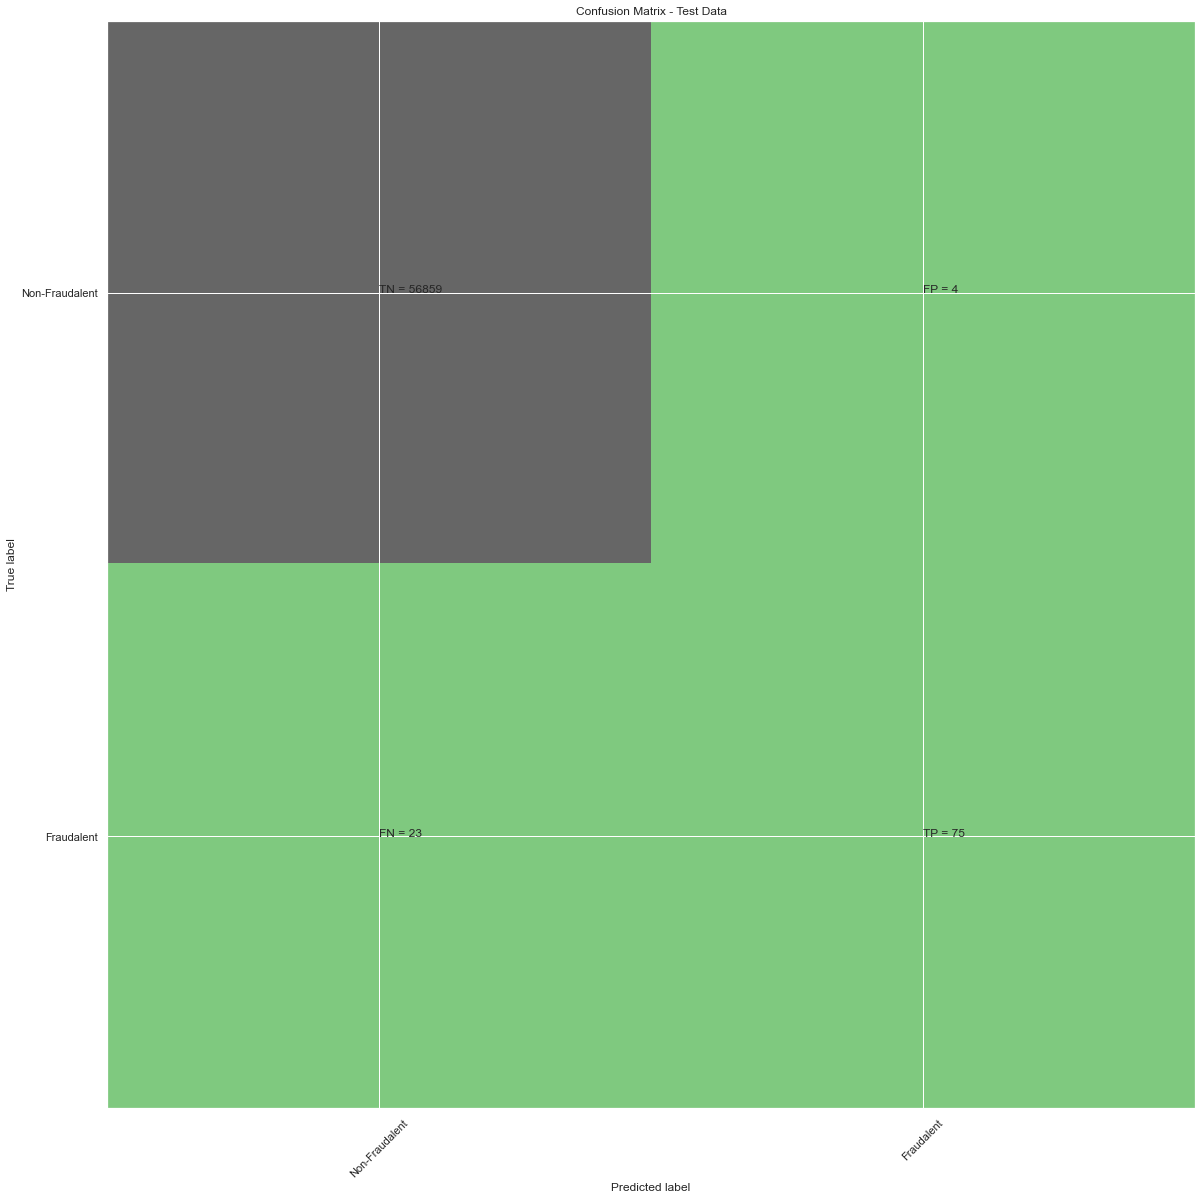

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value_data: 0.9632269575962563
Random Forest threshold: 0.03
ROC for the test dataset 96.3%


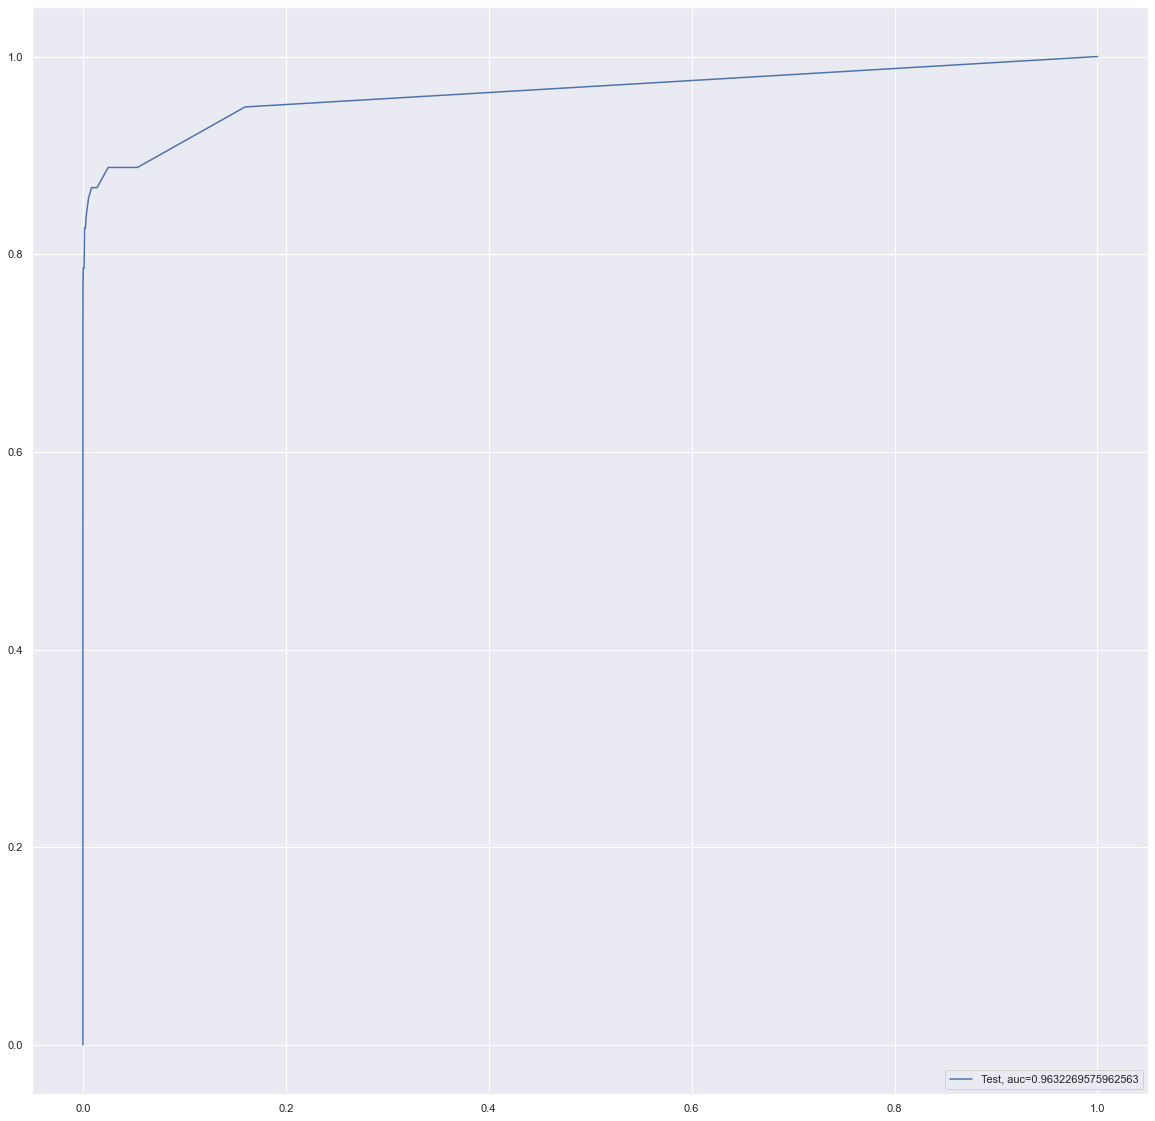

Time Taken by Model: --- 317.44053983688354 seconds ---
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


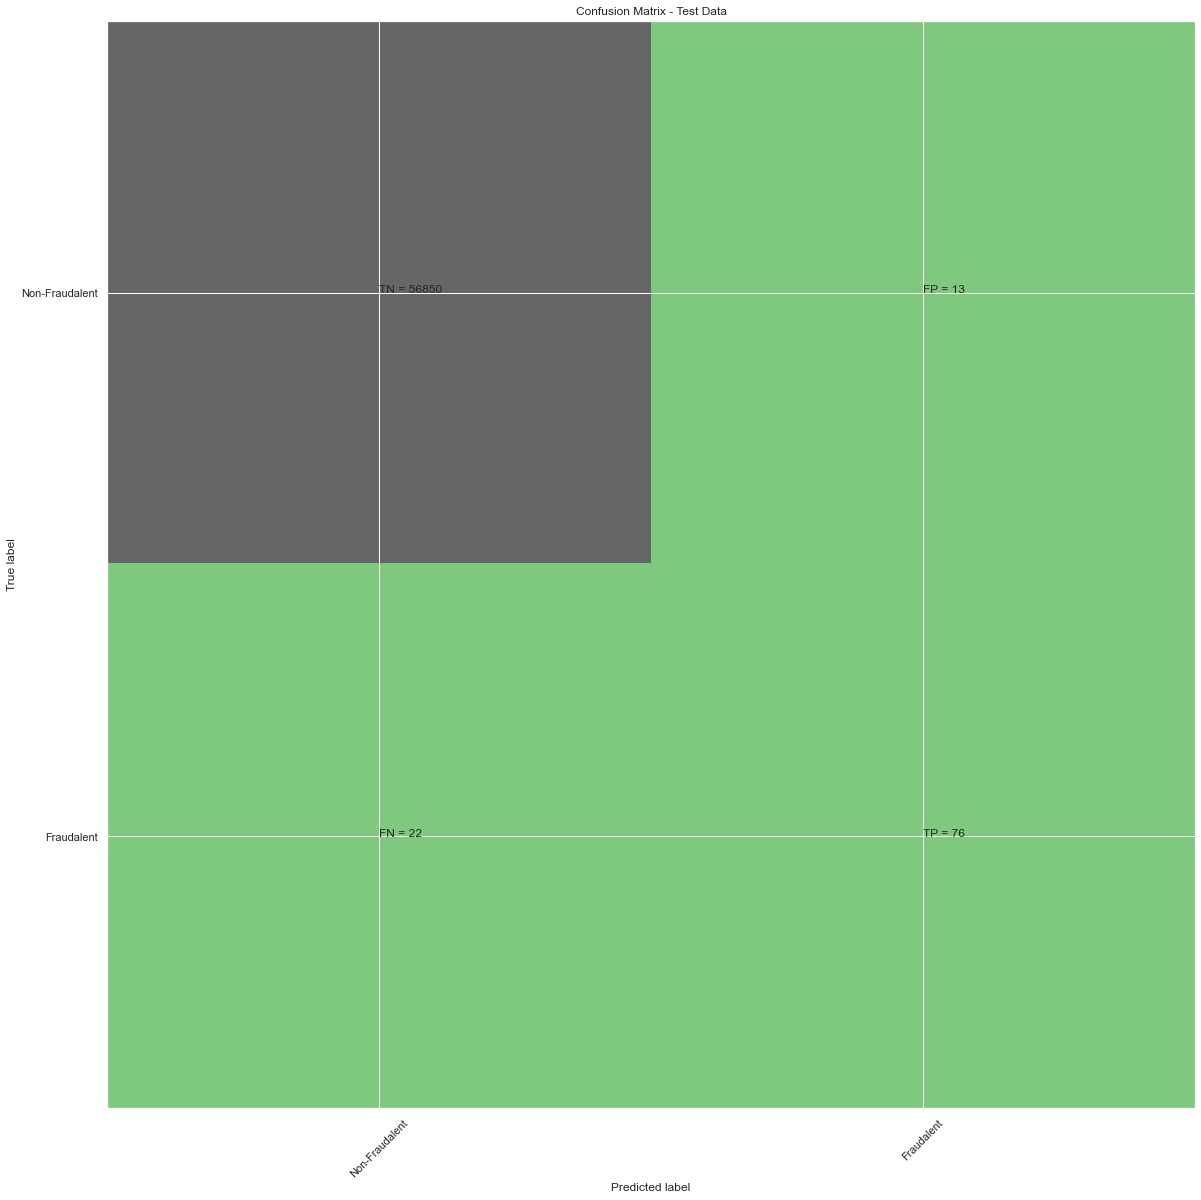

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.970320537690482
XGBoost threshold: 0.0016991241136565804
ROC for the test dataset 97.0%


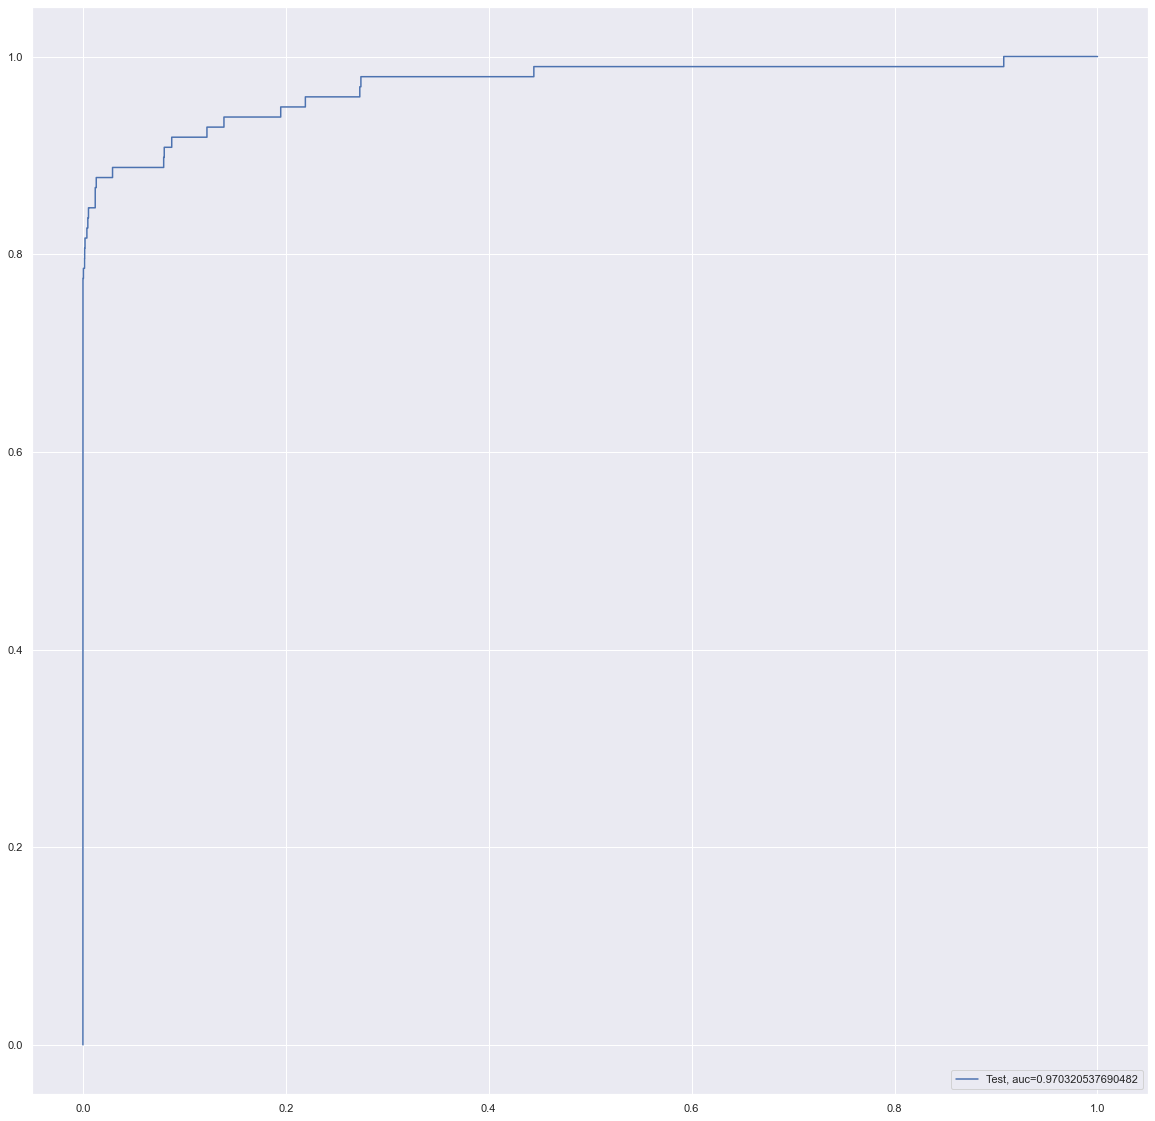

Time Taken by Model: --- 236.71994495391846 seconds ---
--------------------------------------------------------------------------------


In [171]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels_data(df_Results, Data_Imbalance_Handiling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels_data(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels_data(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels_data(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels_data(df_Results, Data_Imbalance_Handiling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )


In [172]:
df_Results

Data_Imbalance_Handiling  \
0                              Power Transformer   
1                              Power Transformer   
2                                            NaN   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                 RepeatedKFold Cross Validation   
8                 RepeatedKFold Cross Validation   
9                                            NaN   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14              StratifiedKFold Cross Validation   
15              StratifiedKFold Cross Validation   
16                                           NaN   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21                          Random Undersampling   
22                          Random Undersampling   
23                                           NaN   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28  Random Oversampling with StratifiedKFold CV    
29  Random Oversampling with StratifiedKFold CV    
30                                           NaN   
31  Random Oversampling with StratifiedKFold CV    
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34   SMOTE Oversampling with StratifiedKFold CV    
35   SMOTE Oversampling with StratifiedKFold CV    
36                                           NaN   
37   SMOTE Oversampling with StratifiedKFold CV    
38   SMOTE Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40  ADASYN Oversampling with StratifiedKFold CV    
41  ADASYN Oversampling with StratifiedKFold CV    
42                                           NaN   
43  ADASYN Oversampling with StratifiedKFold CV    
44  ADASYN Oversampling with StratifiedKFold CV    
45  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  roc_value  \
0   Logistic Regression with L2 Regularisation  0.998999   0.966806   
1   Logistic Regression with L1 Regularisation  0.998912   0.970121   
2                                          KNN  0.999298   0.900851   
3             Tree Model with entropy criteria  0.999052   0.864337   
4                                Random Forest  0.999350        NaN   
5                                      XGBoost  0.999456   0.972998   
6                                          SVM  0.998560        NaN   
7   Logistic Regression with L2 Regularisation  0.999175   0.987578   
8   Logistic Regression with L1 Regularisation  0.999157   0.952060   
9                                          KNN  0.999315   0.858503   
10            Tree Model with entropy criteria  0.999263   0.891111   
11                               Random Forest  0.999614        NaN   
12                                     XGBoost  0.999631   0.986069   
13                                         SVM  0.998508        NaN   
14  Logistic Regression with L2 Regularisation  0.998771   0.983358   
15  Logistic Regression with L1 Regularisation  0.998824   0.958996   
16                                         KNN  0.999192   0.805746   
17            Tree Model with entropy criteria  0.999017   0.821244   
18                               Random Forest  0.999438        NaN   
19                                     XGBoost  0.999438   0.972812   
20                                         SVM  0.998280        NaN   
21  Logistic Regr

## Results for ADASYN  Oversampling: 

Looking at Accuracy and ROC value we have XGBoost which has provided best results for ADASYN oversampling technique

### Overall conclusion after running models on Oversampled data: 

From above results it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results


### But looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

#Parameter Tuning for Final Model by Handling class imbalance

In [173]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9995084355962852
XGboost roc_value: 0.9804055540581426
XGBoost threshold: 3.2240939617622644e-05


In [174]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)


In [175]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 95.21240597,  98.15303254, 101.43862262, 196.82634053,
         201.26709523, 205.67617068, 273.42118745, 259.80982714,
         265.48115125, 325.78211565, 274.09872179, 243.50777569]),
  'std_fit_time': array([ 1.04109265,  3.75733927,  1.39572003, 10.09598799,  2.69052006,
          1.30207917,  2.0094664 ,  1.93105062,  6.09018495, 13.79928517,
          5.86640491, 25.21450778]),
  'mean_score_time': array([0.32181025, 0.30319004, 0.32872968, 0.59547219, 0.60901666,
         0.61126914, 0.66498356, 0.66013064, 0.65810356, 0.65694461,
         0.63647351, 0.50824189]),
  'std_score_time': array([0.05043416, 0.02109429, 0.02634424, 0.03943692, 0.062025  ,
         0.04366658, 0.04640905, 0.06520514, 0.03690638, 0.08801035,
         0.04691161, 0.09529431]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [176]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 61.28901606,  82.37337923, 103.46565614, 123.89470668,
         130.72468891]),
  'std_fit_time': array([ 0.61916569,  0.52208993,  0.65392048,  1.09766623, 20.65022794]),
  'mean_score_time': array([0.23058252, 0.27805853, 0.34305539, 0.40890851, 0.39175367]),
  'std_score_time': array([0.00786287, 0.01168995, 0.01713948, 0.02442156, 0.06336792]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.9981474 , 0.99892986, 0.99919263, 0.99930204, 0.99937542]),
  'split1_test_score': array([0.99939845, 0.99972502, 0.99985604, 0.9999191 , 0.99995037]),
  'split2_test_score': array([0.99232487, 0.99650077, 0.99850593, 0.99887423, 0.9992074 ]),
  'split3_test_score': array(

In [177]:
# lets narrow down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 75.6704895 ,  83.49895554,  90.05781908,  77.48263907,
          83.91407466,  90.47196054,  77.41918602,  83.81037588,
          90.57544489, 112.17171607, 123.49554157, 133.05736904,
         111.94649653, 122.69196701, 132.27069731, 112.01590142,
         122.77378445, 133.25099854, 148.71862965, 161.49377241,
         174.7860878 , 154.75524802, 163.0511631 , 174.3013495 ,
         147.04649844, 159.79633217, 156.83542447]),
  'std_fit_time': array([ 0.27310047,  0.38097665,  0.57630121,  0.66930235,  0.36010894,
          0.79591752,  0.8235313 ,  0.3885397 ,  0.68510277,  1.15475949,
          0.83829493,  0.44931037,  0.80263524,  0.53047672,  0.4203492 ,
          0.28540976,  0.51631203,  0.42616312,  0.3070968 ,  0.46487937,
          0.86365754,  2.28564199,  1.88041984,  0.67756978,  0.22881923,
          0.73571365, 18.03199105]),
  'mean_score_time': array([0.2946104 , 0.30757947, 0.34068766, 0.28144746, 0.30902815,
         0.32732487, 0.294810

In [178]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([184.69709716, 196.64474702, 185.24570417, 180.450912  ,
         168.51495876]),
  'std_fit_time': array([ 7.98414474,  5.38710114,  3.6187978 ,  1.07648323, 35.60108042]),
  'mean_score_time': array([0.50865335, 0.57142515, 0.54812908, 0.55924554, 0.54287558]),
  'std_score_time': array([0.01660633, 0.03900761, 0.02037299, 0.02863764, 0.11549137]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99914107, 0.99948652, 0.99952228, 0.99955204, 0.99963457]),
  'split1_test_score': array([0.99989578, 0.99999145, 0.99999239, 0.99999989, 1.        ]),
  'split2_test_score': array([0.97526915, 0.99274088, 0.99721994, 0.99962354, 0.99980936]),
  'split3_t

In [179]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([176.44262366, 176.7057405 , 176.57522383, 185.75793271,
         163.7782115 ]),
  'std_fit_time': array([ 0.10702476,  1.45695528,  0.6120539 ,  6.33514718, 35.841637  ]),
  'mean_score_time': array([0.5529881 , 0.56861691, 0.57512827, 0.7074019 , 0.51484489]),
  'std_score_time': array([0.02338043, 0.02538455, 0.00572178, 0.11565717, 0.07183787]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99963457, 0.99967276, 0.99958847, 0.99959794, 0.99955747]),
  'split1_test_score': array([1., 1., 1., 1., 1.]),
  'split2_test_score': array([0.99980936, 0.99982242, 0.99955378, 0.99982854, 0.99978948]),
  'split3_test_score': array([0.99992266, 0.99993048, 0.99993377, 0.99992828, 0.99993376]),
  'split4_test_

In [180]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994557679816014
XGboost roc_value: 0.983226422834403
XGBoost threshold: 0.0028009696397930384


In [181]:
#With 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters tuned above we will now check learning rate

# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([123.11452861, 123.00692787, 137.49979544, 152.69140034,
         153.2498229 , 157.11603332, 175.81558485, 194.29508219,
         171.88455791]),
  'std_fit_time': array([ 0.96992922,  0.57026253,  9.71939527,  1.66665748,  0.88160509,
          1.08904605,  3.42938579,  6.24942771, 38.81614621]),
  'mean_score_time': array([0.54953094, 0.58064718, 0.58882613, 0.57688704, 0.59015956,
         0.60330071, 0.69756598, 0.63279772, 0.51656103]),
  'std_score_time': array([0.03889343, 0.05042319, 0.03901326, 0.05568978, 0.04121212,
         0.08364663, 0.10075869, 0.04791469, 0.08968753]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, F

In [182]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994557679816014
XGboost roc_value: 0.9826402484740445
XGBoost threshold: 0.002793008228763938


In [183]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9994557679816014
XGboost roc_value: 0.983226422834403
XGBoost threshold: 0.0028009696397930384


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 12


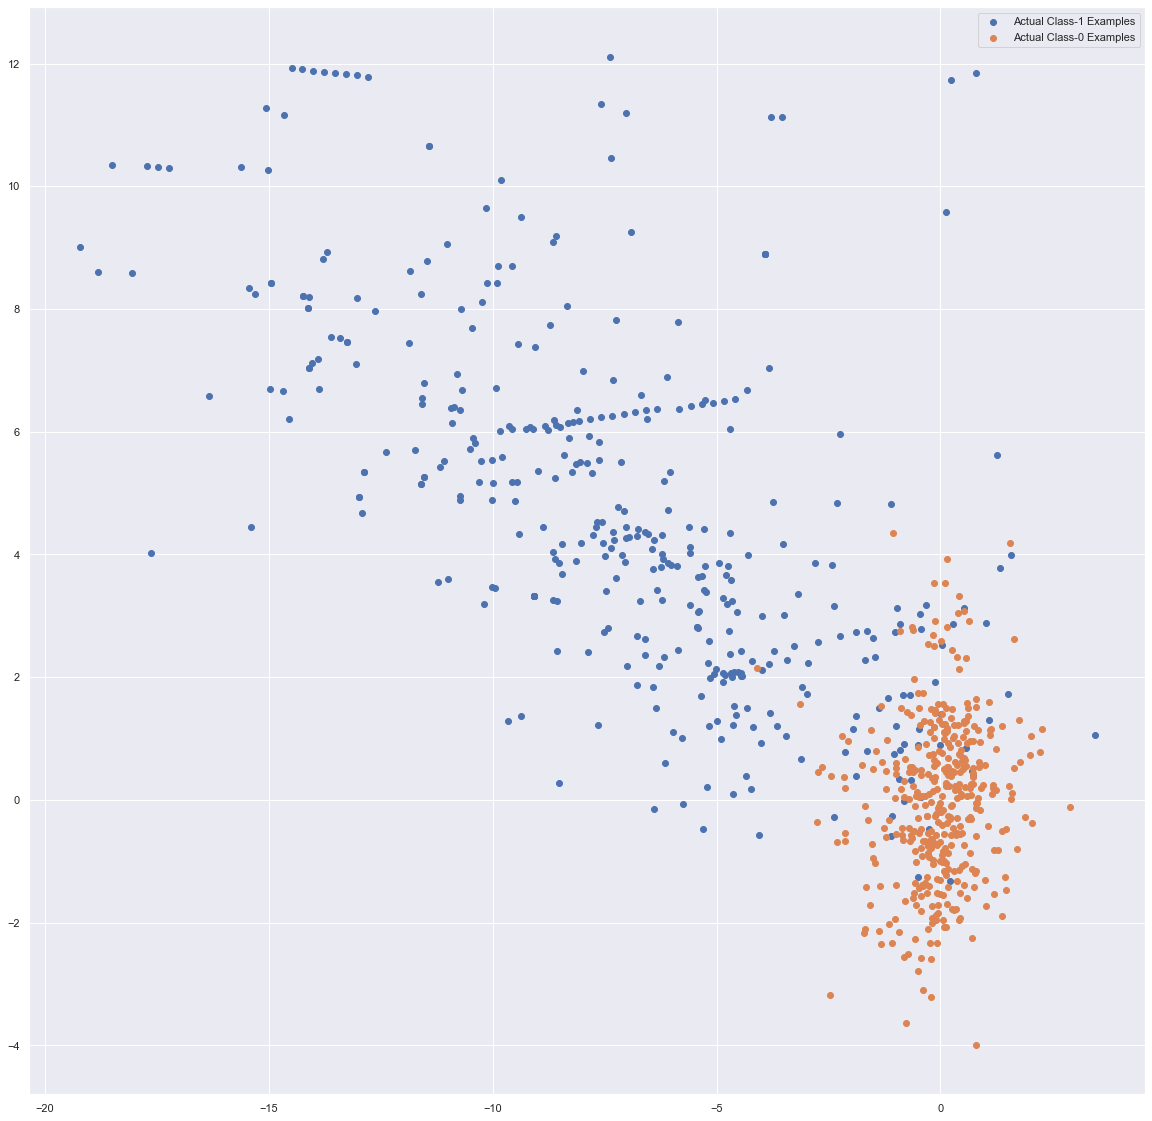

In [184]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [185]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [186]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.983226422834403
XGBoost threshold: 0.0028009696397930384


#### Model Selection:
####  Conclusion after running models on Oversampled data: 
Looking at above, it seems XGBOOST model with Random Oversampling with StratifiedKFold CV has provided best results. So we can try to tune the hyperparameters of this model to get best results
We have selected XGBOOST model with Random Oversampling and StratifiedKFold CV 
**Model Accuracy: 0.9994557679816014**
**XGboost roc_value:  0.983226422834403**
**XGBoost threshold: 0.0028009696397930384**
##### We also noticed by looking at the results 	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.

